Using an economic indicator like GDP in a model designed to predict sales can help explain current data and provide insights for future trends.

https://www.youtube.com/watch?v=tr8PF2v9Wgo

## Install the Fred API

In [35]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from copy import deepcopy

from statsmodels.tsa.statespace.sarimax import SARIMAX

from fredapi import Fred

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Fred Object Created

In [37]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred_api_key")


fred = Fred(api_key=fred_key)

## Search for the data

In [38]:
sales_search = fred.search("TOTALSA", order_by="popularity")
sales_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TOTALSA,TOTALSA,2024-09-22,2024-09-22,Total Vehicle Sales,1976-01-01,2024-08-01,Monthly,M,Millions of Units,Mil. of Units,Seasonally Adjusted Annual Rate,SAAR,2024-09-06 13:18:02-05:00,76,None


In [39]:
GDP_search = fred.search("GDP")
GDP_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GFDEGDQ188S,GFDEGDQ188S,2024-09-22,2024-09-22,Federal Debt: Total Public Debt as Percent of ...,1966-01-01,2024-04-01,Quarterly,Q,Percent of GDP,% of GDP,Seasonally Adjusted,SA,2024-09-05 16:43:03-05:00,84,Federal Debt: Total Public Debt as Percent of ...
FYFSGDA188S,FYFSGDA188S,2024-09-22,2024-09-22,Federal Surplus or Deficit [-] as Percent of G...,1929-01-01,2023-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-28 08:07:03-05:00,75,Federal Surplus or Deficit [-] as Percent of G...
FYFSDFYGDP,FYFSDFYGDP,2024-09-22,2024-09-22,Federal Surplus or Deficit [-] as Percent of G...,1930-06-30,2023-09-30,"Annual, Fiscal Year",A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-11 12:11:05-05:00,42,None
GFDGDPA188S,GFDGDPA188S,2024-09-22,2024-09-22,Gross Federal Debt as Percent of Gross Domesti...,1939-01-01,2023-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-03-28 08:07:04-05:00,67,Gross Federal Debt as Percent of Gross Domesti...
GDP,GDP,2024-09-22,2024-09-22,Gross Domestic Product,1947-01-01,2024-04-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2024-08-29 10:58:01-05:00,93,BEA Account Code: A191RC Gross domestic produ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OECDLORSGPORIXOBSAM,OECDLORSGPORIXOBSAM,2024-09-22,2024-09-22,Leading Indicators OECD: Reference series: Gro...,1960-02-01,2022-08-01,Monthly,M,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2022-12-28 15:34:20-06:00,1,OECD descriptor ID: LORSGPOR OECD unit ID: IXO...
NAEXKP02GBA661S,NAEXKP02GBA661S,2024-09-22,2024-09-22,National Accounts: GDP by Expenditure: Constan...,1960-01-01,2022-01-01,Annual,A,Index 2015=100,Index 2015=100,Seasonally Adjusted,SA,2024-01-12 14:52:25-06:00,0,OECD Descriptor ID: NAEXKP02 OECD unit ID: IDX...
DEBTTLESA188A,DEBTTLESA188A,2024-09-22,2024-09-22,"Central government debt, total (% of GDP) for ...",1970-01-01,2022-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2024-09-19 14:08:06-05:00,9,Debt is the entire stock of direct government ...


## Visualize Data

          DATE   SALES
0   1976-01-01  12.814
1   1976-02-01  13.340
2   1976-03-01  13.378
3   1976-04-01  13.223
4   1976-05-01  12.962
..         ...     ...
579 2024-04-01  16.341
580 2024-05-01  16.482
581 2024-06-01  15.631
582 2024-07-01  16.367
583 2024-08-01  15.640

[584 rows x 2 columns]


<Axes: title={'center': 'Total Sales'}>

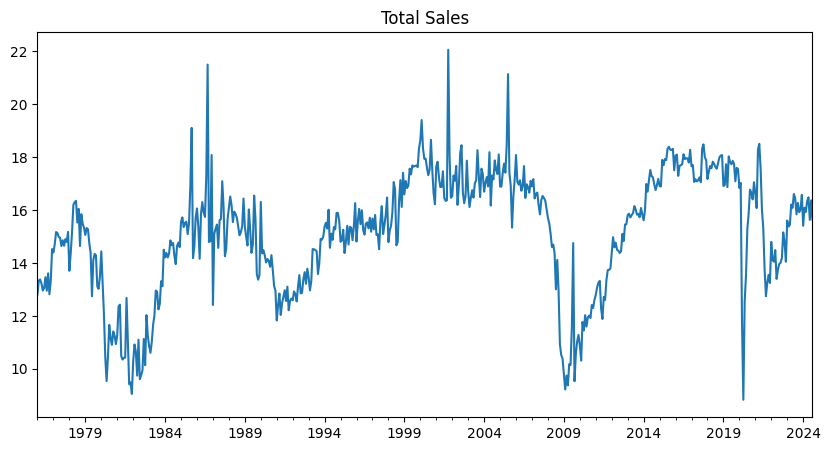

In [40]:
sales = fred.get_series("TOTALSA", parse_dates=['DATE'])

sales_df = pd.DataFrame({'DATE':sales.index, 'SALES':sales.values})

print(sales_df)

sales.plot(figsize=(10,5), title="Total Sales")

          DATE        GDP
0   1946-01-01        NaN
1   1946-04-01        NaN
2   1946-07-01        NaN
3   1946-10-01        NaN
4   1947-01-01   0.243164
..         ...        ...
309 2023-04-01  27.063012
310 2023-07-01  27.610128
311 2023-10-01  27.956998
312 2024-01-01  28.269174
313 2024-04-01  28.652337

[314 rows x 2 columns]


<Axes: title={'center': 'GDP'}>

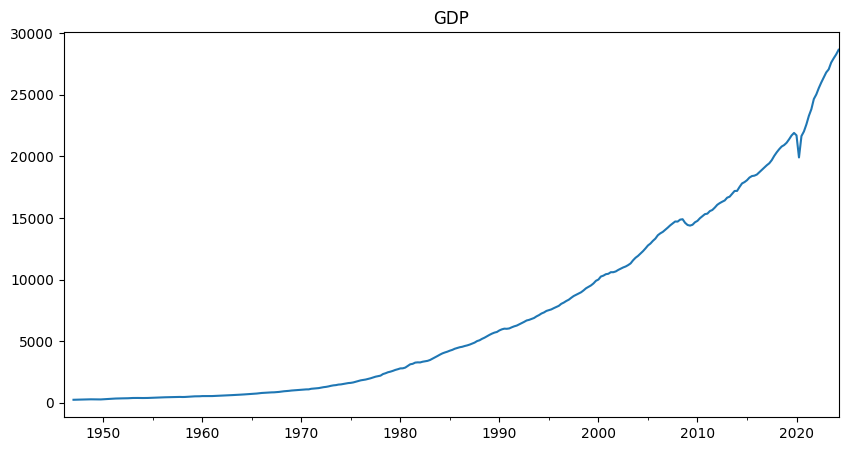

In [41]:
gdp = fred.get_series("GDP")


gdp_df = pd.DataFrame({'DATE':gdp.index, 'GDP':gdp.values}) \
            .assign(GDP = lambda cols: cols['GDP']/1000)


print(gdp_df)

gdp.plot(figsize=(10,5), title="GDP")

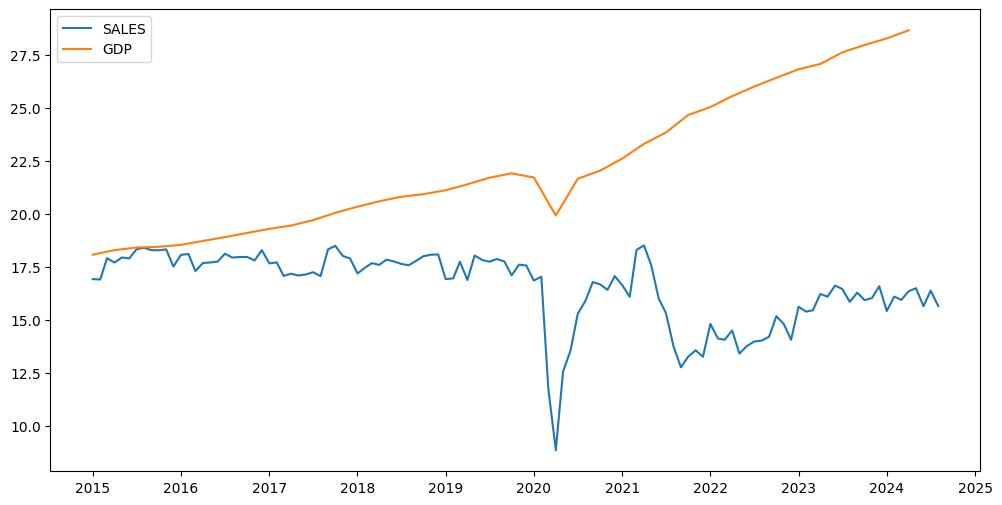

In [42]:
plt.figure(figsize=(12, 6))

sales_df = sales_df[sales_df['DATE'] >= '2014-12-12'].reset_index(drop=True)
gdp_df = gdp_df[gdp_df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(sales_df['DATE'], sales_df['SALES'], label='SALES')
plt.plot(gdp_df['DATE'], gdp_df['GDP'], label='GDP')

plt.legend()
plt.show()

## Sales and GDP on the same time grain

This code makes the it so the quarterly data is in the middle of the quarter instead of at the start of the quarter.

In [43]:
gdp_df = gdp_df.assign(DATE = lambda cols: cols['DATE'] + pd.Timedelta(32, 'D'))\
    .assign(DATE = lambda cols: cols['DATE'].apply(lambda x: x.replace(day=1)))

gdp_df

,DATE,GDP
0,2015-02-01,18.063529
1,2015-05-01,18.279784
2,2015-08-01,18.401626
3,2015-11-01,18.435137
4,2016-02-01,18.525933
5,2016-05-01,18.711702
6,2016-08-01,18.892639
7,2016-11-01,19.089379
8,2017-02-01,19.280084
9,2017-05-01,19.438643


## Merge Data Frames and Interpolate missing GDP values

* Pandas' interpolate(method="linear") will replace NaN with an approximation for the GDP values.
* limit_direction="backward" will stop missing values on the tail end being predicted. 
* Without limit_direction="backward" the last GDP value (28.652337) will be used to replace the remaining tail end for GDP which would be incorrect. 
* The for loop uses the average of the last 5 GDP growth rates and then fills in the null values with an approximation of GDP.

          DATE   SALES        GDP
0   2015-01-01  16.910  18.063529
1   2015-02-01  16.891  18.063529
2   2015-03-01  17.896  18.135614
3   2015-04-01  17.693  18.207699
4   2015-05-01  17.929  18.279784
..         ...     ...        ...
111 2024-04-01  16.341  28.524616
112 2024-05-01  16.482  28.652337
113 2024-06-01  15.631  28.772082
114 2024-07-01  16.367  28.892327
115 2024-08-01  15.640  29.013075

[116 rows x 3 columns]
          DATE   SALES        GDP
101 2023-06-01  16.608  27.245384
102 2023-07-01  16.443  27.427756
103 2023-08-01  15.838  27.610128
104 2023-09-01  16.272  27.725751
105 2023-10-01  15.920  27.841375
106 2023-11-01  16.017  27.956998
107 2023-12-01  16.575  28.061057
108 2024-01-01  15.406  28.165115
109 2024-02-01  16.087  28.269174
110 2024-03-01  15.930  28.396895
111 2024-04-01  16.341  28.524616
112 2024-05-01  16.482  28.652337
113 2024-06-01  15.631  28.772082
114 2024-07-01  16.367  28.892327
115 2024-08-01  15.640  29.013075


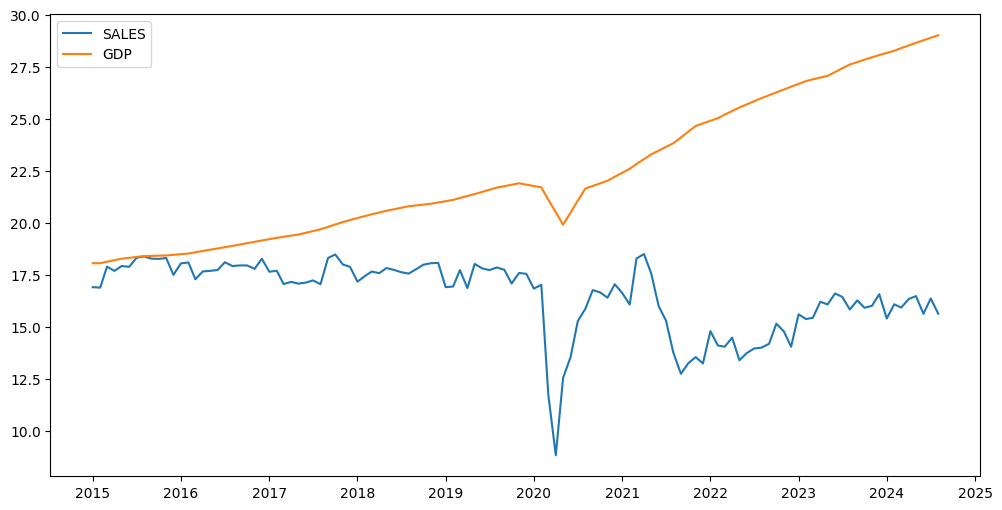

In [44]:
df = pd.merge(
    left = sales_df,
    right = gdp_df,
    on = "DATE",
    how = "outer"
).sort_values(by = "DATE", ascending = True)

df["GDP"] = df["GDP"].interpolate(method="linear", limit_direction="backward")

GDP_avg_growth_rate = (df["GDP"] / df["GDP"].shift(1)).dropna().tail(5).mean()
for x in range(df.shape[0]):
    if(pd.isnull(df.loc[x, "GDP"])):
        df.loc[x, "GDP"] = df.loc[x-1, "GDP"] * GDP_avg_growth_rate
  
print(df)
print(df.tail(15))

plt.figure(figsize=(12, 6))

df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)
df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(df['DATE'], df['SALES'], label='SALES')
plt.plot(df['DATE'], df['GDP'], label='GDP')

plt.legend()
plt.show()

## Training and Test Sets


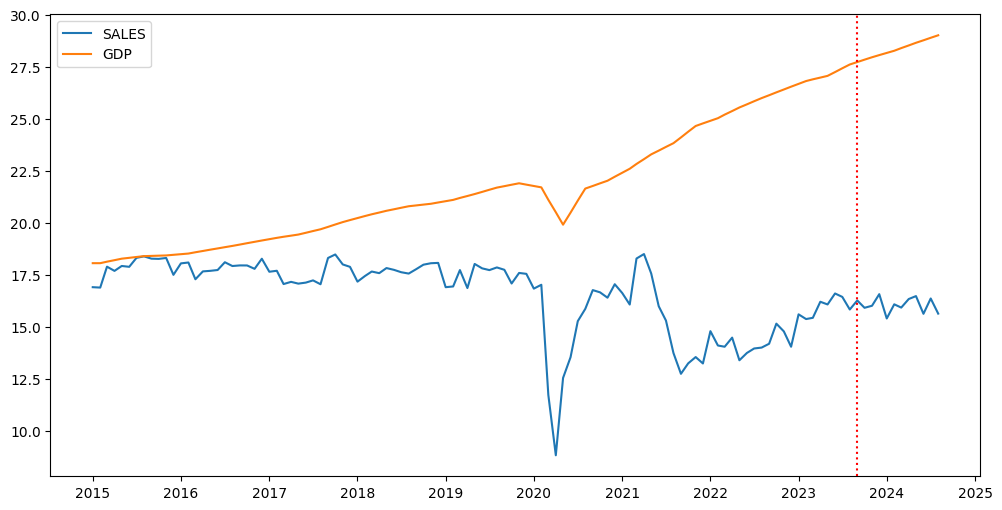

In [45]:
MAX_TRAINING_DATE = df.tail(12).iloc[0]["DATE"]

plt.figure(figsize=(12, 6))

df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)
df = df[df['DATE'] >= '2014-12-12'].reset_index(drop=True)

plt.plot(df['DATE'], df['SALES'], label='SALES')
plt.plot(df['DATE'], df['GDP'], label='GDP')

plt.axvline(MAX_TRAINING_DATE, color="red", linestyle="dotted")

plt.legend()
plt.show()

df_train = df.loc[df["DATE"] < MAX_TRAINING_DATE, :]
df_test = df.loc[df["DATE"] >= MAX_TRAINING_DATE, :]

## Build Initial Model

**Learn about hyper parameters and sarimax**
* Order, trend and seasonal order are all hyperparameters.
* Hyperparameters are parameters whose values control the learning process and influences the forecast result.
* Used by learning algorithm when learning, but not apart of the resulting model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26936D+00    |proj g|=  9.40739D-02

At iterate    5    f=  1.26500D+00    |proj g|=  2.05590D-02

At iterate   10    f=  1.26329D+00    |proj g|=  4.12681D-04

At iterate   15    f=  1.26328D+00    |proj g|=  9.01164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     22      1     0     0   3.378D-06   1.263D+00
  F =   1.2632834689852461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


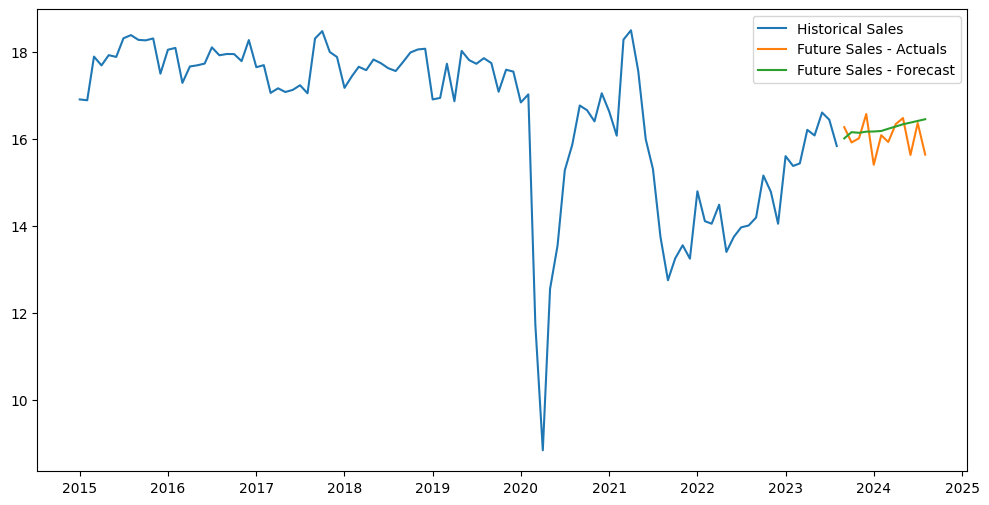

In [46]:
model = SARIMAX(
    endog = df_train["SALES"],
    exog = df_train["GDP"],
    order = (1, 1, 3), # p, d, q order parameters for arima
    trend = [1, 0], # A(t) = a0 + a1*t + a2*t^2 ...
    seasonal_order = (0,0,0, 12) # P, D, Q seasonal order parameters
).fit()

forecast = model.forecast(steps=df_test.shape[0], exog=df_test["GDP"])

plt.figure(figsize=(12, 6))
plt.plot(df_train["DATE"], df_train["SALES"], label="Historical Sales")
plt.plot(df_test["DATE"], df_test["SALES"], label="Future Sales - Actuals")
plt.plot(df_test["DATE"], forecast, label="Future Sales - Forecast")
plt.legend()
plt.show()

## Hyperparameter Scoring Function and Parameter Search Step Function

In [47]:
# Function to "step" randomly in hyperparameter space
def step(params):
    updated_params = deepcopy(params)
    selected_variable = np.random.choice(["p", "d", "q", "P", "D", "Q", "a0", "a1"], size=1)[0]
    current_value = updated_params[selected_variable]
    
    # Update the current value randomly
    updated_value = current_value + np.random.choice([-1, 1], size=1)[0]
    
    # Parameter Limit
    # The "p" and the "q" can both be greater values
    # The "d" (differencing parameter) should always be low
    # The "P" should be low as it is the seasonal. Factors from several years ago are less likely to impact current forecast
    # The "a0" and the "a1" are boolean, so only 0 and 1
    if(selected_variable in ["p", "q"]):
        low, high = 0, 6
    else:
        low, high = 0, 1
    
    # if updated value is greater than the high value -> updated value = high
    # if updated value is lesser than the low value -> updated value = low
    updated_value = min([max([low, updated_value]),high])
    
    updated_params[selected_variable] = updated_value
    
    return updated_params

# Function to score hyperparameter set
def score(params, data):
    
    error_scores = []
    
    for validation_steps in [1,2,3,4,5]:
        training_set_length = data.shape[0] - validation_steps
    
        model = SARIMAX(
            endog = data["SALES"].head(training_set_length),
            exog = data["GDP"].head(training_set_length),
            order = (params["p"], params["d"], params["q"]), # p, d, q order parameters for arima
            trend = [params["a0"], params["a1"]], # A(t) = a0 + a1*t + a2*t^2 ...
            seasonal_order = (params["P"], params["D"], params["Q"], 12) # P, D, Q seasonal order parameters
        ).fit()

        forecast = model.forecast(steps=validation_steps, exog=data["GDP"].tail(validation_steps))
        actuals = data["SALES"].tail(validation_steps)

        # computer error metric and return
        error = (forecast.tail(1) - actuals.tail(1)).abs().mean()
        error_scores.append(error)
        
    return np.mean(error_scores)
    


## Run Hyperparameter Optimization Scan

In [48]:
# Initial guess
x0 = {'p': 1, 'd': 1, 'q': 0, 'P': 0, 'D': 0, 'Q': 0, 'a0': 1, 'a1': 1}
f0 = score(x0, df_train)

# Keep track of best parameters
xbest = deepcopy(x0)
fbest = f0

print('initial parameter score = ', f0)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29836D+00    |proj g|=  9.18692D-02

At iterate    5    f=  1.29834D+00    |proj g|=  2.99091D-01

At iterate   10    f=  1.29785D+00    |proj g|=  5.58939D-01

At iterate   15    f=  1.29725D+00    |proj g|=  1.69405D+00

At iterate   20    f=  1.29187D+00    |proj g|=  1.69263D+00

At iterate   25    f=  1.29102D+00    |proj g|=  4.55956D-01

At iterate   30    f=  1.29095D+00    |proj g|=  3.09106D-02

At iterate   35    f=  1.29090D+00    |proj g|=  2.91647D-01

At iterate   40    f=  1.29084D+00    |proj g|=  1.35295D-02

At iterate   45    f=  1.29079D+00    |proj g|=  1.64663D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.30245D+00    |proj g|=  3.78692D-01

At iterate   10    f=  1.30199D+00    |proj g|=  1.07231D-01

At iterate   15    f=  1.30189D+00    |proj g|=  6.01946D-01

At iterate   20    f=  1.29716D+00    |proj g|=  2.29409D+00

At iterate   25    f=  1.29594D+00    |proj g|=  2.96196D-01

At iterate   30    f=  1.29550D+00    |proj g|=  9.01188D-03

At iterate   35    f=  1.29534D+00    |proj g|=  1.01019D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     55      1     0     0   1.010D-02   1.295D+00
  F =   1.2953412825522173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.30088D+00    |proj g|=  3.01741D+00

At iterate   20    f=  1.29938D+00    |proj g|=  2.48266D-02

At iterate   25    f=  1.29903D+00    |proj g|=  3.25695D-01

At iterate   30    f=  1.29889D+00    |proj g|=  1.47541D-02

At iterate   35    f=  1.29874D+00    |proj g|=  4.17786D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     58      1     0     0   9.488D-03   1.299D+00
  F =   1.2987286168902119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  1.30873D+00    |proj g|=  2.66258D+00

At iterate   20    f=  1.30415D+00    |proj g|=  1.53526D-01

At iterate   25    f=  1.30364D+00    |proj g|=  8.91633D-03

At iterate   30    f=  1.30362D+00    |proj g|=  1.03165D-01

At iterate   35    f=  1.30349D+00    |proj g|=  1.81095D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     58      1     0     0   2.747D-03   1.303D+00
  F =   1.3034874936599559     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.


if(np.random.random() < 2**(-(f1-f0)/temperature))

allows for exploration of the parameter space to a better degree by allowing a worse score temporarily with the goal for a better score 

In [49]:
optimization_steps = 100

temperature = 0.05

optimization_progress = {'f0': [], 'fbest': []}

for t in range(optimization_steps):

    # Randomly changed x0
    x1 = step(x0)
    f1 = score(x1, df_train)

    # If the new point is lower in score than the previous (meaning better)
    if(f1 < f0):
        x0 = deepcopy(x1)
        f0 = f1
    else: # if new point is worse, accept with some probability
        if(np.random.random() < 2**(-(f1-f0)/temperature)):
            x0 = deepcopy(x1)
            f0 = f1

    # Update the 'best' parameters
    if(f0 < fbest):
        fbest = f0
        xbest = deepcopy(x0)

    # Print out progress
    print('current score = {}, best score = {}'.format(f0, fbest))
    optimization_progress['f0'].append(f0)
    optimization_progress['fbest'].append(fbest)
    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29952D+00    |proj g|=  2.15692D-02

At iterate    5    f=  1.29952D+00    |proj g|=  1.40818D-01

At iterate   10    f=  1.29913D+00    |proj g|=  1.77402D+00

At iterate   15    f=  1.29451D+00    |proj g|=  2.93200D-01

At iterate   20    f=  1.29444D+00    |proj g|=  5.18836D-02

At iterate   25    f=  1.29442D+00    |proj g|=  9.76196D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     73      2     0     0   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.30365D+00    |proj g|=  1.35693D-01

At iterate   10    f=  1.30328D+00    |proj g|=  1.70813D+00

At iterate   15    f=  1.29897D+00    |proj g|=  2.75121D-01

At iterate   20    f=  1.29891D+00    |proj g|=  4.17792D-02

At iterate   25    f=  1.29890D+00    |proj g|=  9.57205D-02

At iterate   30    f=  1.29886D+00    |proj g|=  6.01198D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     40      1     0     0   6.012D-03   1.299D+00
  F =   1.2988557131174769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.30714D+00    |proj g|=  5.71005D-02

At iterate   25    f=  1.30709D+00    |proj g|=  1.44655D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     40      1     0     0   1.447D-02   1.307D+00
  F =   1.3070926283608726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31223D+00    |proj g|=  1.93896D-02

At iterate    5    f=  1.31222D+00    |proj g|=  1.67333D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.50863D+00    |proj g|=  3.69205D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     22      1     0     0   3.339D-03   1.509D+00
  F =   1.5086329856444833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51092D+00    |proj g|=  1.30719D+00

At iterate    5    f=  1.51037D+00    |proj g|=  3.79127D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51309D+00    |proj g|=  3.59825D-02

At iterate   10    f=  1.51309D+00    |proj g|=  5.72818D-04

At iterate   15    f=  1.51309D+00    |proj g|=  2.39052D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     52      2     0     0   7.498D-03   1.513D+00
  F =   1.5130884214974274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51332D+00    |proj g|=  1.02595D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  1.51296D+00    |proj g|=  2.90007D-02

At iterate   10    f=  1.51296D+00    |proj g|=  2.15642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     44      2     0     0   9.512D-04   1.513D+00
  F =   1.5129614368521198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51543D+00    |proj g|=  8.94278D-01

At iterate    5    f=  1.51515D+00    |proj g|=  2.49204D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     21      1     0     0   2.149D-03   1.515D+00
  F =   1.5151461227535279     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.5986052118870131, best score = 0.58744402309197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29485D+00    |proj g|=  9.65168D-01

At iterate    5    f=  1.29472D+00    |proj g|=  3.27075D-01

At iterate   10    f=  1.29427D+00    |proj g|=  3.55800D-01

At 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.29833D+00    |proj g|=  1.91648D-01

At iterate   25    f=  1.29805D+00    |proj g|=  2.46781D-01

At iterate   30    f=  1.29555D+00    |proj g|=  5.44690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   3.631D-03   1.296D+00
  F =   1.2955397851585653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30241D+00    |proj g|=  9.83270D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  1.30142D+00    |proj g|=  1.12025D-01

At iterate   30    f=  1.29874D+00    |proj g|=  2.97660D-02

At iterate   35    f=  1.29874D+00    |proj g|=  3.74165D-02

At iterate   40    f=  1.29869D+00    |proj g|=  9.82779D-02

At iterate   45    f=  1.29865D+00    |proj g|=  5.40735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     56      1     0     0   5.407D-03   1.299D+00
  F =   1.2986508210998184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.30622D+00    |proj g|=  8.74760D-02

At iterate   25    f=  1.30349D+00    |proj g|=  9.50013D-02

At iterate   30    f=  1.30347D+00    |proj g|=  6.29922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.645D-05   1.303D+00
  F =   1.3034700007869964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30663D+00    |proj g|=  9.77136D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  1.30557D+00    |proj g|=  2.12305D-02

At iterate   25    f=  1.30328D+00    |proj g|=  7.73557D-01

At iterate   30    f=  1.30253D+00    |proj g|=  6.59397D-02

At iterate   35    f=  1.30246D+00    |proj g|=  3.09232D-01

At iterate   40    f=  1.30243D+00    |proj g|=  1.77592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     45      1     0     0   2.428D-06   1.302D+00
  F =   1.3024323208268298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
current score = 0.5751731457214799, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.



At iterate   15    f=  1.29257D+00    |proj g|=  3.90107D-02

At iterate   20    f=  1.29214D+00    |proj g|=  5.33750D-01

At iterate   25    f=  1.28762D+00    |proj g|=  1.54506D-01

At iterate   30    f=  1.28638D+00    |proj g|=  7.78587D-02

At iterate   35    f=  1.28555D+00    |proj g|=  2.71447D-01

At iterate   40    f=  1.28545D+00    |proj g|=  4.17341D-01

At iterate   45    f=  1.28393D+00    |proj g|=  6.24860D-01

At iterate   50    f=  1.28362D+00    |proj g|=  4.18738D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   4.187D-01   1.284D+00
  F =   1.28361971731

 This problem is unconstrained.



At iterate   10    f=  1.29677D+00    |proj g|=  2.36832D-02

At iterate   15    f=  1.29661D+00    |proj g|=  5.34577D-01

At iterate   20    f=  1.29536D+00    |proj g|=  1.39761D-01

At iterate   25    f=  1.29062D+00    |proj g|=  2.91826D-01

At iterate   30    f=  1.28988D+00    |proj g|=  4.60505D-02

At iterate   35    f=  1.28988D+00    |proj g|=  1.37648D-02

At iterate   40    f=  1.28988D+00    |proj g|=  2.11538D-01

At iterate   45    f=  1.28979D+00    |proj g|=  4.96555D-01

At iterate   50    f=  1.28970D+00    |proj g|=  1.17552D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66   

 This problem is unconstrained.



At iterate    5    f=  1.30028D+00    |proj g|=  8.16671D-01

At iterate   10    f=  1.30013D+00    |proj g|=  2.98488D-02

At iterate   15    f=  1.30001D+00    |proj g|=  4.73555D-01

At iterate   20    f=  1.29921D+00    |proj g|=  2.04616D-01

At iterate   25    f=  1.29898D+00    |proj g|=  4.40434D-01

At iterate   30    f=  1.29495D+00    |proj g|=  6.36209D-02

At iterate   35    f=  1.29480D+00    |proj g|=  3.17805D-02

At iterate   40    f=  1.29390D+00    |proj g|=  6.81719D-03

At iterate   45    f=  1.29388D+00    |proj g|=  3.00270D-01

At iterate   50    f=  1.29245D+00    |proj g|=  2.04657D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30492D+00    |proj g|=  7.23975D-01

At iterate   10    f=  1.30483D+00    |proj g|=  3.18484D-02

At iterate   15    f=  1.30469D+00    |proj g|=  5.57107D-01

At iterate   20    f=  1.30367D+00    |proj g|=  4.76489D-02

At iterate   25    f=  1.30043D+00    |proj g|=  4.65833D-01

At iterate   30    f=  1.29902D+00    |proj g|=  3.08903D-02

At iterate   35    f=  1.29878D+00    |proj g|=  4.12372D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     55      1     0     0   2.334D-02   1.299D+00
  F =   1.2987232821098118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.30409D+00    |proj g|=  8.55298D-02

At iterate   20    f=  1.30359D+00    |proj g|=  8.53494D-01

At iterate   25    f=  1.30249D+00    |proj g|=  5.31019D-01

At iterate   30    f=  1.29863D+00    |proj g|=  5.28756D-01

At iterate   35    f=  1.29814D+00    |proj g|=  4.44968D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.29802D+00    |proj g|=  3.68167D-02

At iterate   45    f=  1.29517D+00    |proj g|=  8.20032D-02

At iterate   50    f=  1.29515D+00    |proj g|=  3.12663D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     83      2     0     0   3.127D-02   1.295D+00
  F =   1.2951526826773871     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
current score = 0.5751731457214799, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.



At iterate   15    f=  1.29424D+00    |proj g|=  8.05754D-02

At iterate   20    f=  1.29400D+00    |proj g|=  3.98011D-01

At iterate   25    f=  1.29183D+00    |proj g|=  6.76539D-01

At iterate   30    f=  1.29099D+00    |proj g|=  1.49270D-02

At iterate   35    f=  1.29097D+00    |proj g|=  2.54478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     55      1     0     0   3.727D-04   1.291D+00
  F =   1.2909680897816103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.29833D+00    |proj g|=  1.91648D-01

At iterate   25    f=  1.29805D+00    |proj g|=  2.46781D-01

At iterate   30    f=  1.29555D+00    |proj g|=  5.44690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   3.631D-03   1.296D+00
  F =   1.2955397851585653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30241D+00    |proj g|=  9.83270D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  1.30142D+00    |proj g|=  1.12025D-01

At iterate   30    f=  1.29874D+00    |proj g|=  2.97660D-02

At iterate   35    f=  1.29874D+00    |proj g|=  3.74165D-02

At iterate   40    f=  1.29869D+00    |proj g|=  9.82779D-02

At iterate   45    f=  1.29865D+00    |proj g|=  5.40735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     56      1     0     0   5.407D-03   1.299D+00
  F =   1.2986508210998184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.30622D+00    |proj g|=  8.74760D-02

At iterate   25    f=  1.30349D+00    |proj g|=  9.50013D-02

At iterate   30    f=  1.30347D+00    |proj g|=  6.29922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.645D-05   1.303D+00
  F =   1.3034700007869964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30663D+00    |proj g|=  9.77136D-01


 This problem is unconstrained.



At iterate    5    f=  1.30650D+00    |proj g|=  3.18830D-01

At iterate   10    f=  1.30601D+00    |proj g|=  3.57025D-01

At iterate   15    f=  1.30597D+00    |proj g|=  8.78046D-02

At iterate   20    f=  1.30557D+00    |proj g|=  2.12305D-02

At iterate   25    f=  1.30328D+00    |proj g|=  7.73557D-01

At iterate   30    f=  1.30253D+00    |proj g|=  6.59397D-02

At iterate   35    f=  1.30246D+00    |proj g|=  3.09232D-01

At iterate   40    f=  1.30243D+00    |proj g|=  1.77592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     45      1     0     0   2.428D-06   1.302D+00
  F =   1.30243232082

 This problem is unconstrained.



At iterate    5    f=  1.41882D+00    |proj g|=  1.20959D+00

At iterate   10    f=  1.40343D+00    |proj g|=  1.03016D+00

At iterate   15    f=  1.40306D+00    |proj g|=  2.25426D-01

At iterate   20    f=  1.40268D+00    |proj g|=  1.25041D-02

At iterate   25    f=  1.40259D+00    |proj g|=  3.64270D-01

At iterate   30    f=  1.40098D+00    |proj g|=  3.15110D-02

At iterate   35    f=  1.40078D+00    |proj g|=  3.61968D-01

At iterate   40    f=  1.40070D+00    |proj g|=  1.88070D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     59      1     0     0   1.879D-04   1.401D+00
  F =   1.40070092798


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.40640D+00    |proj g|=  9.95060D-01

At iterate   15    f=  1.40605D+00    |proj g|=  2.17407D-01

At iterate   20    f=  1.40568D+00    |proj g|=  1.16796D-02

At iterate   25    f=  1.40564D+00    |proj g|=  1.08103D-01

At iterate   30    f=  1.40408D+00    |proj g|=  1.23457D-02

At iterate   35    f=  1.40390D+00    |proj g|=  2.44770D-02

At iterate   40    f=  1.40371D+00    |proj g|=  2.82008D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     66      1     0     0   1.928D-03   1.404D+00
  F =   1.4037046595236227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.40636D+00    |proj g|=  9.67299D-01

At iterate   15    f=  1.40601D+00    |proj g|=  1.75970D-01

At iterate   20    f=  1.40547D+00    |proj g|=  2.35199D-01

At iterate   25    f=  1.40366D+00    |proj g|=  1.32912D-01

At iterate   30    f=  1.40365D+00    |proj g|=  1.03133D-01

At iterate   35    f=  1.40364D+00    |proj g|=  1.40479D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     70      2     0     0   9.912D-05   1.404D+00
  F =   1.4036414247563564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42484D+00    |proj g|=  3.07834D+00

At iterate    5    f=  1.42138D+00    |proj g|=  1.22402D+00


 This problem is unconstrained.



At iterate   10    f=  1.40483D+00    |proj g|=  9.02168D-01

At iterate   15    f=  1.40453D+00    |proj g|=  1.01161D-01

At iterate   20    f=  1.40405D+00    |proj g|=  1.58488D-01

At iterate   25    f=  1.40256D+00    |proj g|=  5.21816D-01

At iterate   30    f=  1.40240D+00    |proj g|=  1.98956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   1.990D-03   1.402D+00
  F =   1.4023958698505943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.42282D+00    |proj g|=  1.23278D+00

At iterate   10    f=  1.40592D+00    |proj g|=  8.36781D-01

At iterate   15    f=  1.40565D+00    |proj g|=  8.02555D-02

At iterate   20    f=  1.40538D+00    |proj g|=  3.59250D-01

At iterate   25    f=  1.40531D+00    |proj g|=  7.94584D-02

At iterate   30    f=  1.40481D+00    |proj g|=  8.29130D-01

At iterate   35    f=  1.40374D+00    |proj g|=  5.70842D-03

At iterate   40    f=  1.40371D+00    |proj g|=  4.21715D-02

At iterate   45    f=  1.40366D+00    |proj g|=  4.32448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     64   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.29400D+00    |proj g|=  3.98011D-01

At iterate   25    f=  1.29183D+00    |proj g|=  6.76539D-01

At iterate   30    f=  1.29099D+00    |proj g|=  1.49270D-02

At iterate   35    f=  1.29097D+00    |proj g|=  2.54478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     55      1     0     0   3.727D-04   1.291D+00
  F =   1.2909680897816103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.29833D+00    |proj g|=  1.91648D-01

At iterate   25    f=  1.29805D+00    |proj g|=  2.46781D-01

At iterate   30    f=  1.29555D+00    |proj g|=  5.44690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     43      1     0     0   3.631D-03   1.296D+00
  F =   1.2955397851585653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30241D+00    |proj g|=  9.83270D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  1.30142D+00    |proj g|=  1.12025D-01

At iterate   30    f=  1.29874D+00    |proj g|=  2.97660D-02

At iterate   35    f=  1.29874D+00    |proj g|=  3.74165D-02

At iterate   40    f=  1.29869D+00    |proj g|=  9.82779D-02

At iterate   45    f=  1.29865D+00    |proj g|=  5.40735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     56      1     0     0   5.407D-03   1.299D+00
  F =   1.2986508210998184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.30622D+00    |proj g|=  8.74760D-02

At iterate   25    f=  1.30349D+00    |proj g|=  9.50013D-02

At iterate   30    f=  1.30347D+00    |proj g|=  6.29922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.645D-05   1.303D+00
  F =   1.3034700007869964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30663D+00    |proj g|=  9.77136D-01


 This problem is unconstrained.



At iterate    5    f=  1.30650D+00    |proj g|=  3.18830D-01

At iterate   10    f=  1.30601D+00    |proj g|=  3.57025D-01

At iterate   15    f=  1.30597D+00    |proj g|=  8.78046D-02

At iterate   20    f=  1.30557D+00    |proj g|=  2.12305D-02

At iterate   25    f=  1.30328D+00    |proj g|=  7.73557D-01

At iterate   30    f=  1.30253D+00    |proj g|=  6.59397D-02

At iterate   35    f=  1.30246D+00    |proj g|=  3.09232D-01

At iterate   40    f=  1.30243D+00    |proj g|=  1.77592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     45      1     0     0   2.428D-06   1.302D+00
  F =   1.30243232082

 This problem is unconstrained.



At iterate    5    f=  1.29472D+00    |proj g|=  3.27075D-01

At iterate   10    f=  1.29427D+00    |proj g|=  3.55800D-01

At iterate   15    f=  1.29424D+00    |proj g|=  8.05754D-02

At iterate   20    f=  1.29400D+00    |proj g|=  3.98011D-01

At iterate   25    f=  1.29183D+00    |proj g|=  6.76539D-01

At iterate   30    f=  1.29099D+00    |proj g|=  1.49270D-02

At iterate   35    f=  1.29097D+00    |proj g|=  2.54478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     55      1     0     0   3.727D-04   1.291D+00
  F =   1.2909680897816103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29913D+00    |proj g|=  9.55790D-01

At iterate    5    f=  1.29901D+00    |proj g|=  3.34832D-01

At iterate   10    f=  1.29856D+00    |proj g|=  3.06340D-01

At iterate   15    f=  1.29853D+00    |proj g|=  7.74900D-02

At iterate   20    f=  1.29833D+00    |proj g|=  1.91648D-01

At iterate   25    f=  1.29805D+00    |proj g|=  2.46781D-01

At iterate   30    f=  1.29555D+00    |proj g|=  5.44690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   20    f=  1.30155D+00    |proj g|=  1.25323D-01

At iterate   25    f=  1.30142D+00    |proj g|=  1.12025D-01

At iterate   30    f=  1.29874D+00    |proj g|=  2.97660D-02

At iterate   35    f=  1.29874D+00    |proj g|=  3.74165D-02

At iterate   40    f=  1.29869D+00    |proj g|=  9.82779D-02

At iterate   45    f=  1.29865D+00    |proj g|=  5.40735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     56      1     0     0   5.407D-03   1.299D+00
  F =   1.2986508210998184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.30648D+00    |proj g|=  3.43995D-01

At iterate   15    f=  1.30645D+00    |proj g|=  8.28682D-02

At iterate   20    f=  1.30622D+00    |proj g|=  8.74760D-02

At iterate   25    f=  1.30349D+00    |proj g|=  9.50013D-02

At iterate   30    f=  1.30347D+00    |proj g|=  6.29922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   1.645D-05   1.303D+00
  F =   1.3034700007869964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  1.30557D+00    |proj g|=  2.12305D-02

At iterate   25    f=  1.30328D+00    |proj g|=  7.73557D-01

At iterate   30    f=  1.30253D+00    |proj g|=  6.59397D-02

At iterate   35    f=  1.30246D+00    |proj g|=  3.09232D-01

At iterate   40    f=  1.30243D+00    |proj g|=  1.77592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     45      1     0     0   2.428D-06   1.302D+00
  F =   1.3024323208268298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
current score = 0.5751731457214799, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     73      2     0     0   1.378D-02   1.294D+00
  F =   1.2943821686063335     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30365D+00    |proj g|=  2.09683D-02

At iterate    5    f=  1.30365D+00    |proj g|=  1.35693D-01

At iterate   10    f=  1.30328D+00    |proj g|=  1.70813D+00

At iterate   15    f=  1.29897D+00    |proj g|=  2.75121D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.31164D+00    |proj g|=  2.02524D+00

At iterate   15    f=  1.30662D+00    |proj g|=  1.56228D-01

At iterate   20    f=  1.30656D+00    |proj g|=  4.02721D-02

At iterate   25    f=  1.30651D+00    |proj g|=  1.12109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     37      1     0     0   1.121D-02   1.307D+00
  F =   1.3065082704466078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.5986052118870131, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =       

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     73      2     0     0   1.378D-02   1.294D+00
  F =   1.2943821686063335     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30365D+00    |proj g|=  2.09683D-02

At iterate    5    f=  1.30365D+00    |proj g|=  1.35693D-01

At iterate   10    f=  1.30328D+00    |proj g|=  1.70813D+00

At iterate   15    f=  1.29897D+00    |proj g|=  2.75121D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.30231D+00    |proj g|=  5.47317D-02

At iterate   25    f=  1.30225D+00    |proj g|=  7.66348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     42      1     0     0   5.159D-03   1.302D+00
  F =   1.3022523738784628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31196D+00    |proj g|=  1.98022D-02

At iterate    5    f=  1.31196D+00    |proj g|=  1.42512D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.31222D+00    |proj g|=  1.67333D-01

At iterate   10    f=  1.31164D+00    |proj g|=  2.02524D+00

At iterate   15    f=  1.30662D+00    |proj g|=  1.56228D-01

At iterate   20    f=  1.30656D+00    |proj g|=  4.02721D-02

At iterate   25    f=  1.30651D+00    |proj g|=  1.12109D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     37      1     0     0   1.121D-02   1.307D+00
  F =   1.3065082704466078     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.5986052118870131, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.



At iterate   10    f=  1.29737D+00    |proj g|=  7.67494D-01

At iterate   15    f=  1.29729D+00    |proj g|=  6.32293D-02

At iterate   20    f=  1.29707D+00    |proj g|=  4.14774D-01

At iterate   25    f=  1.29696D+00    |proj g|=  1.63110D-02

At iterate   30    f=  1.29603D+00    |proj g|=  7.96057D-01

At iterate   35    f=  1.29470D+00    |proj g|=  8.59426D-03

At iterate   40    f=  1.29458D+00    |proj g|=  3.91276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   3.169D-03   1.295D+00
  F =   1.2945841233284954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.30066D+00    |proj g|=  7.36573D-01

At iterate   15    f=  1.30059D+00    |proj g|=  5.28868D-02

At iterate   20    f=  1.30035D+00    |proj g|=  3.73409D-01

At iterate   25    f=  1.30024D+00    |proj g|=  1.41636D-02

At iterate   30    f=  1.29894D+00    |proj g|=  6.56710D-01

At iterate   35    f=  1.29789D+00    |proj g|=  8.27365D-03

At iterate   40    f=  1.29788D+00    |proj g|=  8.14069D-02

At iterate   45    f=  1.29782D+00    |proj g|=  2.50612D-01

At iterate   50    f=  1.29779D+00    |proj g|=  5.59918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.30546D+00    |proj g|=  1.46818D-01

At iterate   10    f=  1.30527D+00    |proj g|=  6.21360D-01

At iterate   15    f=  1.30522D+00    |proj g|=  4.70434D-02

At iterate   20    f=  1.30497D+00    |proj g|=  3.54668D-01

At iterate   25    f=  1.30480D+00    |proj g|=  7.28172D-02

At iterate   30    f=  1.30279D+00    |proj g|=  4.72309D-01

At iterate   35    f=  1.30257D+00    |proj g|=  2.80759D-03

At iterate   40    f=  1.30257D+00    |proj g|=  2.57992D-02

At iterate   45    f=  1.30256D+00    |proj g|=  3.27762D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     68   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.30431D+00    |proj g|=  4.13000D-01

At iterate   25    f=  1.30392D+00    |proj g|=  2.55988D-01

At iterate   30    f=  1.30160D+00    |proj g|=  5.25353D-01

At iterate   35    f=  1.30146D+00    |proj g|=  6.02823D-03

At iterate   40    f=  1.30144D+00    |proj g|=  9.67469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     58      1     0     0   9.675D-04   1.301D+00
  F =   1.3014382401046742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.5879753682918956, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  1.29275D+00    |proj g|=  4.72282D-01

At iterate   25    f=  1.29263D+00    |proj g|=  1.67918D-02

At iterate   30    f=  1.29176D+00    |proj g|=  8.67473D-01

At iterate   35    f=  1.29013D+00    |proj g|=  1.62080D-01

At iterate   40    f=  1.29011D+00    |proj g|=  5.98982D-02

At iterate   45    f=  1.29005D+00    |proj g|=  1.57290D-01

At iterate   50    f=  1.29004D+00    |proj g|=  1.37814D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   1.378D-03   1.290D+00
  F =   1.2900368250092540     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.29729D+00    |proj g|=  6.32293D-02

At iterate   20    f=  1.29707D+00    |proj g|=  4.14774D-01

At iterate   25    f=  1.29696D+00    |proj g|=  1.63110D-02

At iterate   30    f=  1.29603D+00    |proj g|=  7.96057D-01

At iterate   35    f=  1.29470D+00    |proj g|=  8.59426D-03

At iterate   40    f=  1.29458D+00    |proj g|=  3.91276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     50      1     0     0   3.169D-03   1.295D+00
  F =   1.2945841233284954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  1.30035D+00    |proj g|=  3.73409D-01

At iterate   25    f=  1.30024D+00    |proj g|=  1.41636D-02

At iterate   30    f=  1.29894D+00    |proj g|=  6.56710D-01

At iterate   35    f=  1.29789D+00    |proj g|=  8.27365D-03

At iterate   40    f=  1.29788D+00    |proj g|=  8.14069D-02

At iterate   45    f=  1.29782D+00    |proj g|=  2.50612D-01

At iterate   50    f=  1.29779D+00    |proj g|=  5.59918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55      1     0     0   5.599D-03   1.298D+00
  F =   1.2977906088062987     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.30522D+00    |proj g|=  4.70434D-02

At iterate   20    f=  1.30497D+00    |proj g|=  3.54668D-01

At iterate   25    f=  1.30480D+00    |proj g|=  7.28172D-02

At iterate   30    f=  1.30279D+00    |proj g|=  4.72309D-01

At iterate   35    f=  1.30257D+00    |proj g|=  2.80759D-03

At iterate   40    f=  1.30257D+00    |proj g|=  2.57992D-02

At iterate   45    f=  1.30256D+00    |proj g|=  3.27762D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     68      1     0     0   3.142D-03   1.303D+00
  F =   1.3025597887793858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30491D+00    |proj g|=  3.15130D-01

At iterate    5    f=  1.30489D+00    |proj g|=  1.61150D-01

At iterate   10    f=  1.30468D+00    |proj g|=  6.22014D-01

At iterate   15    f=  1.30463D+00    |proj g|=  5.50112D-02

At iterate   20    f=  1.30431D+00    |proj g|=  4.13000D-01

At iterate   25    f=  1.30392D+00    |proj g|=  2.55988D-01

At iterate   30    f=  1.30160D+00    |proj g|=  5.25353D-01

At iterate   35    f=  1.30146D+00    |proj g|=  6.02823D-03

At iterate   40    f=  1.30144D+00    |proj g|=  9.67469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.3044558317892025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.38816D+00    |proj g|=  2.22249D+00

At iterate   10    f=  1.35235D+00    |proj g|=  2.66556D+01

At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   10    f=  1.34690D+00    |proj g|=  2.50149D+01

At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.30445583178


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.3044558317892025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37577D+00    |proj g|=  2.13855D+00

At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37862D+00    |proj g|=  2.14042D+00

At iterate   10    f=  1.34690D+00    |proj g|=  2.50149D+01

At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51092D+00    |proj g|=  1.30719D+00

At iterate    5    f=  1.51037D+00    |proj g|=  3.79127D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     22      1     0     0   3.208D-03   1.510D+00
  F =   1.5103662472869082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   10    f=  1.51309D+00    |proj g|=  5.72818D-04

At iterate   15    f=  1.51309D+00    |proj g|=  2.39052D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     52      2     0     0   7.498D-03   1.513D+00
  F =   1.5130884214974274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51332D+00    |proj g|=  1.02595D+00

At iterate    5    f=  1.51296D+00    |proj g|=  2.90007D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.51296D+00    |proj g|=  2.15642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     44      2     0     0   9.512D-04   1.513D+00
  F =   1.5129614368521198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51543D+00    |proj g|=  8.94278D-01

At iterate    5    f=  1.51515D+00    |proj g|=  2.49204D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  1.34690D+00    |proj g|=  2.50149D+01

At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.30445583178


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.3044558317892025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34498D+00    |proj g|=  2.52749D+01

At iterate   15    f=  1.30896D+00    |proj g|=  1.35364D-02

At iterate   20    f=  1.30687D+00    |proj g|=  3.50198D-02

At iterate   25    f=  1.30216D+00    |proj g|=  4.92206D-02

At iterate   30    f=  1.30159D+00    |proj g|=  8.05962D-03

At iterate   35    f=  1.30093D+00    |proj g|=  1.44772D-02

At iterate   40    f=  1.29977D+00    |proj g|=  5.25036D-03

At iterate   45    f=  1.29968D+00    |proj g|=  5.45355D-03

At iterate   50    f=  1.29967D+00    |proj g|=  3.01587D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate   15    f=  1.31182D+00    |proj g|=  9.02029D-02

At iterate   20    f=  1.31104D+00    |proj g|=  8.53360D-01

At iterate   25    f=  1.31026D+00    |proj g|=  5.45083D-02

At iterate   30    f=  1.31024D+00    |proj g|=  3.71771D-01

At iterate   35    f=  1.30807D+00    |proj g|=  3.13730D+00

At iterate   40    f=  1.30467D+00    |proj g|=  2.49092D-01

At iterate   45    f=  1.30446D+00    |proj g|=  9.60568D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   3.449D-03   1.304D+00
  F =   1.3044558317892025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.34889D+00    |proj g|=  2.53306D+01

At iterate   15    f=  1.31315D+00    |proj g|=  3.09574D-02

At iterate   20    f=  1.31293D+00    |proj g|=  6.18628D-01

At iterate   25    f=  1.31165D+00    |proj g|=  1.37750D-02

At iterate   30    f=  1.31068D+00    |proj g|=  9.24014D-01

At iterate   35    f=  1.30702D+00    |proj g|=  9.40914D-01

At iterate   40    f=  1.30689D+00    |proj g|=  4.35326D-02

At iterate   45    f=  1.30628D+00    |proj g|=  5.79917D-01

At iterate   50    f=  1.30531D+00    |proj g|=  9.06475D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.



At iterate   15    f=  1.31233D+00    |proj g|=  1.15246D-02

At iterate   20    f=  1.31209D+00    |proj g|=  4.11998D-01

At iterate   25    f=  1.31140D+00    |proj g|=  3.22660D-02

At iterate   30    f=  1.30871D+00    |proj g|=  6.60418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     56      1     0     0   8.551D-02   1.309D+00
  F =   1.3085605979453152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35196D+00    |proj g|=  2.74015D+01

At iterate   15    f=  1.31010D+00    |proj g|=  1.33732D-02

At iterate   20    f=  1.30997D+00    |proj g|=  5.30064D-01

At iterate   25    f=  1.30931D+00    |proj g|=  1.30062D-01

At iterate   30    f=  1.30911D+00    |proj g|=  2.08459D-01

At iterate   35    f=  1.30731D+00    |proj g|=  2.65081D-02

At iterate   40    f=  1.30665D+00    |proj g|=  2.40207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     70      1     0     0   2.402D-02   1.307D+00
  F =   1.3066455212639083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.35089D+00    |proj g|=  2.51248D+01

At iterate   15    f=  1.30888D+00    |proj g|=  2.51857D-01

At iterate   20    f=  1.30699D+00    |proj g|=  1.58259D+00

At iterate   25    f=  1.30292D+00    |proj g|=  1.39731D-02

At iterate   30    f=  1.30237D+00    |proj g|=  1.71387D-01

At iterate   35    f=  1.29721D+00    |proj g|=  5.44739D-02

At iterate   40    f=  1.29706D+00    |proj g|=  6.22035D-02

At iterate   45    f=  1.29686D+00    |proj g|=  2.87438D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     60      1     0     0   6.863D-02   1.297D+00
  F =   1.29684641673

 This problem is unconstrained.



At iterate    5    f=  1.38682D+00    |proj g|=  1.99510D+00

At iterate   10    f=  1.35231D+00    |proj g|=  2.50139D+01

At iterate   15    f=  1.31209D+00    |proj g|=  7.81221D-02

At iterate   20    f=  1.31101D+00    |proj g|=  1.54951D+00

At iterate   25    f=  1.30602D+00    |proj g|=  1.49389D-01

At iterate   30    f=  1.30599D+00    |proj g|=  9.80752D-02

At iterate   35    f=  1.30538D+00    |proj g|=  2.39305D+00

At iterate   40    f=  1.30094D+00    |proj g|=  1.71937D-01

At iterate   45    f=  1.30003D+00    |proj g|=  7.85807D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     63   

 This problem is unconstrained.


At iterate    5    f=  1.39031D+00    |proj g|=  2.02797D+00

At iterate   10    f=  1.35377D+00    |proj g|=  2.53226D+01

At iterate   15    f=  1.31342D+00    |proj g|=  7.70206D-02

At iterate   20    f=  1.31251D+00    |proj g|=  1.50725D+00

At iterate   25    f=  1.30747D+00    |proj g|=  2.33663D-01

At iterate   30    f=  1.30742D+00    |proj g|=  6.00455D-02

At iterate   35    f=  1.30723D+00    |proj g|=  1.28422D+00

At iterate   40    f=  1.30501D+00    |proj g|=  4.63756D-01

At iterate   45    f=  1.30476D+00    |proj g|=  1.33821D-01

At iterate   50    f=  1.30282D+00    |proj g|=  1.09686D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   10    f=  1.35758D+00    |proj g|=  2.64914D+01

At iterate   15    f=  1.31303D+00    |proj g|=  7.29955D-02

At iterate   20    f=  1.31211D+00    |proj g|=  1.32198D+00

At iterate   25    f=  1.30768D+00    |proj g|=  1.43359D-01

At iterate   30    f=  1.30766D+00    |proj g|=  4.97020D-02

At iterate   35    f=  1.30743D+00    |proj g|=  1.43328D+00

At iterate   40    f=  1.30556D+00    |proj g|=  3.45545D-02

At iterate   45    f=  1.30548D+00    |proj g|=  3.08079D-01

At iterate   50    f=  1.30536D+00    |proj g|=  7.89420D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.39895D+00    |proj g|=  2.11884D+00

At iterate   10    f=  1.35724D+00    |proj g|=  2.73089D+01

At iterate   15    f=  1.31026D+00    |proj g|=  7.60337D-02

At iterate   20    f=  1.30891D+00    |proj g|=  1.19076D+00

At iterate   25    f=  1.30462D+00    |proj g|=  6.04877D-02

At iterate   30    f=  1.30461D+00    |proj g|=  5.85961D-02

At iterate   35    f=  1.30400D+00    |proj g|=  2.30459D-01

At iterate   40    f=  1.30329D+00    |proj g|=  1.41780D-02

At iterate   45    f=  1.30304D+00    |proj g|=  4.02501D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     68   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37525D+00    |proj g|=  2.19306D+00

At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60   

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.37525D+00    |proj g|=  2.19306D+00

At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60   

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate   15    f=  1.48462D+00    |proj g|=  1.19112D+00

At iterate   20    f=  1.48093D+00    |proj g|=  4.15526D-01

At iterate   25    f=  1.47712D+00    |proj g|=  6.55196D-02

At iterate   30    f=  1.47660D+00    |proj g|=  7.84445D-03

At iterate   35    f=  1.47621D+00    |proj g|=  1.61891D-02

At iterate   40    f=  1.47620D+00    |proj g|=  1.11486D-03

At iterate   45    f=  1.47620D+00    |proj g|=  1.04933D-03

At iterate   50    f=  1.47620D+00    |proj g|=  2.78414D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   2.784D-05   1.476D+00
  F =   1.47620103106

 This problem is unconstrained.



At iterate   10    f=  1.49048D+00    |proj g|=  1.04742D-01

At iterate   15    f=  1.48717D+00    |proj g|=  9.31513D-01

At iterate   20    f=  1.48327D+00    |proj g|=  3.15564D-01

At iterate   25    f=  1.47894D+00    |proj g|=  1.74284D-01

At iterate   30    f=  1.47855D+00    |proj g|=  5.87207D-03

At iterate   35    f=  1.47846D+00    |proj g|=  7.77975D-02

At iterate   40    f=  1.47819D+00    |proj g|=  1.00941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     48      1     0     0   1.225D-03   1.478D+00
  F =   1.4781899320578022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   25    f=  1.48133D+00    |proj g|=  4.21477D-02

At iterate   30    f=  1.48130D+00    |proj g|=  4.22047D-02

At iterate   35    f=  1.48097D+00    |proj g|=  2.69724D-02

At iterate   40    f=  1.48095D+00    |proj g|=  2.67422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     52      1     0     0   2.674D-04   1.481D+00
  F =   1.4809493981396860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.49621D+00    |proj g|=  1.06525D+00

At iterate   10    f=  1.49532D+00    |proj g|=  1.07707D-01

At iterate   15    f=  1.49178D+00    |proj g|=  9.72060D-01

At iterate   20    f=  1.48774D+00    |proj g|=  3.30002D-01

At iterate   25    f=  1.48324D+00    |proj g|=  1.63486D-01

At iterate   30    f=  1.48230D+00    |proj g|=  2.88754D-02

At iterate   35    f=  1.48216D+00    |proj g|=  1.05481D-02

At iterate   40    f=  1.48191D+00    |proj g|=  5.10265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     49      1     0     0   2.169D-04   1.482D+00
  F =   1.48191039179

 This problem is unconstrained.



At iterate   15    f=  1.49436D+00    |proj g|=  1.00823D+00

At iterate   20    f=  1.49018D+00    |proj g|=  3.62067D-01

At iterate   25    f=  1.48446D+00    |proj g|=  4.51756D-02

At iterate   30    f=  1.48422D+00    |proj g|=  2.14677D-02

At iterate   35    f=  1.48384D+00    |proj g|=  1.96199D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     75      2     0     0   1.962D-04   1.484D+00
  F =   1.4838353161749116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.6197899834033318, best score = 0.5751731457214799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38116D+00    |proj g|=  6.96503D+00

At iterate    5    f=  1.37525D+00    |proj g|=  2.19306D+00

At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

A

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.39149D+00    |proj g|=  2.34550D+00

At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60      1     0     0   2.108D-03   1.290D+00
  F =   1.28952095784

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.30345D+00    |proj g|=  4.88698D-02

At iterate   10    f=  1.29092D+00    |proj g|=  1.78558D-03

At iterate   15    f=  1.29052D+00    |proj g|=  1.03888D-02

At iterate   20    f=  1.29016D+00    |proj g|=  1.56042D-02

At iterate   25    f=  1.28976D+00    |proj g|=  5.03159D-03

At iterate   30    f=  1.28967D+00    |proj g|=  2.03908D-03

At iterate   35    f=  1.28966D+00    |proj g|=  1.10342D-03

At iterate   40    f=  1.28966D+00    |proj g|=  8.97239D-05

At iterate   45    f=  1.28966D+00    |proj g|=  1.53317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     68   

 This problem is unconstrained.



At iterate    5    f=  1.30558D+00    |proj g|=  6.13748D-02

At iterate   10    f=  1.29375D+00    |proj g|=  3.45609D-03

At iterate   15    f=  1.29325D+00    |proj g|=  1.73962D-02

At iterate   20    f=  1.29277D+00    |proj g|=  2.23311D-03

At iterate   25    f=  1.29250D+00    |proj g|=  8.90386D-03

At iterate   30    f=  1.29239D+00    |proj g|=  1.85799D-03

At iterate   35    f=  1.29237D+00    |proj g|=  2.47361D-04

At iterate   40    f=  1.29236D+00    |proj g|=  1.61898D-04
  ys=-3.313E-07  -gs= 6.481E-07 BFGS update SKIPPED

At iterate   45    f=  1.29236D+00    |proj g|=  2.34829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.30506D+00    |proj g|=  7.87665D-02

At iterate   10    f=  1.29479D+00    |proj g|=  2.16949D-03

At iterate   15    f=  1.29389D+00    |proj g|=  6.72012D-03

At iterate   20    f=  1.29356D+00    |proj g|=  7.32348D-03

At iterate   25    f=  1.29339D+00    |proj g|=  1.21406D-03

At iterate   30    f=  1.29337D+00    |proj g|=  1.14074D-03

At iterate   35    f=  1.29335D+00    |proj g|=  4.40143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     57      1     0     0   4.237D-04   1.293D+00
  F =   1.2933530158890854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31091D+00    |proj g|=  1.64754D-02

At iterate   10    f=  1.29723D+00    |proj g|=  1.07719D-02

At iterate   15    f=  1.29699D+00    |proj g|=  7.05150D-03

At iterate   20    f=  1.29672D+00    |proj g|=  2.00783D-03

At iterate   25    f=  1.29615D+00    |proj g|=  4.75079D-03

At iterate   30    f=  1.29593D+00    |proj g|=  1.66388D-03

At iterate   35    f=  1.29584D+00    |proj g|=  5.67270D-04

At iterate   40    f=  1.29583D+00    |proj g|=  1.01494D-03

At iterate   45    f=  1.29583D+00    |proj g|=  8.78628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57   

 This problem is unconstrained.



At iterate    5    f=  1.30878D+00    |proj g|=  1.17260D-02

At iterate   10    f=  1.29834D+00    |proj g|=  2.52025D-02

At iterate   15    f=  1.29606D+00    |proj g|=  3.25409D-03

At iterate   20    f=  1.29555D+00    |proj g|=  1.23628D-03

At iterate   25    f=  1.29511D+00    |proj g|=  2.17824D-02

At iterate   30    f=  1.29470D+00    |proj g|=  2.09578D-03

At iterate   35    f=  1.29465D+00    |proj g|=  6.92970D-04

At iterate   40    f=  1.29464D+00    |proj g|=  5.05006D-04

At iterate   45    f=  1.29464D+00    |proj g|=  2.21341D-04

At iterate   50    f=  1.29464D+00    |proj g|=  2.53634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29339D+00    |proj g|=  5.46718D-03

At iterate   15    f=  1.29265D+00    |proj g|=  6.71352D-03

At iterate   20    f=  1.29220D+00    |proj g|=  6.66484D-04

At iterate   25    f=  1.29215D+00    |proj g|=  1.31948D-03

At iterate   30    f=  1.29215D+00    |proj g|=  7.61317D-05

At iterate   35    f=  1.29215D+00    |proj g|=  1.92071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     51      1     0     0   2.544D-05   1.292D+00
  F =   1.2921464790214043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.29570D+00    |proj g|=  5.55070D-03

At iterate   15    f=  1.29448D+00    |proj g|=  3.28030D-03

At iterate   20    f=  1.29424D+00    |proj g|=  3.72149D-03

At iterate   25    f=  1.29419D+00    |proj g|=  7.88876D-04

At iterate   30    f=  1.29419D+00    |proj g|=  2.66509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     43      1     0     0   2.665D-05   1.294D+00
  F =   1.2941863502301254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.30008D+00    |proj g|=  5.17118D-02

At iterate   10    f=  1.29758D+00    |proj g|=  6.09092D-03

At iterate   15    f=  1.29648D+00    |proj g|=  4.06542D-03

At iterate   20    f=  1.29604D+00    |proj g|=  3.19610D-03

At iterate   25    f=  1.29601D+00    |proj g|=  1.69718D-03

At iterate   30    f=  1.29600D+00    |proj g|=  2.22288D-04

At iterate   35    f=  1.29600D+00    |proj g|=  2.96677D-04
  ys=-6.726E-07  -gs= 8.346E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     67      1     1     0   4.057D-04   1.296D+00
  F =   1.2959947610389793     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.29942D+00    |proj g|=  3.24685D-03

At iterate   15    f=  1.29864D+00    |proj g|=  3.07266D-03

At iterate   20    f=  1.29792D+00    |proj g|=  2.96856D-03

At iterate   25    f=  1.29780D+00    |proj g|=  6.99565D-04

At iterate   30    f=  1.29778D+00    |proj g|=  5.45374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     51      1     0     0   2.508D-04   1.298D+00
  F =   1.2977766934988311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.29951D+00    |proj g|=  3.93332D-03

At iterate   15    f=  1.29882D+00    |proj g|=  6.09169D-03

At iterate   20    f=  1.29811D+00    |proj g|=  5.04534D-03

At iterate   25    f=  1.29795D+00    |proj g|=  8.03213D-04

At iterate   30    f=  1.29793D+00    |proj g|=  1.89526D-03

At iterate   35    f=  1.29792D+00    |proj g|=  3.47196D-04

At iterate   40    f=  1.29792D+00    |proj g|=  5.33125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     68      1     0     0   4.413D-05   1.298D+00
  F =   1.2979234561369963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.37525D+00    |proj g|=  2.19306D+00

At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60   

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.30345D+00    |proj g|=  4.88698D-02

At iterate   10    f=  1.29092D+00    |proj g|=  1.78558D-03

At iterate   15    f=  1.29052D+00    |proj g|=  1.03888D-02

At iterate   20    f=  1.29016D+00    |proj g|=  1.56042D-02

At iterate   25    f=  1.28976D+00    |proj g|=  5.03159D-03

At iterate   30    f=  1.28967D+00    |proj g|=  2.03908D-03

At iterate   35    f=  1.28966D+00    |proj g|=  1.10342D-03

At iterate   40    f=  1.28966D+00    |proj g|=  8.97239D-05

At iterate   45    f=  1.28966D+00    |proj g|=  1.53317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     68   

 This problem is unconstrained.



At iterate    5    f=  1.30558D+00    |proj g|=  6.13748D-02

At iterate   10    f=  1.29375D+00    |proj g|=  3.45609D-03

At iterate   15    f=  1.29325D+00    |proj g|=  1.73962D-02

At iterate   20    f=  1.29277D+00    |proj g|=  2.23311D-03

At iterate   25    f=  1.29250D+00    |proj g|=  8.90386D-03

At iterate   30    f=  1.29239D+00    |proj g|=  1.85799D-03

At iterate   35    f=  1.29237D+00    |proj g|=  2.47361D-04

At iterate   40    f=  1.29236D+00    |proj g|=  1.61898D-04
  ys=-3.313E-07  -gs= 6.481E-07 BFGS update SKIPPED

At iterate   45    f=  1.29236D+00    |proj g|=  2.34829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.30506D+00    |proj g|=  7.87665D-02

At iterate   10    f=  1.29479D+00    |proj g|=  2.16949D-03

At iterate   15    f=  1.29389D+00    |proj g|=  6.72012D-03

At iterate   20    f=  1.29356D+00    |proj g|=  7.32348D-03

At iterate   25    f=  1.29339D+00    |proj g|=  1.21406D-03

At iterate   30    f=  1.29337D+00    |proj g|=  1.14074D-03

At iterate   35    f=  1.29335D+00    |proj g|=  4.40143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     57      1     0     0   4.237D-04   1.293D+00
  F =   1.2933530158890854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31091D+00    |proj g|=  1.64754D-02

At iterate   10    f=  1.29723D+00    |proj g|=  1.07719D-02

At iterate   15    f=  1.29699D+00    |proj g|=  7.05150D-03

At iterate   20    f=  1.29672D+00    |proj g|=  2.00783D-03

At iterate   25    f=  1.29615D+00    |proj g|=  4.75079D-03

At iterate   30    f=  1.29593D+00    |proj g|=  1.66388D-03

At iterate   35    f=  1.29584D+00    |proj g|=  5.67270D-04

At iterate   40    f=  1.29583D+00    |proj g|=  1.01494D-03

At iterate   45    f=  1.29583D+00    |proj g|=  8.78628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57   

 This problem is unconstrained.



At iterate    5    f=  1.30878D+00    |proj g|=  1.17260D-02

At iterate   10    f=  1.29834D+00    |proj g|=  2.52025D-02

At iterate   15    f=  1.29606D+00    |proj g|=  3.25409D-03

At iterate   20    f=  1.29555D+00    |proj g|=  1.23628D-03

At iterate   25    f=  1.29511D+00    |proj g|=  2.17824D-02

At iterate   30    f=  1.29470D+00    |proj g|=  2.09578D-03

At iterate   35    f=  1.29465D+00    |proj g|=  6.92970D-04

At iterate   40    f=  1.29464D+00    |proj g|=  5.05006D-04

At iterate   45    f=  1.29464D+00    |proj g|=  2.21341D-04

At iterate   50    f=  1.29464D+00    |proj g|=  2.53634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60      1     0     0   2.108D-03   1.290D+00
  F =   1.28952095784

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.30345D+00    |proj g|=  4.88698D-02

At iterate   10    f=  1.29092D+00    |proj g|=  1.78558D-03

At iterate   15    f=  1.29052D+00    |proj g|=  1.03888D-02

At iterate   20    f=  1.29016D+00    |proj g|=  1.56042D-02

At iterate   25    f=  1.28976D+00    |proj g|=  5.03159D-03

At iterate   30    f=  1.28967D+00    |proj g|=  2.03908D-03

At iterate   35    f=  1.28966D+00    |proj g|=  1.10342D-03

At iterate   40    f=  1.28966D+00    |proj g|=  8.97239D-05

At iterate   45    f=  1.28966D+00    |proj g|=  1.53317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     68   

 This problem is unconstrained.



At iterate    5    f=  1.30558D+00    |proj g|=  6.13748D-02

At iterate   10    f=  1.29375D+00    |proj g|=  3.45609D-03

At iterate   15    f=  1.29325D+00    |proj g|=  1.73962D-02

At iterate   20    f=  1.29277D+00    |proj g|=  2.23311D-03

At iterate   25    f=  1.29250D+00    |proj g|=  8.90386D-03

At iterate   30    f=  1.29239D+00    |proj g|=  1.85799D-03

At iterate   35    f=  1.29237D+00    |proj g|=  2.47361D-04

At iterate   40    f=  1.29236D+00    |proj g|=  1.61898D-04
  ys=-3.313E-07  -gs= 6.481E-07 BFGS update SKIPPED

At iterate   45    f=  1.29236D+00    |proj g|=  2.34829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.30506D+00    |proj g|=  7.87665D-02

At iterate   10    f=  1.29479D+00    |proj g|=  2.16949D-03

At iterate   15    f=  1.29389D+00    |proj g|=  6.72012D-03

At iterate   20    f=  1.29356D+00    |proj g|=  7.32348D-03

At iterate   25    f=  1.29339D+00    |proj g|=  1.21406D-03

At iterate   30    f=  1.29337D+00    |proj g|=  1.14074D-03

At iterate   35    f=  1.29335D+00    |proj g|=  4.40143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     57      1     0     0   4.237D-04   1.293D+00
  F =   1.2933530158890854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31091D+00    |proj g|=  1.64754D-02

At iterate   10    f=  1.29723D+00    |proj g|=  1.07719D-02

At iterate   15    f=  1.29699D+00    |proj g|=  7.05150D-03

At iterate   20    f=  1.29672D+00    |proj g|=  2.00783D-03

At iterate   25    f=  1.29615D+00    |proj g|=  4.75079D-03

At iterate   30    f=  1.29593D+00    |proj g|=  1.66388D-03

At iterate   35    f=  1.29584D+00    |proj g|=  5.67270D-04

At iterate   40    f=  1.29583D+00    |proj g|=  1.01494D-03

At iterate   45    f=  1.29583D+00    |proj g|=  8.78628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57   

 This problem is unconstrained.



At iterate    5    f=  1.30878D+00    |proj g|=  1.17260D-02

At iterate   10    f=  1.29834D+00    |proj g|=  2.52025D-02

At iterate   15    f=  1.29606D+00    |proj g|=  3.25409D-03

At iterate   20    f=  1.29555D+00    |proj g|=  1.23628D-03

At iterate   25    f=  1.29511D+00    |proj g|=  2.17824D-02

At iterate   30    f=  1.29470D+00    |proj g|=  2.09578D-03

At iterate   35    f=  1.29465D+00    |proj g|=  6.92970D-04

At iterate   40    f=  1.29464D+00    |proj g|=  5.05006D-04

At iterate   45    f=  1.29464D+00    |proj g|=  2.21341D-04

At iterate   50    f=  1.29464D+00    |proj g|=  2.53634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60      1     0     0   2.108D-03   1.290D+00
  F =   1.28952095784

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.30325D+00    |proj g|=  1.36935D-01

At iterate   10    f=  1.28997D+00    |proj g|=  2.83780D-03

At iterate   15    f=  1.28985D+00    |proj g|=  1.10072D-03

At iterate   20    f=  1.28977D+00    |proj g|=  2.88019D-03

At iterate   25    f=  1.28956D+00    |proj g|=  1.44882D-03

At iterate   30    f=  1.28952D+00    |proj g|=  3.42248D-04

At iterate   35    f=  1.28951D+00    |proj g|=  1.01873D-03

At iterate   40    f=  1.28951D+00    |proj g|=  2.61600D-04

At iterate   45    f=  1.28950D+00    |proj g|=  1.64755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     63   

 This problem is unconstrained.



At iterate    5    f=  1.30494D+00    |proj g|=  3.13099D-02

At iterate   10    f=  1.29275D+00    |proj g|=  4.74629D-03

At iterate   15    f=  1.29260D+00    |proj g|=  5.76451D-03

At iterate   20    f=  1.29245D+00    |proj g|=  6.58040D-03

At iterate   25    f=  1.29223D+00    |proj g|=  5.62078D-03

At iterate   30    f=  1.29218D+00    |proj g|=  6.20516D-04

At iterate   35    f=  1.29217D+00    |proj g|=  4.66206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     61      1     0     0   7.483D-04   1.292D+00
  F =   1.2921712354750474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31147D+00    |proj g|=  4.78168D-02

At iterate   10    f=  1.29389D+00    |proj g|=  8.14991D-03

At iterate   15    f=  1.29378D+00    |proj g|=  3.28843D-03

At iterate   20    f=  1.29354D+00    |proj g|=  2.89388D-03

At iterate   25    f=  1.29343D+00    |proj g|=  4.94097D-03

At iterate   30    f=  1.29329D+00    |proj g|=  1.03647D-03

At iterate   35    f=  1.29327D+00    |proj g|=  8.76026D-04

At iterate   40    f=  1.29326D+00    |proj g|=  4.10052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     57      1     0     0   5.593D-05   1.293D+00
  F =   1.29325964046

 This problem is unconstrained.



At iterate    5    f=  1.31400D+00    |proj g|=  4.38606D-02

At iterate   10    f=  1.29652D+00    |proj g|=  6.43555D-03

At iterate   15    f=  1.29627D+00    |proj g|=  2.89069D-03

At iterate   20    f=  1.29619D+00    |proj g|=  2.56438D-03

At iterate   25    f=  1.29590D+00    |proj g|=  1.22971D-03

At iterate   30    f=  1.29583D+00    |proj g|=  1.17677D-03

At iterate   35    f=  1.29582D+00    |proj g|=  5.41236D-04

At iterate   40    f=  1.29582D+00    |proj g|=  2.56673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     53      1     0     0   2.431D-04   1.296D+00
  F =   1.29582120482

 This problem is unconstrained.



At iterate    5    f=  1.30900D+00    |proj g|=  9.55557D-02

At iterate   10    f=  1.29590D+00    |proj g|=  5.13589D-03

At iterate   15    f=  1.29503D+00    |proj g|=  3.64522D-03

At iterate   20    f=  1.29496D+00    |proj g|=  2.96558D-03

At iterate   25    f=  1.29467D+00    |proj g|=  2.73180D-03

At iterate   30    f=  1.29465D+00    |proj g|=  6.82540D-04

At iterate   35    f=  1.29463D+00    |proj g|=  9.35657D-04

At iterate   40    f=  1.29463D+00    |proj g|=  2.01560D-04

At iterate   45    f=  1.29463D+00    |proj g|=  2.32678D-04

At iterate   50    f=  1.29463D+00    |proj g|=  1.38188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32927D+00    |proj g|=  7.90438D+00

At iterate   15    f=  1.32333D+00    |proj g|=  5.04782D-01

At iterate   20    f=  1.31270D+00    |proj g|=  3.34944D+00

At iterate   25    f=  1.29833D+00    |proj g|=  3.12402D-01

At iterate   30    f=  1.29777D+00    |proj g|=  4.07112D-02

At iterate   35    f=  1.29285D+00    |proj g|=  7.82321D-02

At iterate   40    f=  1.29103D+00    |proj g|=  6.68335D-01

At iterate   45    f=  1.28842D+00    |proj g|=  3.37878D-01

At iterate   50    f=  1.28834D+00    |proj g|=  1.43415D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60   

 This problem is unconstrained.



At iterate   10    f=  1.33065D+00    |proj g|=  7.65949D+00

At iterate   15    f=  1.32499D+00    |proj g|=  3.08166D-01

At iterate   20    f=  1.32041D+00    |proj g|=  2.30917D+00

At iterate   25    f=  1.30202D+00    |proj g|=  1.27526D+00

At iterate   30    f=  1.29725D+00    |proj g|=  1.25111D-01

At iterate   35    f=  1.29344D+00    |proj g|=  2.15630D-02

At iterate   40    f=  1.29018D+00    |proj g|=  5.50920D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     68      1     0     0   2.047D-03   1.290D+00
  F =   1.2901723672130607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.38051D+00    |proj g|=  2.12508D+00

At iterate   10    f=  1.33028D+00    |proj g|=  7.63505D+00

At iterate   15    f=  1.32459D+00    |proj g|=  1.72195D-01

At iterate   20    f=  1.32259D+00    |proj g|=  2.13704D+00

At iterate   25    f=  1.31945D+00    |proj g|=  6.44317D-02

At iterate   30    f=  1.31871D+00    |proj g|=  8.48866D-01

At iterate   35    f=  1.30543D+00    |proj g|=  1.84108D+00

At iterate   40    f=  1.29698D+00    |proj g|=  3.46632D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.27705D-01

At iterate   50    f=  1.29302D+00    |proj g|=  4.48442D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33307D+00    |proj g|=  8.25608D+00

At iterate   15    f=  1.32674D+00    |proj g|=  1.43145D-01

At iterate   20    f=  1.32503D+00    |proj g|=  2.15641D+00

At iterate   25    f=  1.31915D+00    |proj g|=  7.29128D-02

At iterate   30    f=  1.31666D+00    |proj g|=  2.37571D+00

At iterate   35    f=  1.30240D+00    |proj g|=  1.15687D+00

At iterate   40    f=  1.30206D+00    |proj g|=  8.69892D-02

At iterate   45    f=  1.30178D+00    |proj g|=  1.80643D+00

At iterate   50    f=  1.29803D+00    |proj g|=  2.28077D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.38555D+00    |proj g|=  2.19548D+00

At iterate   10    f=  1.33030D+00    |proj g|=  9.19788D+00

At iterate   15    f=  1.32291D+00    |proj g|=  1.18514D-01

At iterate   20    f=  1.32165D+00    |proj g|=  1.70831D+00

At iterate   25    f=  1.31907D+00    |proj g|=  5.06247D-02

At iterate   30    f=  1.31862D+00    |proj g|=  5.99758D-01

At iterate   35    f=  1.31056D+00    |proj g|=  1.28134D+00

At iterate   40    f=  1.30794D+00    |proj g|=  4.30657D-02

At iterate   45    f=  1.30438D+00    |proj g|=  5.08305D-01

At iterate   50    f=  1.29792D+00    |proj g|=  5.78086D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28997D+00    |proj g|=  2.83780D-03

At iterate   15    f=  1.28985D+00    |proj g|=  1.10072D-03

At iterate   20    f=  1.28977D+00    |proj g|=  2.88019D-03

At iterate   25    f=  1.28956D+00    |proj g|=  1.44882D-03

At iterate   30    f=  1.28952D+00    |proj g|=  3.42248D-04

At iterate   35    f=  1.28951D+00    |proj g|=  1.01873D-03

At iterate   40    f=  1.28951D+00    |proj g|=  2.61600D-04

At iterate   45    f=  1.28950D+00    |proj g|=  1.64755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     63      1     0     0   4.216D-04   1.290D+00
  F =   1.28950427217

 This problem is unconstrained.



At iterate    5    f=  1.30494D+00    |proj g|=  3.13099D-02

At iterate   10    f=  1.29275D+00    |proj g|=  4.74629D-03

At iterate   15    f=  1.29260D+00    |proj g|=  5.76451D-03

At iterate   20    f=  1.29245D+00    |proj g|=  6.58040D-03

At iterate   25    f=  1.29223D+00    |proj g|=  5.62078D-03

At iterate   30    f=  1.29218D+00    |proj g|=  6.20516D-04

At iterate   35    f=  1.29217D+00    |proj g|=  4.66206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     61      1     0     0   7.483D-04   1.292D+00
  F =   1.2921712354750474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31147D+00    |proj g|=  4.78168D-02

At iterate   10    f=  1.29389D+00    |proj g|=  8.14991D-03

At iterate   15    f=  1.29378D+00    |proj g|=  3.28843D-03

At iterate   20    f=  1.29354D+00    |proj g|=  2.89388D-03

At iterate   25    f=  1.29343D+00    |proj g|=  4.94097D-03

At iterate   30    f=  1.29329D+00    |proj g|=  1.03647D-03

At iterate   35    f=  1.29327D+00    |proj g|=  8.76026D-04

At iterate   40    f=  1.29326D+00    |proj g|=  4.10052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     57      1     0     0   5.593D-05   1.293D+00
  F =   1.29325964046

 This problem is unconstrained.



At iterate    5    f=  1.31400D+00    |proj g|=  4.38606D-02

At iterate   10    f=  1.29652D+00    |proj g|=  6.43555D-03

At iterate   15    f=  1.29627D+00    |proj g|=  2.89069D-03

At iterate   20    f=  1.29619D+00    |proj g|=  2.56438D-03

At iterate   25    f=  1.29590D+00    |proj g|=  1.22971D-03

At iterate   30    f=  1.29583D+00    |proj g|=  1.17677D-03

At iterate   35    f=  1.29582D+00    |proj g|=  5.41236D-04

At iterate   40    f=  1.29582D+00    |proj g|=  2.56673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     53      1     0     0   2.431D-04   1.296D+00
  F =   1.29582120482

 This problem is unconstrained.



At iterate    5    f=  1.30900D+00    |proj g|=  9.55557D-02

At iterate   10    f=  1.29590D+00    |proj g|=  5.13589D-03

At iterate   15    f=  1.29503D+00    |proj g|=  3.64522D-03

At iterate   20    f=  1.29496D+00    |proj g|=  2.96558D-03

At iterate   25    f=  1.29467D+00    |proj g|=  2.73180D-03

At iterate   30    f=  1.29465D+00    |proj g|=  6.82540D-04

At iterate   35    f=  1.29463D+00    |proj g|=  9.35657D-04

At iterate   40    f=  1.29463D+00    |proj g|=  2.01560D-04

At iterate   45    f=  1.29463D+00    |proj g|=  2.32678D-04

At iterate   50    f=  1.29463D+00    |proj g|=  1.38188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.38618D+00    |proj g|=  3.26842D-03

At iterate   15    f=  1.38614D+00    |proj g|=  3.34824D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   8.624D-06   1.386D+00
  F =   1.3861364888916936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42152D+00    |proj g|=  1.57295D-01

At iterate    5    f=  1.39971D+00    |proj g|=  3.01416D-02


 This problem is unconstrained.



At iterate   10    f=  1.38914D+00    |proj g|=  3.45136D-03

At iterate   15    f=  1.38910D+00    |proj g|=  2.05363D-04

At iterate   20    f=  1.38910D+00    |proj g|=  6.22327D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   6.223D-06   1.389D+00
  F =   1.3891033069838641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42307D+00    |proj g|=  1.60482D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  1.38826D+00    |proj g|=  1.63942D-03

At iterate   15    f=  1.38818D+00    |proj g|=  1.09807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   5.817D-06   1.388D+00
  F =   1.3881792003547231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42307D+00    |proj g|=  1.60826D-01

At iterate    5    f=  1.39996D+00    |proj g|=  2.45384D-02


 This problem is unconstrained.



At iterate   10    f=  1.38852D+00    |proj g|=  4.82574D-03

At iterate   15    f=  1.38830D+00    |proj g|=  5.38585D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   6.069D-06   1.388D+00
  F =   1.3882841107571915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42457D+00    |proj g|=  1.61654D-01

At iterate    5    f=  1.40082D+00    |proj g|=  2.33253D-02


 This problem is unconstrained.



At iterate   10    f=  1.38903D+00    |proj g|=  8.86466D-03

At iterate   15    f=  1.38868D+00    |proj g|=  3.69947D-03

At iterate   20    f=  1.38865D+00    |proj g|=  2.90468D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   4.097D-05   1.389D+00
  F =   1.3886525744254445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.4551367924202768, best score = 0.4551367924202768
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

A

 This problem is unconstrained.



At iterate    5    f=  1.27771D+00    |proj g|=  3.35037D-02

At iterate   10    f=  1.26456D+00    |proj g|=  4.70428D-03

At iterate   15    f=  1.26395D+00    |proj g|=  2.86603D-03

At iterate   20    f=  1.26360D+00    |proj g|=  7.75484D-03

At iterate   25    f=  1.26314D+00    |proj g|=  4.83781D-03

At iterate   30    f=  1.26305D+00    |proj g|=  1.56861D-03

At iterate   35    f=  1.26304D+00    |proj g|=  4.18657D-04

At iterate   40    f=  1.26304D+00    |proj g|=  4.13367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     47      1     0     0   1.443D-05   1.263D+00
  F =   1.26303603122

 This problem is unconstrained.



At iterate    5    f=  1.27959D+00    |proj g|=  3.21161D-02

At iterate   10    f=  1.26742D+00    |proj g|=  5.09836D-03

At iterate   15    f=  1.26672D+00    |proj g|=  3.53927D-03

At iterate   20    f=  1.26606D+00    |proj g|=  6.42249D-03

At iterate   25    f=  1.26581D+00    |proj g|=  3.98556D-03

At iterate   30    f=  1.26578D+00    |proj g|=  5.78025D-04

At iterate   35    f=  1.26577D+00    |proj g|=  1.79735D-04
  ys=-6.862E-07  -gs= 2.909E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.26577D+00    |proj g|=  1.36765D-04

At iterate   45    f=  1.26577D+00    |proj g|=  7.20668D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     89      2     1     0   1.547D-05   1.266D+00
  F =   1.2657702055501978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36167D+00    |proj g|=  2.59962D-01


 This problem is unconstrained.



At iterate    5    f=  1.28071D+00    |proj g|=  4.30839D-02

At iterate   10    f=  1.26831D+00    |proj g|=  3.47216D-03

At iterate   15    f=  1.26758D+00    |proj g|=  3.09263D-03

At iterate   20    f=  1.26688D+00    |proj g|=  1.01566D-02

At iterate   25    f=  1.26665D+00    |proj g|=  7.00081D-04

At iterate   30    f=  1.26661D+00    |proj g|=  5.30271D-04

At iterate   35    f=  1.26661D+00    |proj g|=  3.65414D-04

At iterate   40    f=  1.26661D+00    |proj g|=  1.87494D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     70      1     0     0   4.309D-04   1.267D+00
  F =   1.26661060170


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28385D+00    |proj g|=  4.40907D-02

At iterate   10    f=  1.27194D+00    |proj g|=  5.21827D-03

At iterate   15    f=  1.27124D+00    |proj g|=  2.85609D-03

At iterate   20    f=  1.27065D+00    |proj g|=  6.33192D-03

At iterate   25    f=  1.27039D+00    |proj g|=  2.41572D-03

At iterate   30    f=  1.27036D+00    |proj g|=  1.81069D-03

At iterate   35    f=  1.27035D+00    |proj g|=  5.11251D-04

At iterate   40    f=  1.27035D+00    |proj g|=  1.09731D-04

At iterate   45    f=  1.27035D+00    |proj g|=  2.01184D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     57   

 This problem is unconstrained.



At iterate    5    f=  1.28375D+00    |proj g|=  4.23919D-02

At iterate   10    f=  1.27113D+00    |proj g|=  4.59506D-03

At iterate   15    f=  1.27081D+00    |proj g|=  1.00642D-02

At iterate   20    f=  1.27004D+00    |proj g|=  2.78858D-03

At iterate   25    f=  1.26996D+00    |proj g|=  2.43102D-03

At iterate   30    f=  1.26992D+00    |proj g|=  2.33477D-03

At iterate   35    f=  1.26991D+00    |proj g|=  1.17408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     58      1     0     0   2.799D-04   1.270D+00
  F =   1.2699119604918512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28310D+00    |proj g|=  3.44108D-02

At iterate   10    f=  1.26982D+00    |proj g|=  3.97281D-03

At iterate   15    f=  1.26922D+00    |proj g|=  6.43934D-03

At iterate   20    f=  1.26881D+00    |proj g|=  1.52616D-02

At iterate   25    f=  1.26829D+00    |proj g|=  3.92815D-03

At iterate   30    f=  1.26819D+00    |proj g|=  1.04979D-03

At iterate   35    f=  1.26818D+00    |proj g|=  5.77488D-04

At iterate   40    f=  1.26818D+00    |proj g|=  4.46963D-04

At iterate   45    f=  1.26818D+00    |proj g|=  7.55767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     68   

 This problem is unconstrained.



At iterate    5    f=  1.28418D+00    |proj g|=  3.44951D-02

At iterate   10    f=  1.27169D+00    |proj g|=  5.09762D-03

At iterate   15    f=  1.27101D+00    |proj g|=  4.00458D-03

At iterate   20    f=  1.27060D+00    |proj g|=  1.33852D-02

At iterate   25    f=  1.27011D+00    |proj g|=  5.31728D-03

At iterate   30    f=  1.26993D+00    |proj g|=  6.39959D-04

At iterate   35    f=  1.26989D+00    |proj g|=  1.55196D-03

At iterate   40    f=  1.26988D+00    |proj g|=  2.75624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     55      1     0     0   3.534D-05   1.270D+00
  F =   1.26988368424

 This problem is unconstrained.



At iterate    5    f=  1.28521D+00    |proj g|=  4.09602D-02

At iterate   10    f=  1.27389D+00    |proj g|=  4.19226D-03

At iterate   15    f=  1.27314D+00    |proj g|=  3.10790D-03

At iterate   20    f=  1.27266D+00    |proj g|=  1.87541D-02

At iterate   25    f=  1.27215D+00    |proj g|=  3.71950D-03

At iterate   30    f=  1.27198D+00    |proj g|=  1.48384D-03

At iterate   35    f=  1.27197D+00    |proj g|=  4.62039D-04

At iterate   40    f=  1.27196D+00    |proj g|=  6.83075D-04

At iterate   45    f=  1.27195D+00    |proj g|=  4.51249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     59   

 This problem is unconstrained.



At iterate    5    f=  1.28817D+00    |proj g|=  5.46886D-02

At iterate   10    f=  1.27697D+00    |proj g|=  5.74750D-03

At iterate   15    f=  1.27626D+00    |proj g|=  3.33634D-03

At iterate   20    f=  1.27565D+00    |proj g|=  1.03225D-02

At iterate   25    f=  1.27523D+00    |proj g|=  2.19899D-03

At iterate   30    f=  1.27516D+00    |proj g|=  6.58099D-04

At iterate   35    f=  1.27515D+00    |proj g|=  3.46231D-04

At iterate   40    f=  1.27515D+00    |proj g|=  3.41661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     58      1     0     0   3.417D-04   1.275D+00
  F =   1.27514812844

 This problem is unconstrained.



At iterate    5    f=  1.28924D+00    |proj g|=  5.09285D-02

At iterate   10    f=  1.27797D+00    |proj g|=  3.43059D-03

At iterate   15    f=  1.27717D+00    |proj g|=  6.60028D-03

At iterate   20    f=  1.27673D+00    |proj g|=  8.22900D-03

At iterate   25    f=  1.27651D+00    |proj g|=  2.60984D-03

At iterate   30    f=  1.27647D+00    |proj g|=  6.06400D-04

At iterate   35    f=  1.27647D+00    |proj g|=  1.14233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     46      1     0     0   6.360D-05   1.276D+00
  F =   1.2764661165887090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.31561D+00    |proj g|=  1.90248D-01

At iterate   10    f=  1.28493D+00    |proj g|=  4.11052D-02

At iterate   15    f=  1.26461D+00    |proj g|=  1.18665D-02

At iterate   20    f=  1.26334D+00    |proj g|=  8.88352D-04

At iterate   25    f=  1.26328D+00    |proj g|=  9.39854D-03

At iterate   30    f=  1.26284D+00    |proj g|=  3.98902D-03

At iterate   35    f=  1.26277D+00    |proj g|=  1.21135D-03

At iterate   40    f=  1.26273D+00    |proj g|=  6.56458D-04

At iterate   45    f=  1.26273D+00    |proj g|=  3.29263D-04

At iterate   50    f=  1.26273D+00    |proj g|=  1.01211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28392D+00    |proj g|=  2.42597D-02

At iterate   15    f=  1.27059D+00    |proj g|=  2.14892D-02

At iterate   20    f=  1.26700D+00    |proj g|=  2.34776D-02

At iterate   25    f=  1.26661D+00    |proj g|=  1.46816D-03

At iterate   30    f=  1.26638D+00    |proj g|=  9.75408D-03

At iterate   35    f=  1.26602D+00    |proj g|=  2.06029D-03

At iterate   40    f=  1.26597D+00    |proj g|=  1.14966D-03

At iterate   45    f=  1.26596D+00    |proj g|=  8.72894D-04

At iterate   50    f=  1.26596D+00    |proj g|=  8.11358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.31669D+00    |proj g|=  2.05378D-01

At iterate   10    f=  1.28405D+00    |proj g|=  2.62040D-02

At iterate   15    f=  1.27104D+00    |proj g|=  1.43004D-02

At iterate   20    f=  1.26724D+00    |proj g|=  4.25675D-02

At iterate   25    f=  1.26650D+00    |proj g|=  1.05095D-03

At iterate   30    f=  1.26632D+00    |proj g|=  3.13280D-03

At iterate   35    f=  1.26601D+00    |proj g|=  1.30931D-03

At iterate   40    f=  1.26596D+00    |proj g|=  7.77214D-04

At iterate   45    f=  1.26595D+00    |proj g|=  1.65201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     63   

 This problem is unconstrained.



At iterate    5    f=  1.31763D+00    |proj g|=  1.50818D-01

At iterate   10    f=  1.28595D+00    |proj g|=  2.59642D-02

At iterate   15    f=  1.27247D+00    |proj g|=  4.27782D-02

At iterate   20    f=  1.27008D+00    |proj g|=  2.97151D-03

At iterate   25    f=  1.27003D+00    |proj g|=  2.07070D-03

At iterate   30    f=  1.26972D+00    |proj g|=  1.81538D-03

At iterate   35    f=  1.26964D+00    |proj g|=  5.48483D-04

At iterate   40    f=  1.26963D+00    |proj g|=  4.57634D-04

At iterate   45    f=  1.26963D+00    |proj g|=  4.45507D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     55   

 This problem is unconstrained.



At iterate    5    f=  1.31347D+00    |proj g|=  1.75128D-01

At iterate   10    f=  1.28555D+00    |proj g|=  2.52735D-02

At iterate   15    f=  1.27489D+00    |proj g|=  1.82908D-02

At iterate   20    f=  1.26996D+00    |proj g|=  7.27694D-03

At iterate   25    f=  1.26979D+00    |proj g|=  1.26022D-03

At iterate   30    f=  1.26977D+00    |proj g|=  2.97267D-03

At iterate   35    f=  1.26963D+00    |proj g|=  1.84951D-03

At iterate   40    f=  1.26959D+00    |proj g|=  9.31743D-04

At iterate   45    f=  1.26958D+00    |proj g|=  7.52973D-04

At iterate   50    f=  1.26957D+00    |proj g|=  4.03568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30291D+00    |proj g|=  1.92397D-01

At iterate   10    f=  1.27113D+00    |proj g|=  2.64767D-02

At iterate   15    f=  1.26500D+00    |proj g|=  4.55570D-03

At iterate   20    f=  1.26396D+00    |proj g|=  9.04933D-03

At iterate   25    f=  1.26229D+00    |proj g|=  1.93182D-02

At iterate   30    f=  1.26207D+00    |proj g|=  8.98310D-04

At iterate   35    f=  1.26188D+00    |proj g|=  1.40916D-02

At iterate   40    f=  1.26172D+00    |proj g|=  5.12368D-03

At iterate   45    f=  1.26169D+00    |proj g|=  7.70261D-04

At iterate   50    f=  1.26168D+00    |proj g|=  4.58352D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30124D+00    |proj g|=  1.21777D-01

At iterate   10    f=  1.27450D+00    |proj g|=  4.11267D-02

At iterate   15    f=  1.26764D+00    |proj g|=  4.42876D-03

At iterate   20    f=  1.26717D+00    |proj g|=  3.94696D-02

At iterate   25    f=  1.26556D+00    |proj g|=  2.04405D-02

At iterate   30    f=  1.26496D+00    |proj g|=  3.52170D-03

At iterate   35    f=  1.26494D+00    |proj g|=  1.39461D-03

At iterate   40    f=  1.26483D+00    |proj g|=  2.40045D-03

At iterate   45    f=  1.26465D+00    |proj g|=  2.38198D-03

At iterate   50    f=  1.26461D+00    |proj g|=  1.29073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27516D+00    |proj g|=  3.15139D-02

At iterate   15    f=  1.26869D+00    |proj g|=  8.96278D-03

At iterate   20    f=  1.26685D+00    |proj g|=  2.96911D-02

At iterate   25    f=  1.26581D+00    |proj g|=  1.69519D-02

At iterate   30    f=  1.26546D+00    |proj g|=  8.35249D-04

At iterate   35    f=  1.26546D+00    |proj g|=  3.85730D-03

At iterate   40    f=  1.26530D+00    |proj g|=  8.61295D-03

At iterate   45    f=  1.26522D+00    |proj g|=  1.10926D-03

At iterate   50    f=  1.26520D+00    |proj g|=  6.67763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.31682D+00    |proj g|=  3.89234D-01

At iterate   10    f=  1.28317D+00    |proj g|=  3.93949D-02

At iterate   15    f=  1.27286D+00    |proj g|=  7.36993D-03

At iterate   20    f=  1.27102D+00    |proj g|=  3.41328D-02

At iterate   25    f=  1.26933D+00    |proj g|=  5.93662D-03

At iterate   30    f=  1.26921D+00    |proj g|=  1.33535D-03

At iterate   35    f=  1.26917D+00    |proj g|=  3.50614D-03

At iterate   40    f=  1.26891D+00    |proj g|=  3.27454D-03

At iterate   45    f=  1.26883D+00    |proj g|=  8.26533D-04

At iterate   50    f=  1.26882D+00    |proj g|=  1.63388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.31794D+00    |proj g|=  2.72695D-01

At iterate   10    f=  1.28843D+00    |proj g|=  2.56447D-02

At iterate   15    f=  1.27485D+00    |proj g|=  6.24602D-03

At iterate   20    f=  1.27396D+00    |proj g|=  8.99979D-03

At iterate   25    f=  1.27040D+00    |proj g|=  4.66048D-02

At iterate   30    f=  1.26957D+00    |proj g|=  6.71417D-03

At iterate   35    f=  1.26952D+00    |proj g|=  1.85344D-03

At iterate   40    f=  1.26946D+00    |proj g|=  2.94995D-03

At iterate   45    f=  1.26927D+00    |proj g|=  2.31737D-03

At iterate   50    f=  1.26923D+00    |proj g|=  6.88186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.40870D+00    |proj g|=  2.24337D+00

At iterate   10    f=  1.35615D+00    |proj g|=  2.76333D+00

At iterate   15    f=  1.35392D+00    |proj g|=  9.43619D-01

At iterate   20    f=  1.33592D+00    |proj g|=  7.51346D+00

At iterate   25    f=  1.30301D+00    |proj g|=  6.15778D+00

At iterate   30    f=  1.29639D+00    |proj g|=  1.35655D+00

At iterate   35    f=  1.26362D+00    |proj g|=  1.32197D+00

At iterate   40    f=  1.24708D+00    |proj g|=  6.61423D+00

At iterate   45    f=  1.24448D+00    |proj g|=  1.76412D-02

At iterate   50    f=  1.24418D+00    |proj g|=  6.30435D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.41359D+00    |proj g|=  2.13142D+00

At iterate   10    f=  1.36281D+00    |proj g|=  3.86578D+00

At iterate   15    f=  1.36018D+00    |proj g|=  5.61902D-01

At iterate   20    f=  1.35246D+00    |proj g|=  6.41158D+00

At iterate   25    f=  1.33016D+00    |proj g|=  1.45967D-01

At iterate   30    f=  1.31826D+00    |proj g|=  2.24177D-01

At iterate   35    f=  1.30207D+00    |proj g|=  3.63018D-01

At iterate   40    f=  1.26870D+00    |proj g|=  8.25452D-02

At iterate   45    f=  1.25063D+00    |proj g|=  3.79397D-01

At iterate   50    f=  1.25003D+00    |proj g|=  1.06634D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.41027D+00    |proj g|=  2.16714D+00

At iterate   10    f=  1.35360D+00    |proj g|=  8.68509D+00

At iterate   15    f=  1.34730D+00    |proj g|=  4.92873D-01

At iterate   20    f=  1.33387D+00    |proj g|=  7.02304D+00

At iterate   25    f=  1.31225D+00    |proj g|=  1.10459D-01

At iterate   30    f=  1.29919D+00    |proj g|=  1.35291D+00

At iterate   35    f=  1.29044D+00    |proj g|=  7.79626D-02

At iterate   40    f=  1.25759D+00    |proj g|=  3.25962D-01

At iterate   45    f=  1.25754D+00    |proj g|=  1.15696D+00

At iterate   50    f=  1.25669D+00    |proj g|=  7.84986D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.36518D+00    |proj g|=  1.63911D+01

At iterate   15    f=  1.34397D+00    |proj g|=  3.88426D-01

At iterate   20    f=  1.31888D+00    |proj g|=  2.83655D-01

At iterate   25    f=  1.29450D+00    |proj g|=  1.76812D+01

At iterate   30    f=  1.26343D+00    |proj g|=  4.33701D-01

At iterate   35    f=  1.26326D+00    |proj g|=  3.93293D-01

At iterate   40    f=  1.26027D+00    |proj g|=  4.58208D+00

At iterate   45    f=  1.25735D+00    |proj g|=  3.91005D-02

At iterate   50    f=  1.25732D+00    |proj g|=  4.90216D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41662D+00    |proj g|=  1.22573D+00

At iterate    5    f=  1.41492D+00    |proj g|=  3.56999D+00

At iterate   10    f=  1.35059D+00    |proj g|=  6.62199D+00

At iterate   15    f=  1.32592D+00    |proj g|=  1.30115D+01

At iterate   20    f=  1.31713D+00    |proj g|=  1.13485D+00

At iterate   25    f=  1.30611D+00    |proj g|=  1.84019D+01

At iterate   30    f=  1.27880D+00    |proj g|=  2.16801D+00

At iterate   35    f=  1.27720D+00    |proj g|=  8.51033D+00

At iterate   40    f=  1.26104D+00    |proj g|=  6.12608D+00

At iterate   45    f=  1.26017D+00    |proj g|=  2.01989D-01

At iterate   50    f=  1.25905D+00    |proj g|=  2.91299D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.30291D+00    |proj g|=  1.92397D-01

At iterate   10    f=  1.27113D+00    |proj g|=  2.64767D-02

At iterate   15    f=  1.26500D+00    |proj g|=  4.55570D-03

At iterate   20    f=  1.26396D+00    |proj g|=  9.04933D-03

At iterate   25    f=  1.26229D+00    |proj g|=  1.93182D-02

At iterate   30    f=  1.26207D+00    |proj g|=  8.98310D-04

At iterate   35    f=  1.26188D+00    |proj g|=  1.40916D-02

At iterate   40    f=  1.26172D+00    |proj g|=  5.12368D-03

At iterate   45    f=  1.26169D+00    |proj g|=  7.70261D-04

At iterate   50    f=  1.26168D+00    |proj g|=  4.58352D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30124D+00    |proj g|=  1.21777D-01

At iterate   10    f=  1.27450D+00    |proj g|=  4.11267D-02

At iterate   15    f=  1.26764D+00    |proj g|=  4.42876D-03

At iterate   20    f=  1.26717D+00    |proj g|=  3.94696D-02

At iterate   25    f=  1.26556D+00    |proj g|=  2.04405D-02

At iterate   30    f=  1.26496D+00    |proj g|=  3.52170D-03

At iterate   35    f=  1.26494D+00    |proj g|=  1.39461D-03

At iterate   40    f=  1.26483D+00    |proj g|=  2.40045D-03

At iterate   45    f=  1.26465D+00    |proj g|=  2.38198D-03

At iterate   50    f=  1.26461D+00    |proj g|=  1.29073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27516D+00    |proj g|=  3.15139D-02

At iterate   15    f=  1.26869D+00    |proj g|=  8.96278D-03

At iterate   20    f=  1.26685D+00    |proj g|=  2.96911D-02

At iterate   25    f=  1.26581D+00    |proj g|=  1.69519D-02

At iterate   30    f=  1.26546D+00    |proj g|=  8.35249D-04

At iterate   35    f=  1.26546D+00    |proj g|=  3.85730D-03

At iterate   40    f=  1.26530D+00    |proj g|=  8.61295D-03

At iterate   45    f=  1.26522D+00    |proj g|=  1.10926D-03

At iterate   50    f=  1.26520D+00    |proj g|=  6.67763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.31682D+00    |proj g|=  3.89234D-01

At iterate   10    f=  1.28317D+00    |proj g|=  3.93949D-02

At iterate   15    f=  1.27286D+00    |proj g|=  7.36993D-03

At iterate   20    f=  1.27102D+00    |proj g|=  3.41328D-02

At iterate   25    f=  1.26933D+00    |proj g|=  5.93662D-03

At iterate   30    f=  1.26921D+00    |proj g|=  1.33535D-03

At iterate   35    f=  1.26917D+00    |proj g|=  3.50614D-03

At iterate   40    f=  1.26891D+00    |proj g|=  3.27454D-03

At iterate   45    f=  1.26883D+00    |proj g|=  8.26533D-04

At iterate   50    f=  1.26882D+00    |proj g|=  1.63388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.31794D+00    |proj g|=  2.72695D-01

At iterate   10    f=  1.28843D+00    |proj g|=  2.56447D-02

At iterate   15    f=  1.27485D+00    |proj g|=  6.24602D-03

At iterate   20    f=  1.27396D+00    |proj g|=  8.99979D-03

At iterate   25    f=  1.27040D+00    |proj g|=  4.66048D-02

At iterate   30    f=  1.26957D+00    |proj g|=  6.71417D-03

At iterate   35    f=  1.26952D+00    |proj g|=  1.85344D-03

At iterate   40    f=  1.26946D+00    |proj g|=  2.94995D-03

At iterate   45    f=  1.26927D+00    |proj g|=  2.31737D-03

At iterate   50    f=  1.26923D+00    |proj g|=  6.88186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.42103D+00    |proj g|=  2.61280D-01

At iterate   10    f=  1.31666D+00    |proj g|=  9.38672D-02

At iterate   15    f=  1.29895D+00    |proj g|=  1.44355D-02

At iterate   20    f=  1.29612D+00    |proj g|=  1.03706D-01

At iterate   25    f=  1.28778D+00    |proj g|=  1.26657D-01

At iterate   30    f=  1.28153D+00    |proj g|=  5.12694D-02

At iterate   35    f=  1.27984D+00    |proj g|=  1.93286D-02

At iterate   40    f=  1.27950D+00    |proj g|=  5.81508D-03

At iterate   45    f=  1.27947D+00    |proj g|=  9.86689D-03

At iterate   50    f=  1.27945D+00    |proj g|=  2.54843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.41764D+00    |proj g|=  3.16640D-01

At iterate   10    f=  1.32073D+00    |proj g|=  8.71847D-02

At iterate   15    f=  1.30286D+00    |proj g|=  2.49295D-02

At iterate   20    f=  1.30041D+00    |proj g|=  5.81094D-02

At iterate   25    f=  1.29128D+00    |proj g|=  6.95056D-02

At iterate   30    f=  1.28571D+00    |proj g|=  2.15159D-01

At iterate   35    f=  1.28342D+00    |proj g|=  6.35672D-02

At iterate   40    f=  1.28310D+00    |proj g|=  1.85322D-02

At iterate   45    f=  1.28307D+00    |proj g|=  3.96312D-02

At iterate   50    f=  1.28291D+00    |proj g|=  1.84509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32530D+00    |proj g|=  8.92460D-02

At iterate   15    f=  1.30702D+00    |proj g|=  9.61740D-03

At iterate   20    f=  1.30470D+00    |proj g|=  9.92913D-02

At iterate   25    f=  1.29523D+00    |proj g|=  1.56541D-01

At iterate   30    f=  1.28708D+00    |proj g|=  4.98705D-02

At iterate   35    f=  1.28353D+00    |proj g|=  1.24581D-01

At iterate   40    f=  1.28335D+00    |proj g|=  1.89154D-02

At iterate   45    f=  1.28329D+00    |proj g|=  1.22891D-02

At iterate   50    f=  1.28326D+00    |proj g|=  2.91574D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65   

 This problem is unconstrained.



At iterate   10    f=  1.32064D+00    |proj g|=  4.22225D-02

At iterate   15    f=  1.31164D+00    |proj g|=  1.24212D-02

At iterate   20    f=  1.30919D+00    |proj g|=  7.70602D-02

At iterate   25    f=  1.30091D+00    |proj g|=  4.66658D-02

At iterate   30    f=  1.29240D+00    |proj g|=  2.38412D-02

At iterate   35    f=  1.28993D+00    |proj g|=  3.99048D-02

At iterate   40    f=  1.28890D+00    |proj g|=  2.01058D-01

At iterate   45    f=  1.28682D+00    |proj g|=  7.52390D-02

At iterate   50    f=  1.28590D+00    |proj g|=  9.04486D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57   

 This problem is unconstrained.



At iterate   15    f=  1.33979D+00    |proj g|=  7.38174D-02

At iterate   20    f=  1.33830D+00    |proj g|=  3.63783D-02

At iterate   25    f=  1.33730D+00    |proj g|=  7.38645D-03

At iterate   30    f=  1.33709D+00    |proj g|=  8.88683D-03

At iterate   35    f=  1.33523D+00    |proj g|=  4.30411D-02

At iterate   40    f=  1.33286D+00    |proj g|=  1.11924D-01

At iterate   45    f=  1.32816D+00    |proj g|=  1.60694D-01

At iterate   50    f=  1.32293D+00    |proj g|=  4.67428D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   4.674D-02   1.323D+00
  F =   1.32293379547

 This problem is unconstrained.



At iterate    5    f=  1.30291D+00    |proj g|=  1.92397D-01

At iterate   10    f=  1.27113D+00    |proj g|=  2.64767D-02

At iterate   15    f=  1.26500D+00    |proj g|=  4.55570D-03

At iterate   20    f=  1.26396D+00    |proj g|=  9.04933D-03

At iterate   25    f=  1.26229D+00    |proj g|=  1.93182D-02

At iterate   30    f=  1.26207D+00    |proj g|=  8.98310D-04

At iterate   35    f=  1.26188D+00    |proj g|=  1.40916D-02

At iterate   40    f=  1.26172D+00    |proj g|=  5.12368D-03

At iterate   45    f=  1.26169D+00    |proj g|=  7.70261D-04

At iterate   50    f=  1.26168D+00    |proj g|=  4.58352D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30124D+00    |proj g|=  1.21777D-01

At iterate   10    f=  1.27450D+00    |proj g|=  4.11267D-02

At iterate   15    f=  1.26764D+00    |proj g|=  4.42876D-03

At iterate   20    f=  1.26717D+00    |proj g|=  3.94696D-02

At iterate   25    f=  1.26556D+00    |proj g|=  2.04405D-02

At iterate   30    f=  1.26496D+00    |proj g|=  3.52170D-03

At iterate   35    f=  1.26494D+00    |proj g|=  1.39461D-03

At iterate   40    f=  1.26483D+00    |proj g|=  2.40045D-03

At iterate   45    f=  1.26465D+00    |proj g|=  2.38198D-03

At iterate   50    f=  1.26461D+00    |proj g|=  1.29073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.30848D+00    |proj g|=  2.44168D-01

At iterate   10    f=  1.27516D+00    |proj g|=  3.15139D-02

At iterate   15    f=  1.26869D+00    |proj g|=  8.96278D-03

At iterate   20    f=  1.26685D+00    |proj g|=  2.96911D-02

At iterate   25    f=  1.26581D+00    |proj g|=  1.69519D-02

At iterate   30    f=  1.26546D+00    |proj g|=  8.35249D-04

At iterate   35    f=  1.26546D+00    |proj g|=  3.85730D-03

At iterate   40    f=  1.26530D+00    |proj g|=  8.61295D-03

At iterate   45    f=  1.26522D+00    |proj g|=  1.10926D-03

At iterate   50    f=  1.26520D+00    |proj g|=  6.67763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.31682D+00    |proj g|=  3.89234D-01

At iterate   10    f=  1.28317D+00    |proj g|=  3.93949D-02

At iterate   15    f=  1.27286D+00    |proj g|=  7.36993D-03

At iterate   20    f=  1.27102D+00    |proj g|=  3.41328D-02

At iterate   25    f=  1.26933D+00    |proj g|=  5.93662D-03

At iterate   30    f=  1.26921D+00    |proj g|=  1.33535D-03

At iterate   35    f=  1.26917D+00    |proj g|=  3.50614D-03

At iterate   40    f=  1.26891D+00    |proj g|=  3.27454D-03

At iterate   45    f=  1.26883D+00    |proj g|=  8.26533D-04

At iterate   50    f=  1.26882D+00    |proj g|=  1.63388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.31794D+00    |proj g|=  2.72695D-01

At iterate   10    f=  1.28843D+00    |proj g|=  2.56447D-02

At iterate   15    f=  1.27485D+00    |proj g|=  6.24602D-03

At iterate   20    f=  1.27396D+00    |proj g|=  8.99979D-03

At iterate   25    f=  1.27040D+00    |proj g|=  4.66048D-02

At iterate   30    f=  1.26957D+00    |proj g|=  6.71417D-03

At iterate   35    f=  1.26952D+00    |proj g|=  1.85344D-03

At iterate   40    f=  1.26946D+00    |proj g|=  2.94995D-03

At iterate   45    f=  1.26927D+00    |proj g|=  2.31737D-03

At iterate   50    f=  1.26923D+00    |proj g|=  6.88186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.29264D+00    |proj g|=  2.95840D-02

At iterate   10    f=  1.26958D+00    |proj g|=  3.38114D-02

At iterate   15    f=  1.26586D+00    |proj g|=  1.36077D-02

At iterate   20    f=  1.26530D+00    |proj g|=  2.54771D-02

At iterate   25    f=  1.26271D+00    |proj g|=  6.02093D-03

At iterate   30    f=  1.26260D+00    |proj g|=  1.64137D-03

At iterate   35    f=  1.26216D+00    |proj g|=  1.56053D-02

At iterate   40    f=  1.26177D+00    |proj g|=  8.40908D-03

At iterate   45    f=  1.26170D+00    |proj g|=  4.87607D-04

At iterate   50    f=  1.26169D+00    |proj g|=  1.19483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.29366D+00    |proj g|=  4.76536D-02

At iterate   10    f=  1.26967D+00    |proj g|=  1.59811D-02

At iterate   15    f=  1.26898D+00    |proj g|=  9.93067D-03

At iterate   20    f=  1.26739D+00    |proj g|=  1.83367D-02

At iterate   25    f=  1.26536D+00    |proj g|=  1.56756D-02

At iterate   30    f=  1.26521D+00    |proj g|=  2.27165D-03

At iterate   35    f=  1.26510D+00    |proj g|=  9.17653D-03

At iterate   40    f=  1.26470D+00    |proj g|=  1.46837D-03

At iterate   45    f=  1.26462D+00    |proj g|=  1.40086D-03

At iterate   50    f=  1.26461D+00    |proj g|=  6.56459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.28988D+00    |proj g|=  3.17570D-02

At iterate   10    f=  1.27251D+00    |proj g|=  6.00624D-02

At iterate   15    f=  1.26989D+00    |proj g|=  1.51358D-02

At iterate   20    f=  1.26902D+00    |proj g|=  5.21683D-02

At iterate   25    f=  1.26689D+00    |proj g|=  1.45804D-02

At iterate   30    f=  1.26606D+00    |proj g|=  1.22088D-03

At iterate   35    f=  1.26595D+00    |proj g|=  3.91589D-03

At iterate   40    f=  1.26542D+00    |proj g|=  8.65206D-03

At iterate   45    f=  1.26522D+00    |proj g|=  5.59510D-03

At iterate   50    f=  1.26520D+00    |proj g|=  6.82375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.29377D+00    |proj g|=  3.19050D-02

At iterate   10    f=  1.27572D+00    |proj g|=  1.37234D-02

At iterate   15    f=  1.27365D+00    |proj g|=  6.64239D-03

At iterate   20    f=  1.27146D+00    |proj g|=  6.25529D-02

At iterate   25    f=  1.26978D+00    |proj g|=  6.52209D-03

At iterate   30    f=  1.26968D+00    |proj g|=  1.27759D-03

At iterate   35    f=  1.26948D+00    |proj g|=  1.69857D-02

At iterate   40    f=  1.26894D+00    |proj g|=  4.16669D-03

At iterate   45    f=  1.26885D+00    |proj g|=  1.62737D-03

At iterate   50    f=  1.26884D+00    |proj g|=  7.80681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.29153D+00    |proj g|=  2.39672D-02

At iterate   10    f=  1.28601D+00    |proj g|=  3.17698D-02

At iterate   15    f=  1.27636D+00    |proj g|=  3.29033D-02

At iterate   20    f=  1.27486D+00    |proj g|=  4.27210D-03

At iterate   25    f=  1.27038D+00    |proj g|=  3.83227D-02

At iterate   30    f=  1.26975D+00    |proj g|=  1.11097D-02

At iterate   35    f=  1.26966D+00    |proj g|=  8.04285D-04

At iterate   40    f=  1.26963D+00    |proj g|=  3.03512D-03

At iterate   45    f=  1.26936D+00    |proj g|=  1.69200D-03

At iterate   50    f=  1.26930D+00    |proj g|=  9.69727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.29264D+00    |proj g|=  2.95840D-02

At iterate   10    f=  1.26958D+00    |proj g|=  3.38114D-02

At iterate   15    f=  1.26586D+00    |proj g|=  1.36077D-02

At iterate   20    f=  1.26530D+00    |proj g|=  2.54771D-02

At iterate   25    f=  1.26271D+00    |proj g|=  6.02093D-03

At iterate   30    f=  1.26260D+00    |proj g|=  1.64137D-03

At iterate   35    f=  1.26216D+00    |proj g|=  1.56053D-02

At iterate   40    f=  1.26177D+00    |proj g|=  8.40908D-03

At iterate   45    f=  1.26170D+00    |proj g|=  4.87607D-04

At iterate   50    f=  1.26169D+00    |proj g|=  1.19483D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26967D+00    |proj g|=  1.59811D-02

At iterate   15    f=  1.26898D+00    |proj g|=  9.93067D-03

At iterate   20    f=  1.26739D+00    |proj g|=  1.83367D-02

At iterate   25    f=  1.26536D+00    |proj g|=  1.56756D-02

At iterate   30    f=  1.26521D+00    |proj g|=  2.27165D-03

At iterate   35    f=  1.26510D+00    |proj g|=  9.17653D-03

At iterate   40    f=  1.26470D+00    |proj g|=  1.46837D-03

At iterate   45    f=  1.26462D+00    |proj g|=  1.40086D-03

At iterate   50    f=  1.26461D+00    |proj g|=  6.56459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.28988D+00    |proj g|=  3.17570D-02

At iterate   10    f=  1.27251D+00    |proj g|=  6.00624D-02

At iterate   15    f=  1.26989D+00    |proj g|=  1.51358D-02

At iterate   20    f=  1.26902D+00    |proj g|=  5.21683D-02

At iterate   25    f=  1.26689D+00    |proj g|=  1.45804D-02

At iterate   30    f=  1.26606D+00    |proj g|=  1.22088D-03

At iterate   35    f=  1.26595D+00    |proj g|=  3.91589D-03

At iterate   40    f=  1.26542D+00    |proj g|=  8.65206D-03

At iterate   45    f=  1.26522D+00    |proj g|=  5.59510D-03

At iterate   50    f=  1.26520D+00    |proj g|=  6.82375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27572D+00    |proj g|=  1.37234D-02

At iterate   15    f=  1.27365D+00    |proj g|=  6.64239D-03

At iterate   20    f=  1.27146D+00    |proj g|=  6.25529D-02

At iterate   25    f=  1.26978D+00    |proj g|=  6.52209D-03

At iterate   30    f=  1.26968D+00    |proj g|=  1.27759D-03

At iterate   35    f=  1.26948D+00    |proj g|=  1.69857D-02

At iterate   40    f=  1.26894D+00    |proj g|=  4.16669D-03

At iterate   45    f=  1.26885D+00    |proj g|=  1.62737D-03

At iterate   50    f=  1.26884D+00    |proj g|=  7.80681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61   

 This problem is unconstrained.



At iterate    5    f=  1.29153D+00    |proj g|=  2.39672D-02

At iterate   10    f=  1.28601D+00    |proj g|=  3.17698D-02

At iterate   15    f=  1.27636D+00    |proj g|=  3.29033D-02

At iterate   20    f=  1.27486D+00    |proj g|=  4.27210D-03

At iterate   25    f=  1.27038D+00    |proj g|=  3.83227D-02

At iterate   30    f=  1.26975D+00    |proj g|=  1.11097D-02

At iterate   35    f=  1.26966D+00    |proj g|=  8.04285D-04

At iterate   40    f=  1.26963D+00    |proj g|=  3.03512D-03

At iterate   45    f=  1.26936D+00    |proj g|=  1.69200D-03

At iterate   50    f=  1.26930D+00    |proj g|=  9.69727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37001D+00    |proj g|=  2.05997D+00

At iterate   10    f=  1.33766D+00    |proj g|=  2.65041D+01

At iterate   15    f=  1.29313D+00    |proj g|=  2.55220D-01

At iterate   20    f=  1.29162D+00    |proj g|=  1.27499D+00

At iterate   25    f=  1.28793D+00    |proj g|=  4.34328D-02

At iterate   30    f=  1.28296D+00    |proj g|=  1.73702D+00

At iterate   35    f=  1.28218D+00    |proj g|=  4.00253D-01

At iterate   40    f=  1.27920D+00    |proj g|=  3.36341D+00

At iterate   45    f=  1.27596D+00    |proj g|=  7.99057D-02

At iterate   50    f=  1.27575D+00    |proj g|=  4.36568D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37366D+00    |proj g|=  2.02861D+00

At iterate   10    f=  1.34301D+00    |proj g|=  2.60404D+01

At iterate   15    f=  1.29917D+00    |proj g|=  9.30404D-02

At iterate   20    f=  1.29573D+00    |proj g|=  6.94510D-01

At iterate   25    f=  1.28979D+00    |proj g|=  7.45891D-02

At iterate   30    f=  1.28131D+00    |proj g|=  7.72616D-01

At iterate   35    f=  1.26140D+00    |proj g|=  1.87381D+00

At iterate   40    f=  1.24861D+00    |proj g|=  3.95236D-02

At iterate   45    f=  1.24856D+00    |proj g|=  7.58358D-01

At iterate   50    f=  1.24820D+00    |proj g|=  1.02694D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.34823D+00    |proj g|=  2.96857D+01

At iterate   15    f=  1.28937D+00    |proj g|=  5.95147D-02

At iterate   20    f=  1.28422D+00    |proj g|=  8.64052D-01

At iterate   25    f=  1.27614D+00    |proj g|=  2.34289D+00

At iterate   30    f=  1.27594D+00    |proj g|=  1.47803D+00

At iterate   35    f=  1.26814D+00    |proj g|=  8.44278D+00

At iterate   40    f=  1.25307D+00    |proj g|=  2.54850D-01

At iterate   45    f=  1.25096D+00    |proj g|=  6.22766D-01

At iterate   50    f=  1.25085D+00    |proj g|=  7.53696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.38428D+00    |proj g|=  2.20605D+00

At iterate   10    f=  1.35801D+00    |proj g|=  3.04633D+01

At iterate   15    f=  1.29350D+00    |proj g|=  1.81341D-01

At iterate   20    f=  1.29333D+00    |proj g|=  1.18942D+00

At iterate   25    f=  1.28920D+00    |proj g|=  1.29941D+00

At iterate   30    f=  1.28903D+00    |proj g|=  1.05734D-01

At iterate   35    f=  1.28847D+00    |proj g|=  2.01595D+00

At iterate   40    f=  1.27977D+00    |proj g|=  6.29947D+00

At iterate   45    f=  1.27724D+00    |proj g|=  8.69620D-01

At iterate   50    f=  1.27561D+00    |proj g|=  6.32307D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.39392D+00    |proj g|=  2.52930D+00

At iterate   10    f=  1.36603D+00    |proj g|=  3.55534D+01

At iterate   15    f=  1.28790D+00    |proj g|=  1.16080D-01

At iterate   20    f=  1.28777D+00    |proj g|=  9.03071D-01

At iterate   25    f=  1.28436D+00    |proj g|=  1.15619D+00

At iterate   30    f=  1.28309D+00    |proj g|=  2.07961D+00

At iterate   35    f=  1.26514D+00    |proj g|=  2.65483D+00

At iterate   40    f=  1.26241D+00    |proj g|=  1.04117D-01

At iterate   45    f=  1.26238D+00    |proj g|=  8.00461D-01

At iterate   50    f=  1.26080D+00    |proj g|=  7.10665D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27655D+00    |proj g|=  1.81181D-02

At iterate   15    f=  1.27443D+00    |proj g|=  2.07847D-02

At iterate   20    f=  1.27430D+00    |proj g|=  1.76675D-03

At iterate   25    f=  1.27400D+00    |proj g|=  5.86611D-02

At iterate   30    f=  1.27341D+00    |proj g|=  8.03467D-03

At iterate   35    f=  1.27321D+00    |proj g|=  1.72964D-03

At iterate   40    f=  1.27318D+00    |proj g|=  4.59017D-03

At iterate   45    f=  1.27317D+00    |proj g|=  1.26804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     56      1     0     0   5.384D-04   1.273D+00
  F =   1.27316881774

 This problem is unconstrained.



At iterate    5    f=  1.29411D+00    |proj g|=  3.32742D-02

At iterate   10    f=  1.28094D+00    |proj g|=  1.25937D-02

At iterate   15    f=  1.27731D+00    |proj g|=  1.14855D-02

At iterate   20    f=  1.27681D+00    |proj g|=  3.88052D-03

At iterate   25    f=  1.27666D+00    |proj g|=  8.28039D-03

At iterate   30    f=  1.27593D+00    |proj g|=  6.03802D-03

At iterate   35    f=  1.27579D+00    |proj g|=  2.58722D-03

At iterate   40    f=  1.27572D+00    |proj g|=  1.60893D-03

At iterate   45    f=  1.27571D+00    |proj g|=  1.07063D-03

At iterate   50    f=  1.27570D+00    |proj g|=  6.13221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27792D+00    |proj g|=  1.78132D-02

At iterate   15    f=  1.27679D+00    |proj g|=  5.04750D-03

At iterate   20    f=  1.27658D+00    |proj g|=  1.38683D-02

At iterate   25    f=  1.27545D+00    |proj g|=  5.30277D-03

At iterate   30    f=  1.27523D+00    |proj g|=  3.57407D-03

At iterate   35    f=  1.27519D+00    |proj g|=  1.78660D-03

At iterate   40    f=  1.27518D+00    |proj g|=  5.45227D-03

At iterate   45    f=  1.27518D+00    |proj g|=  4.60591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     64      1     0     0   3.622D-05   1.275D+00
  F =   1.27517595379

 This problem is unconstrained.



At iterate    5    f=  1.28956D+00    |proj g|=  2.16555D-02

At iterate   10    f=  1.28192D+00    |proj g|=  1.18840D-02

At iterate   15    f=  1.28024D+00    |proj g|=  4.03433D-02

At iterate   20    f=  1.28002D+00    |proj g|=  5.43617D-03

At iterate   25    f=  1.27887D+00    |proj g|=  2.81259D-03

At iterate   30    f=  1.27875D+00    |proj g|=  2.65485D-03

At iterate   35    f=  1.27870D+00    |proj g|=  6.18660D-04

At iterate   40    f=  1.27869D+00    |proj g|=  4.94139D-04

At iterate   45    f=  1.27869D+00    |proj g|=  2.19616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     62   

 This problem is unconstrained.



At iterate   10    f=  1.28067D+00    |proj g|=  1.82819D-02

At iterate   15    f=  1.27982D+00    |proj g|=  5.35052D-03

At iterate   20    f=  1.27977D+00    |proj g|=  6.98838D-04

At iterate   25    f=  1.27976D+00    |proj g|=  5.08735D-03

At iterate   30    f=  1.27956D+00    |proj g|=  3.73378D-03

At iterate   35    f=  1.27942D+00    |proj g|=  3.14338D-03

At iterate   40    f=  1.27934D+00    |proj g|=  2.04111D-03

At iterate   45    f=  1.27931D+00    |proj g|=  6.70439D-04

At iterate   50    f=  1.27930D+00    |proj g|=  1.17579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.27409D+00    |proj g|=  1.41390D-02

At iterate   10    f=  1.26719D+00    |proj g|=  3.19886D-02

At iterate   15    f=  1.26612D+00    |proj g|=  1.98960D-02

At iterate   20    f=  1.26566D+00    |proj g|=  3.49800D-03

At iterate   25    f=  1.26499D+00    |proj g|=  3.96657D-03

At iterate   30    f=  1.26493D+00    |proj g|=  8.12253D-04

At iterate   35    f=  1.26491D+00    |proj g|=  9.31228D-04

At iterate   40    f=  1.26491D+00    |proj g|=  1.13444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   3.512D-04   1.265D+00
  F =   1.26490594170

 This problem is unconstrained.



At iterate    5    f=  1.27714D+00    |proj g|=  1.43631D-02

At iterate   10    f=  1.27083D+00    |proj g|=  6.13199D-02

At iterate   15    f=  1.26962D+00    |proj g|=  1.90160D-02

At iterate   20    f=  1.26851D+00    |proj g|=  3.84340D-03

At iterate   25    f=  1.26798D+00    |proj g|=  5.59108D-03

At iterate   30    f=  1.26793D+00    |proj g|=  4.39999D-03

At iterate   35    f=  1.26791D+00    |proj g|=  3.54520D-03

At iterate   40    f=  1.26790D+00    |proj g|=  5.23931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     65      1     0     0   8.267D-04   1.268D+00
  F =   1.26789947862


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27608D+00    |proj g|=  1.42752D-02

At iterate   10    f=  1.27040D+00    |proj g|=  9.17631D-03

At iterate   15    f=  1.26964D+00    |proj g|=  1.31995D-02

At iterate   20    f=  1.26852D+00    |proj g|=  4.23794D-03

At iterate   25    f=  1.26808D+00    |proj g|=  2.89305D-03

At iterate   30    f=  1.26806D+00    |proj g|=  6.57290D-04

At iterate   35    f=  1.26805D+00    |proj g|=  7.80005D-04

At iterate   40    f=  1.26804D+00    |proj g|=  5.02324D-04

At iterate   45    f=  1.26804D+00    |proj g|=  2.71642D-04

At iterate   50    f=  1.26804D+00    |proj g|=  8.51385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27385D+00    |proj g|=  2.04368D-02

At iterate   15    f=  1.27343D+00    |proj g|=  1.69215D-02

At iterate   20    f=  1.27266D+00    |proj g|=  4.26613D-03

At iterate   25    f=  1.27224D+00    |proj g|=  1.63655D-02

At iterate   30    f=  1.27188D+00    |proj g|=  3.86633D-03

At iterate   35    f=  1.27182D+00    |proj g|=  1.06109D-03

At iterate   40    f=  1.27181D+00    |proj g|=  4.47988D-04

At iterate   45    f=  1.27181D+00    |proj g|=  2.35450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.552D-04   1.272D+00
  F =   1.27181285523

 This problem is unconstrained.



At iterate    5    f=  1.27513D+00    |proj g|=  1.44130D-02

At iterate   10    f=  1.27182D+00    |proj g|=  1.44300D-02

At iterate   15    f=  1.27136D+00    |proj g|=  6.05539D-03

At iterate   20    f=  1.27086D+00    |proj g|=  3.61095D-03

At iterate   25    f=  1.27021D+00    |proj g|=  5.59248D-03

At iterate   30    f=  1.27008D+00    |proj g|=  1.38765D-03

At iterate   35    f=  1.27004D+00    |proj g|=  2.73247D-04

At iterate   40    f=  1.27004D+00    |proj g|=  4.59255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   1.496D-04   1.270D+00
  F =   1.27003490117

 This problem is unconstrained.



At iterate    5    f=  1.35615D+00    |proj g|=  2.98587D+00

At iterate   10    f=  1.30423D+00    |proj g|=  3.00282D+01

At iterate   15    f=  1.27367D+00    |proj g|=  4.23870D-02

At iterate   20    f=  1.27298D+00    |proj g|=  1.78460D+00

At iterate   25    f=  1.27195D+00    |proj g|=  2.51127D-02

At iterate   30    f=  1.27155D+00    |proj g|=  5.86003D-01

At iterate   35    f=  1.26896D+00    |proj g|=  1.00658D+00

At iterate   40    f=  1.26845D+00    |proj g|=  1.08041D+00

At iterate   45    f=  1.26543D+00    |proj g|=  2.12556D-01

At iterate   50    f=  1.26542D+00    |proj g|=  1.95928D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35873D+00    |proj g|=  3.03099D+00

At iterate   10    f=  1.30426D+00    |proj g|=  2.91059D+01

At iterate   15    f=  1.27613D+00    |proj g|=  5.32652D-02

At iterate   20    f=  1.27515D+00    |proj g|=  9.81622D-01

At iterate   25    f=  1.27440D+00    |proj g|=  1.48097D-02

At iterate   30    f=  1.27434D+00    |proj g|=  8.12229D-02

At iterate   35    f=  1.27129D+00    |proj g|=  1.97473D-01

At iterate   40    f=  1.26803D+00    |proj g|=  2.43780D-01

At iterate   45    f=  1.26755D+00    |proj g|=  3.53839D-01

At iterate   50    f=  1.26676D+00    |proj g|=  5.47426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36169D+00    |proj g|=  3.12207D+00

At iterate   10    f=  1.30332D+00    |proj g|=  2.92191D+01

At iterate   15    f=  1.27592D+00    |proj g|=  1.51620D-01

At iterate   20    f=  1.27525D+00    |proj g|=  2.11278D+00

At iterate   25    f=  1.27441D+00    |proj g|=  1.54320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     37      1     0     0   1.543D-02   1.274D+00
  F =   1.2744114462562781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.36906D+00    |proj g|=  2.77692D+00

At iterate   10    f=  1.31631D+00    |proj g|=  3.08489D+01

At iterate   15    f=  1.27705D+00    |proj g|=  3.24298D-02

At iterate   20    f=  1.27148D+00    |proj g|=  2.54164D-02

At iterate   25    f=  1.27092D+00    |proj g|=  3.07148D-03

At iterate   30    f=  1.27075D+00    |proj g|=  1.26329D-02

At iterate   35    f=  1.27032D+00    |proj g|=  2.88337D-02

At iterate   40    f=  1.27014D+00    |proj g|=  3.91920D-02

At iterate   45    f=  1.27013D+00    |proj g|=  4.66306D-02

At iterate   50    f=  1.27010D+00    |proj g|=  6.38617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31918D+00    |proj g|=  3.13342D+01

At iterate   15    f=  1.27613D+00    |proj g|=  1.19242D-01

At iterate   20    f=  1.27442D+00    |proj g|=  3.02502D-01

At iterate   25    f=  1.27440D+00    |proj g|=  2.06529D-01

At iterate   30    f=  1.27286D+00    |proj g|=  3.18310D-01

At iterate   35    f=  1.27223D+00    |proj g|=  1.49845D-01

At iterate   40    f=  1.27212D+00    |proj g|=  1.17649D+00

At iterate   45    f=  1.27058D+00    |proj g|=  1.68131D+00

At iterate   50    f=  1.27048D+00    |proj g|=  1.25968D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.36668D+00    |proj g|=  2.10888D+00

At iterate   10    f=  1.31660D+00    |proj g|=  2.26241D+01

At iterate   15    f=  1.29013D+00    |proj g|=  5.68045D-02

At iterate   20    f=  1.28947D+00    |proj g|=  2.49252D+00

At iterate   25    f=  1.28520D+00    |proj g|=  4.87186D-01

At iterate   30    f=  1.28502D+00    |proj g|=  5.33856D-01

At iterate   35    f=  1.28027D+00    |proj g|=  6.04220D+00

At iterate   40    f=  1.27365D+00    |proj g|=  1.93804D-01

At iterate   45    f=  1.27209D+00    |proj g|=  3.22917D+00

At iterate   50    f=  1.25629D+00    |proj g|=  1.15933D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31972D+00    |proj g|=  2.14461D+01

At iterate   15    f=  1.29529D+00    |proj g|=  4.56166D-02

At iterate   20    f=  1.29443D+00    |proj g|=  2.00764D+00

At iterate   25    f=  1.28995D+00    |proj g|=  5.26072D-01

At iterate   30    f=  1.28878D+00    |proj g|=  1.57033D+00

At iterate   35    f=  1.27683D+00    |proj g|=  1.70674D+00

At iterate   40    f=  1.27301D+00    |proj g|=  7.46063D-01

At iterate   45    f=  1.25959D+00    |proj g|=  6.86455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     72      1     0     0   3.436D-02   1.260D+00
  F =   1.25958712913


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37655D+00    |proj g|=  2.24226D+00

At iterate   10    f=  1.31819D+00    |proj g|=  2.59512D+01

At iterate   15    f=  1.28443D+00    |proj g|=  3.92461D-02

At iterate   20    f=  1.28092D+00    |proj g|=  4.54942D-01

At iterate   25    f=  1.27875D+00    |proj g|=  2.00898D-01

At iterate   30    f=  1.26973D+00    |proj g|=  1.62828D+00

At iterate   35    f=  1.26823D+00    |proj g|=  7.65485D-02

At iterate   40    f=  1.25557D+00    |proj g|=  7.61946D-01

At iterate   45    f=  1.25298D+00    |proj g|=  1.38811D-02

At iterate   50    f=  1.25216D+00    |proj g|=  2.34791D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38153D+00    |proj g|=  2.23484D+00

At iterate   10    f=  1.32192D+00    |proj g|=  2.59854D+01

At iterate   15    f=  1.28736D+00    |proj g|=  8.03065D-02

At iterate   20    f=  1.28183D+00    |proj g|=  6.73096D-01

At iterate   25    f=  1.27142D+00    |proj g|=  5.27099D-02

At iterate   30    f=  1.27092D+00    |proj g|=  2.74383D-01

At iterate   35    f=  1.26704D+00    |proj g|=  3.84837D+00

At iterate   40    f=  1.25652D+00    |proj g|=  5.46496D-01

At iterate   45    f=  1.25626D+00    |proj g|=  5.62908D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     68   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.39215D+00    |proj g|=  2.36869D+00

At iterate   10    f=  1.32310D+00    |proj g|=  2.87827D+01

At iterate   15    f=  1.28306D+00    |proj g|=  9.86057D-02

At iterate   20    f=  1.27889D+00    |proj g|=  4.64919D+00

At iterate   25    f=  1.26907D+00    |proj g|=  2.68790D+00

At iterate   30    f=  1.26467D+00    |proj g|=  1.23796D-01

At iterate   35    f=  1.26366D+00    |proj g|=  1.56314D+00

At iterate   40    f=  1.25033D+00    |proj g|=  3.60867D+00

At iterate   45    f=  1.24931D+00    |proj g|=  7.73165D-02

At iterate   50    f=  1.24843D+00    |proj g|=  4.76694D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32374D+00    |proj g|=  1.65093D+01

At iterate   15    f=  1.30740D+00    |proj g|=  2.62708D-02

At iterate   20    f=  1.30565D+00    |proj g|=  5.34619D-01

At iterate   25    f=  1.30451D+00    |proj g|=  8.56076D-02

At iterate   30    f=  1.30190D+00    |proj g|=  9.01738D-01

At iterate   35    f=  1.29616D+00    |proj g|=  2.98985D-02

At iterate   40    f=  1.29539D+00    |proj g|=  2.44239D-01

At iterate   45    f=  1.28960D+00    |proj g|=  4.82935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60      1     0     0   2.108D-03   1.290D+00
  F =   1.28952095784

 This problem is unconstrained.



At iterate    5    f=  1.37784D+00    |proj g|=  2.19855D+00

At iterate   10    f=  1.32510D+00    |proj g|=  1.57038D+01

At iterate   15    f=  1.30991D+00    |proj g|=  2.16168D-02

At iterate   20    f=  1.30591D+00    |proj g|=  2.78867D-01

At iterate   25    f=  1.30443D+00    |proj g|=  3.25034D-01

At iterate   30    f=  1.29863D+00    |proj g|=  9.85571D-01

At iterate   35    f=  1.29706D+00    |proj g|=  3.58685D-02

At iterate   40    f=  1.29602D+00    |proj g|=  7.71613D-01

At iterate   45    f=  1.29181D+00    |proj g|=  1.73084D+00

At iterate   50    f=  1.29156D+00    |proj g|=  5.19735D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32577D+00    |proj g|=  1.57512D+01

At iterate   15    f=  1.30976D+00    |proj g|=  5.43976D-02

At iterate   20    f=  1.30344D+00    |proj g|=  3.17906D-01

At iterate   25    f=  1.29555D+00    |proj g|=  3.38050D-01

At iterate   30    f=  1.29537D+00    |proj g|=  1.15573D-01

At iterate   35    f=  1.29388D+00    |proj g|=  3.80153D-01

At iterate   40    f=  1.29343D+00    |proj g|=  3.08023D-03

At iterate   45    f=  1.29343D+00    |proj g|=  1.08746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     60      1     0     0   1.087D-02   1.293D+00
  F =   1.29342630419

 This problem is unconstrained.



At iterate    5    f=  1.38854D+00    |proj g|=  2.30502D+00

At iterate   10    f=  1.32926D+00    |proj g|=  1.76433D+01

At iterate   15    f=  1.31098D+00    |proj g|=  6.15642D-02

At iterate   20    f=  1.30524D+00    |proj g|=  1.91626D+00

At iterate   25    f=  1.30257D+00    |proj g|=  5.53199D-02

At iterate   30    f=  1.30241D+00    |proj g|=  1.22364D+00

At iterate   35    f=  1.29622D+00    |proj g|=  3.36537D+00

At iterate   40    f=  1.29523D+00    |proj g|=  1.98550D-02

At iterate   45    f=  1.29516D+00    |proj g|=  1.75839D-01

At iterate   50    f=  1.29513D+00    |proj g|=  3.55851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32813D+00    |proj g|=  1.81035D+01

At iterate   15    f=  1.30904D+00    |proj g|=  6.95517D-02

At iterate   20    f=  1.30727D+00    |proj g|=  1.81036D+00

At iterate   25    f=  1.30134D+00    |proj g|=  1.77040D-01

At iterate   30    f=  1.29782D+00    |proj g|=  2.03250D+00

At iterate   35    f=  1.29527D+00    |proj g|=  1.00275D-01

At iterate   40    f=  1.29526D+00    |proj g|=  7.41477D-03

At iterate   45    f=  1.29524D+00    |proj g|=  2.14563D-01

At iterate   50    f=  1.29504D+00    |proj g|=  2.72988D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.35615D+00    |proj g|=  2.98587D+00

At iterate   10    f=  1.30423D+00    |proj g|=  3.00282D+01

At iterate   15    f=  1.27367D+00    |proj g|=  4.23870D-02

At iterate   20    f=  1.27298D+00    |proj g|=  1.78460D+00

At iterate   25    f=  1.27195D+00    |proj g|=  2.51127D-02

At iterate   30    f=  1.27155D+00    |proj g|=  5.86003D-01

At iterate   35    f=  1.26896D+00    |proj g|=  1.00658D+00

At iterate   40    f=  1.26845D+00    |proj g|=  1.08041D+00

At iterate   45    f=  1.26543D+00    |proj g|=  2.12556D-01

At iterate   50    f=  1.26542D+00    |proj g|=  1.95928D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.35873D+00    |proj g|=  3.03099D+00

At iterate   10    f=  1.30426D+00    |proj g|=  2.91059D+01

At iterate   15    f=  1.27613D+00    |proj g|=  5.32652D-02

At iterate   20    f=  1.27515D+00    |proj g|=  9.81622D-01

At iterate   25    f=  1.27440D+00    |proj g|=  1.48097D-02

At iterate   30    f=  1.27434D+00    |proj g|=  8.12229D-02

At iterate   35    f=  1.27129D+00    |proj g|=  1.97473D-01

At iterate   40    f=  1.26803D+00    |proj g|=  2.43780D-01

At iterate   45    f=  1.26755D+00    |proj g|=  3.53839D-01

At iterate   50    f=  1.26676D+00    |proj g|=  5.47426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36169D+00    |proj g|=  3.12207D+00

At iterate   10    f=  1.30332D+00    |proj g|=  2.92191D+01

At iterate   15    f=  1.27592D+00    |proj g|=  1.51620D-01

At iterate   20    f=  1.27525D+00    |proj g|=  2.11278D+00

At iterate   25    f=  1.27441D+00    |proj g|=  1.54320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     37      1     0     0   1.543D-02   1.274D+00
  F =   1.2744114462562781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.36906D+00    |proj g|=  2.77692D+00

At iterate   10    f=  1.31631D+00    |proj g|=  3.08489D+01

At iterate   15    f=  1.27705D+00    |proj g|=  3.24298D-02

At iterate   20    f=  1.27148D+00    |proj g|=  2.54164D-02

At iterate   25    f=  1.27092D+00    |proj g|=  3.07148D-03

At iterate   30    f=  1.27075D+00    |proj g|=  1.26329D-02

At iterate   35    f=  1.27032D+00    |proj g|=  2.88337D-02

At iterate   40    f=  1.27014D+00    |proj g|=  3.91920D-02

At iterate   45    f=  1.27013D+00    |proj g|=  4.66306D-02

At iterate   50    f=  1.27010D+00    |proj g|=  6.38617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31918D+00    |proj g|=  3.13342D+01

At iterate   15    f=  1.27613D+00    |proj g|=  1.19242D-01

At iterate   20    f=  1.27442D+00    |proj g|=  3.02502D-01

At iterate   25    f=  1.27440D+00    |proj g|=  2.06529D-01

At iterate   30    f=  1.27286D+00    |proj g|=  3.18310D-01

At iterate   35    f=  1.27223D+00    |proj g|=  1.49845D-01

At iterate   40    f=  1.27212D+00    |proj g|=  1.17649D+00

At iterate   45    f=  1.27058D+00    |proj g|=  1.68131D+00

At iterate   50    f=  1.27048D+00    |proj g|=  1.25968D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.35615D+00    |proj g|=  2.98587D+00

At iterate   10    f=  1.30423D+00    |proj g|=  3.00282D+01

At iterate   15    f=  1.27367D+00    |proj g|=  4.23870D-02

At iterate   20    f=  1.27298D+00    |proj g|=  1.78460D+00

At iterate   25    f=  1.27195D+00    |proj g|=  2.51127D-02

At iterate   30    f=  1.27155D+00    |proj g|=  5.86003D-01

At iterate   35    f=  1.26896D+00    |proj g|=  1.00658D+00

At iterate   40    f=  1.26845D+00    |proj g|=  1.08041D+00

At iterate   45    f=  1.26543D+00    |proj g|=  2.12556D-01

At iterate   50    f=  1.26542D+00    |proj g|=  1.95928D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.30426D+00    |proj g|=  2.91059D+01

At iterate   15    f=  1.27613D+00    |proj g|=  5.32652D-02

At iterate   20    f=  1.27515D+00    |proj g|=  9.81622D-01

At iterate   25    f=  1.27440D+00    |proj g|=  1.48097D-02

At iterate   30    f=  1.27434D+00    |proj g|=  8.12229D-02

At iterate   35    f=  1.27129D+00    |proj g|=  1.97473D-01

At iterate   40    f=  1.26803D+00    |proj g|=  2.43780D-01

At iterate   45    f=  1.26755D+00    |proj g|=  3.53839D-01

At iterate   50    f=  1.26676D+00    |proj g|=  5.47426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66   

 This problem is unconstrained.



At iterate    5    f=  1.36169D+00    |proj g|=  3.12207D+00

At iterate   10    f=  1.30332D+00    |proj g|=  2.92191D+01

At iterate   15    f=  1.27592D+00    |proj g|=  1.51620D-01

At iterate   20    f=  1.27525D+00    |proj g|=  2.11278D+00

At iterate   25    f=  1.27441D+00    |proj g|=  1.54320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     37      1     0     0   1.543D-02   1.274D+00
  F =   1.2744114462562781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.36906D+00    |proj g|=  2.77692D+00

At iterate   10    f=  1.31631D+00    |proj g|=  3.08489D+01

At iterate   15    f=  1.27705D+00    |proj g|=  3.24298D-02

At iterate   20    f=  1.27148D+00    |proj g|=  2.54164D-02

At iterate   25    f=  1.27092D+00    |proj g|=  3.07148D-03

At iterate   30    f=  1.27075D+00    |proj g|=  1.26329D-02

At iterate   35    f=  1.27032D+00    |proj g|=  2.88337D-02

At iterate   40    f=  1.27014D+00    |proj g|=  3.91920D-02

At iterate   45    f=  1.27013D+00    |proj g|=  4.66306D-02

At iterate   50    f=  1.27010D+00    |proj g|=  6.38617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31918D+00    |proj g|=  3.13342D+01

At iterate   15    f=  1.27613D+00    |proj g|=  1.19242D-01

At iterate   20    f=  1.27442D+00    |proj g|=  3.02502D-01

At iterate   25    f=  1.27440D+00    |proj g|=  2.06529D-01

At iterate   30    f=  1.27286D+00    |proj g|=  3.18310D-01

At iterate   35    f=  1.27223D+00    |proj g|=  1.49845D-01

At iterate   40    f=  1.27212D+00    |proj g|=  1.17649D+00

At iterate   45    f=  1.27058D+00    |proj g|=  1.68131D+00

At iterate   50    f=  1.27048D+00    |proj g|=  1.25968D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.35632D+00    |proj g|=  3.04994D+00

At iterate   10    f=  1.30400D+00    |proj g|=  2.99738D+01

At iterate   15    f=  1.27434D+00    |proj g|=  3.91659D-02

At iterate   20    f=  1.27382D+00    |proj g|=  1.43752D+00

At iterate   25    f=  1.27236D+00    |proj g|=  8.43509D-02

At iterate   30    f=  1.27185D+00    |proj g|=  2.89211D-01

At iterate   35    f=  1.27140D+00    |proj g|=  5.80580D-02

At iterate   40    f=  1.26869D+00    |proj g|=  5.66653D-01

At iterate   45    f=  1.26567D+00    |proj g|=  7.51946D-03

At iterate   50    f=  1.26567D+00    |proj g|=  2.23274D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.30408D+00    |proj g|=  2.89270D+01

At iterate   15    f=  1.27680D+00    |proj g|=  1.13240D-01

At iterate   20    f=  1.27637D+00    |proj g|=  2.24269D+00

At iterate   25    f=  1.27487D+00    |proj g|=  7.34039D-02

At iterate   30    f=  1.27480D+00    |proj g|=  4.79746D-01

At iterate   35    f=  1.27394D+00    |proj g|=  2.81928D-01

At iterate   40    f=  1.27238D+00    |proj g|=  1.04371D+00

At iterate   45    f=  1.26787D+00    |proj g|=  3.56819D-02

At iterate   50    f=  1.26786D+00    |proj g|=  7.48149D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.36181D+00    |proj g|=  3.16701D+00

At iterate   10    f=  1.30326D+00    |proj g|=  2.90030D+01

At iterate   15    f=  1.27662D+00    |proj g|=  3.69532D-01

At iterate   20    f=  1.27505D+00    |proj g|=  1.80676D+00

At iterate   25    f=  1.27480D+00    |proj g|=  1.67265D-02

At iterate   30    f=  1.27461D+00    |proj g|=  5.70788D-01

At iterate   35    f=  1.27408D+00    |proj g|=  3.20400D-02

At iterate   40    f=  1.27386D+00    |proj g|=  5.54812D-01

At iterate   45    f=  1.26931D+00    |proj g|=  1.43472D-02

At iterate   50    f=  1.26917D+00    |proj g|=  3.58315D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36902D+00    |proj g|=  2.78646D+00

At iterate   10    f=  1.31605D+00    |proj g|=  3.05286D+01

At iterate   15    f=  1.27760D+00    |proj g|=  3.22871D-02

At iterate   20    f=  1.27145D+00    |proj g|=  1.24059D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.27108D+00    |proj g|=  6.67073D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     25     59      2     0     0   6.671D-02   1.271D+00
  F =   1.2710818219382760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38116D+00    |proj g|=  1.15524D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37297D+00    |proj g|=  2.71557D+00

At iterate   10    f=  1.31844D+00    |proj g|=  3.08557D+01

At iterate   15    f=  1.27645D+00    |proj g|=  7.29500D-02

At iterate   20    f=  1.27460D+00    |proj g|=  3.93527D-02

At iterate   25    f=  1.27441D+00    |proj g|=  5.21148D-02

At iterate   30    f=  1.27390D+00    |proj g|=  2.31120D-01

At iterate   35    f=  1.27124D+00    |proj g|=  1.19274D+00

At iterate   40    f=  1.27062D+00    |proj g|=  6.46513D-02

At iterate   45    f=  1.27040D+00    |proj g|=  6.75105D-02

At iterate   50    f=  1.27034D+00    |proj g|=  6.56619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.45758D+00    |proj g|=  3.80857D-01

At iterate   20    f=  1.45723D+00    |proj g|=  5.11436D-01

At iterate   25    f=  1.45638D+00    |proj g|=  2.45192D-02

At iterate   30    f=  1.45637D+00    |proj g|=  5.01579D-02

At iterate   35    f=  1.45630D+00    |proj g|=  6.26233D-03

At iterate   40    f=  1.45596D+00    |proj g|=  5.23894D-03

At iterate   45    f=  1.45596D+00    |proj g|=  2.23953D-03

At iterate   50    f=  1.45596D+00    |proj g|=  1.07432D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   1.074D-02   1.456D+00
  F =   1.45595501034

 This problem is unconstrained.



At iterate   10    f=  1.46041D+00    |proj g|=  3.84517D-02

At iterate   15    f=  1.46028D+00    |proj g|=  2.71537D-01

At iterate   20    f=  1.45996D+00    |proj g|=  1.12052D-01

At iterate   25    f=  1.45932D+00    |proj g|=  5.60127D-01

At iterate   30    f=  1.45890D+00    |proj g|=  1.59824D-02

At iterate   35    f=  1.45884D+00    |proj g|=  1.72006D-02

At iterate   40    f=  1.45879D+00    |proj g|=  1.70039D-01

At iterate   45    f=  1.45850D+00    |proj g|=  6.83710D-02

At iterate   50    f=  1.45850D+00    |proj g|=  3.17816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate   10    f=  1.46324D+00    |proj g|=  1.62684D-02

At iterate   15    f=  1.46311D+00    |proj g|=  1.69140D-01

At iterate   20    f=  1.46273D+00    |proj g|=  1.53315D-01

At iterate   25    f=  1.46189D+00    |proj g|=  4.33090D-01

At iterate   30    f=  1.46165D+00    |proj g|=  5.95652D-03

At iterate   35    f=  1.46133D+00    |proj g|=  3.37396D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     52      1     0     0   3.374D-03   1.461D+00
  F =   1.4613291335324896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46553D+00    |proj g|=  1.30585D+00

At iterate    5    f=  1.46456D+00    |proj g|=  9.03435D-01

At iterate   10    f=  1.46327D+00    |proj g|=  8.27151D-03

At iterate   15    f=  1.46301D+00    |proj g|=  1.20322D-01

At iterate   20    f=  1.46242D+00    |proj g|=  1.03392D-01

At iterate   25    f=  1.46176D+00    |proj g|=  4.71020D-03

At iterate   30    f=  1.46171D+00    |proj g|=  2.30915D-02

At iterate   35    f=  1.46148D+00    |proj g|=  9.95811D-03

At iterate   40    f=  1.46140D+00    |proj g|=  7.48636D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  1.46636D+00    |proj g|=  8.16907D-01

At iterate   10    f=  1.46500D+00    |proj g|=  1.77215D-02

At iterate   15    f=  1.46489D+00    |proj g|=  1.59684D-01

At iterate   20    f=  1.46369D+00    |proj g|=  4.64459D-01

At iterate   25    f=  1.46356D+00    |proj g|=  4.87013D-02

At iterate   30    f=  1.46350D+00    |proj g|=  2.72126D-02

At iterate   35    f=  1.46342D+00    |proj g|=  1.48306D-01

At iterate   40    f=  1.46324D+00    |proj g|=  2.43839D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     52      1     0     0   2.697D-04   1.463D+00
  F =   1.46322729852

 This problem is unconstrained.



At iterate    5    f=  1.35907D+00    |proj g|=  2.79524D+00

At iterate   10    f=  1.31018D+00    |proj g|=  2.90085D+01

At iterate   15    f=  1.27742D+00    |proj g|=  5.88947D-02

At iterate   20    f=  1.26959D+00    |proj g|=  1.58233D-02

At iterate   25    f=  1.26904D+00    |proj g|=  6.75033D-01

At iterate   30    f=  1.26791D+00    |proj g|=  1.72516D+00

At iterate   35    f=  1.26730D+00    |proj g|=  4.28725D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     44      1     0     0   1.766D-02   1.267D+00
  F =   1.2672976599691042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.36222D+00    |proj g|=  2.82630D+00

At iterate   10    f=  1.31113D+00    |proj g|=  2.82560D+01

At iterate   15    f=  1.28098D+00    |proj g|=  8.95480D-02

At iterate   20    f=  1.28014D+00    |proj g|=  3.51852D+00

At iterate   25    f=  1.27926D+00    |proj g|=  1.42672D-02

At iterate   30    f=  1.27884D+00    |proj g|=  1.54164D+00

At iterate   35    f=  1.27611D+00    |proj g|=  7.71520D-01

At iterate   40    f=  1.27591D+00    |proj g|=  2.10898D-01

At iterate   45    f=  1.27449D+00    |proj g|=  2.28918D+00

At iterate   50    f=  1.27245D+00    |proj g|=  5.31440D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.31008D+00    |proj g|=  2.87184D+01

At iterate   15    f=  1.27961D+00    |proj g|=  3.74650D-02

At iterate   20    f=  1.27928D+00    |proj g|=  9.04311D-01

At iterate   25    f=  1.27807D+00    |proj g|=  3.01894D-02

At iterate   30    f=  1.27803D+00    |proj g|=  4.79227D-01

At iterate   35    f=  1.27574D+00    |proj g|=  2.12466D+00

At iterate   40    f=  1.27492D+00    |proj g|=  7.49340D-02

At iterate   45    f=  1.27476D+00    |proj g|=  4.76635D-01

At iterate   50    f=  1.27252D+00    |proj g|=  2.62993D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.37165D+00    |proj g|=  2.68657D+00

At iterate   10    f=  1.32044D+00    |proj g|=  2.99517D+01

At iterate   15    f=  1.28143D+00    |proj g|=  8.39557D-02

At iterate   20    f=  1.27985D+00    |proj g|=  7.38280D-02

At iterate   25    f=  1.27983D+00    |proj g|=  1.75746D-02

At iterate   30    f=  1.27848D+00    |proj g|=  3.63335D+00

At iterate   35    f=  1.27757D+00    |proj g|=  4.13699D-02

At iterate   40    f=  1.27714D+00    |proj g|=  1.43528D+00

At iterate   45    f=  1.27549D+00    |proj g|=  3.36662D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     61   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.37505D+00    |proj g|=  2.65942D+00

At iterate   10    f=  1.32189D+00    |proj g|=  3.06817D+01

At iterate   15    f=  1.27888D+00    |proj g|=  1.08205D-01

At iterate   20    f=  1.27716D+00    |proj g|=  5.14704D-01

At iterate   25    f=  1.27713D+00    |proj g|=  7.09355D-02

At iterate   30    f=  1.27691D+00    |proj g|=  1.46031D-02

At iterate   35    f=  1.27507D+00    |proj g|=  3.82472D-02

At iterate   40    f=  1.27491D+00    |proj g|=  5.69998D-01

At iterate   45    f=  1.27333D+00    |proj g|=  3.94636D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     64   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36425D+00    |proj g|=  6.48500D+00

At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.37523D+00    |proj g|=  3.11759D+00

At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36425D+00    |proj g|=  6.48500D+00

At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  1.37523D+00    |proj g|=  3.11759D+00

At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.28027D+00    |proj g|=  2.30933D-02

At iterate   10    f=  1.27292D+00    |proj g|=  6.87471D-03

At iterate   15    f=  1.27124D+00    |proj g|=  5.57515D-03

At iterate   20    f=  1.27086D+00    |proj g|=  8.22278D-03

At iterate   25    f=  1.27014D+00    |proj g|=  2.18709D-03

At iterate   30    f=  1.27007D+00    |proj g|=  1.67663D-03

At iterate   35    f=  1.27006D+00    |proj g|=  3.46435D-04

At iterate   40    f=  1.27006D+00    |proj g|=  7.35737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   6.666D-05   1.270D+00
  F =   1.27005687466

 This problem is unconstrained.



At iterate    5    f=  1.28197D+00    |proj g|=  2.39782D-02

At iterate   10    f=  1.27484D+00    |proj g|=  6.69355D-03

At iterate   15    f=  1.27316D+00    |proj g|=  5.60699D-03

At iterate   20    f=  1.27292D+00    |proj g|=  7.48213D-03

At iterate   25    f=  1.27210D+00    |proj g|=  3.06881D-03

At iterate   30    f=  1.27200D+00    |proj g|=  2.18288D-03

At iterate   35    f=  1.27198D+00    |proj g|=  2.56849D-04

At iterate   40    f=  1.27198D+00    |proj g|=  1.65126D-04

At iterate   45    f=  1.27198D+00    |proj g|=  5.85228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     61   

 This problem is unconstrained.



At iterate   10    f=  1.27668D+00    |proj g|=  6.15829D-03

At iterate   15    f=  1.27491D+00    |proj g|=  6.02617D-03

At iterate   20    f=  1.27463D+00    |proj g|=  5.59601D-03

At iterate   25    f=  1.27383D+00    |proj g|=  2.07053D-03

At iterate   30    f=  1.27373D+00    |proj g|=  2.05587D-03

At iterate   35    f=  1.27371D+00    |proj g|=  6.75790D-04

At iterate   40    f=  1.27371D+00    |proj g|=  3.64562D-04

At iterate   45    f=  1.27371D+00    |proj g|=  9.38491D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     66      1     0     0   4.157D-05   1.274D+00
  F =   1.27371096628

 This problem is unconstrained.



At iterate   10    f=  1.27980D+00    |proj g|=  6.28141D-03

At iterate   15    f=  1.27806D+00    |proj g|=  8.87347D-03

At iterate   20    f=  1.27777D+00    |proj g|=  3.09668D-03

At iterate   25    f=  1.27700D+00    |proj g|=  5.38917D-03

At iterate   30    f=  1.27688D+00    |proj g|=  4.75042D-03

At iterate   35    f=  1.27683D+00    |proj g|=  3.24359D-04

At iterate   40    f=  1.27682D+00    |proj g|=  4.31250D-04

At iterate   45    f=  1.27682D+00    |proj g|=  4.72844D-04

At iterate   50    f=  1.27682D+00    |proj g|=  9.78661D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.28640D+00    |proj g|=  1.77522D-02

At iterate   10    f=  1.28073D+00    |proj g|=  5.70101D-03

At iterate   15    f=  1.27847D+00    |proj g|=  8.51186D-03

At iterate   20    f=  1.27818D+00    |proj g|=  1.40147D-03

At iterate   25    f=  1.27757D+00    |proj g|=  1.11054D-02

At iterate   30    f=  1.27740D+00    |proj g|=  3.25715D-03

At iterate   35    f=  1.27738D+00    |proj g|=  1.15972D-03

At iterate   40    f=  1.27738D+00    |proj g|=  1.70109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     51      1     0     0   4.300D-04   1.277D+00
  F =   1.27737792691

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36673D+00    |proj g|=  6.36633D+00

At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.37912D+00    |proj g|=  2.66927D+00

At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36673D+00    |proj g|=  6.36633D+00

At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.37912D+00    |proj g|=  2.66927D+00

At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36673D+00    |proj g|=  6.36633D+00

At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.37912D+00    |proj g|=  2.66927D+00

At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28897D+00    |proj g|=  3.35557D+00

At iterate   15    f=  1.26068D+00    |proj g|=  2.63005D-01

At iterate   20    f=  1.25930D+00    |proj g|=  5.08577D-01

At iterate   25    f=  1.25572D+00    |proj g|=  3.09992D-01

At iterate   30    f=  1.25537D+00    |proj g|=  6.62945D-01

At iterate   35    f=  1.25281D+00    |proj g|=  4.16740D-01

At iterate   40    f=  1.25130D+00    |proj g|=  5.62942D-01

At iterate   45    f=  1.23651D+00    |proj g|=  1.97669D-01

At iterate   50    f=  1.23605D+00    |proj g|=  4.96368D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.37029D+00    |proj g|=  2.49865D+00

At iterate   10    f=  1.29372D+00    |proj g|=  2.72731D+00

At iterate   15    f=  1.26535D+00    |proj g|=  2.51816D-01

At iterate   20    f=  1.26493D+00    |proj g|=  8.68867D-01

At iterate   25    f=  1.26112D+00    |proj g|=  3.27119D-01

At iterate   30    f=  1.26102D+00    |proj g|=  4.77353D-01

At iterate   35    f=  1.25879D+00    |proj g|=  4.16395D-01

At iterate   40    f=  1.25761D+00    |proj g|=  1.53808D-01

At iterate   45    f=  1.25350D+00    |proj g|=  1.47153D+00

At iterate   50    f=  1.23863D+00    |proj g|=  3.81987D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37755D+00    |proj g|=  2.67498D+00

At iterate   10    f=  1.28630D+00    |proj g|=  4.11054D+00

At iterate   15    f=  1.26346D+00    |proj g|=  2.59964D+00

At iterate   20    f=  1.25628D+00    |proj g|=  2.28769D-01

At iterate   25    f=  1.25329D+00    |proj g|=  2.23058D+00

At iterate   30    f=  1.25009D+00    |proj g|=  4.71071D-02

At iterate   35    f=  1.24869D+00    |proj g|=  1.73897D+00

At iterate   40    f=  1.24002D+00    |proj g|=  8.35639D-01

At iterate   45    f=  1.23498D+00    |proj g|=  4.17205D-01

At iterate   50    f=  1.23252D+00    |proj g|=  3.71058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.38166D+00    |proj g|=  2.62186D+00

At iterate   10    f=  1.28841D+00    |proj g|=  5.31097D+00

At iterate   15    f=  1.27836D+00    |proj g|=  1.15420D+00

At iterate   20    f=  1.25954D+00    |proj g|=  2.61331D+00

At iterate   25    f=  1.25336D+00    |proj g|=  9.03578D-01

At iterate   30    f=  1.25245D+00    |proj g|=  8.51006D-02

At iterate   35    f=  1.24546D+00    |proj g|=  5.63917D-01

At iterate   40    f=  1.24111D+00    |proj g|=  1.95287D-01

At iterate   45    f=  1.23557D+00    |proj g|=  4.36955D-01

At iterate   50    f=  1.23550D+00    |proj g|=  3.49573D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.28737D+00    |proj g|=  6.19152D+00

At iterate   15    f=  1.27434D+00    |proj g|=  3.40869D-01

At iterate   20    f=  1.25380D+00    |proj g|=  2.43724D+00

At iterate   25    f=  1.25142D+00    |proj g|=  3.80977D-01

At iterate   30    f=  1.24900D+00    |proj g|=  3.04315D+00

At iterate   35    f=  1.24698D+00    |proj g|=  6.01997D-02

At iterate   40    f=  1.24590D+00    |proj g|=  8.40352D-01

At iterate   45    f=  1.24330D+00    |proj g|=  5.10183D-02

At iterate   50    f=  1.24238D+00    |proj g|=  2.44002D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     53   

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36673D+00    |proj g|=  6.36633D+00

At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37523D+00    |proj g|=  3.11759D+00

At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36152D+00    |proj g|=  5.73826D+00

At iterate   10    f=  1.29283D+00    |proj g|=  2.96548D+01

At iterate   15    f=  1.28085D+00    |proj g|=  5.42120D-02

At iterate   20    f=  1.27974D+00    |proj g|=  1.26815D+00

At iterate   25    f=  1.27789D+00    |proj g|=  3.86218D-02

At iterate   30    f=  1.27763D+00    |proj g|=  7.07112D-02

At iterate   35    f=  1.27739D+00    |proj g|=  6.57068D-02

At iterate   40    f=  1.27708D+00    |proj g|=  7.23244D-01

At iterate   45    f=  1.27483D+00    |proj g|=  8.12270D-01

At iterate   50    f=  1.27436D+00    |proj g|=  5.01056D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29038D+00    |proj g|=  1.85725D+01

At iterate   15    f=  1.28365D+00    |proj g|=  2.42398D-01

At iterate   20    f=  1.28261D+00    |proj g|=  3.58019D+00

At iterate   25    f=  1.28077D+00    |proj g|=  2.26907D-02

At iterate   30    f=  1.28040D+00    |proj g|=  1.18409D+00

At iterate   35    f=  1.28030D+00    |proj g|=  8.21737D-02

At iterate   40    f=  1.28002D+00    |proj g|=  2.00980D+00

At iterate   45    f=  1.27733D+00    |proj g|=  1.55873D+00

At iterate   50    f=  1.27664D+00    |proj g|=  8.14781D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.36673D+00    |proj g|=  6.36633D+00

At iterate   10    f=  1.28985D+00    |proj g|=  1.97930D+01

At iterate   15    f=  1.28220D+00    |proj g|=  2.26153D-01

At iterate   20    f=  1.28101D+00    |proj g|=  2.80690D+00

At iterate   25    f=  1.27974D+00    |proj g|=  2.50547D-02

At iterate   30    f=  1.27961D+00    |proj g|=  4.81579D-01

At iterate   35    f=  1.27931D+00    |proj g|=  2.92374D-02

At iterate   40    f=  1.27924D+00    |proj g|=  1.12882D+00

At iterate   45    f=  1.27792D+00    |proj g|=  7.27004D-01

At iterate   50    f=  1.27716D+00    |proj g|=  7.51017D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33951D+00    |proj g|=  3.95999D+01

At iterate   15    f=  1.28500D+00    |proj g|=  4.61988D-02

At iterate   20    f=  1.28324D+00    |proj g|=  1.41722D+00

At iterate   25    f=  1.28213D+00    |proj g|=  2.53888D-02

At iterate   30    f=  1.28181D+00    |proj g|=  1.35168D-01

At iterate   35    f=  1.28155D+00    |proj g|=  1.75292D-01

At iterate   40    f=  1.28012D+00    |proj g|=  4.55788D-01

At iterate   45    f=  1.28010D+00    |proj g|=  8.70918D-02

At iterate   50    f=  1.28006D+00    |proj g|=  2.15824D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.37912D+00    |proj g|=  2.66927D+00

At iterate   10    f=  1.35161D+00    |proj g|=  3.59554D+01

At iterate   15    f=  1.28410D+00    |proj g|=  5.99986D-02

At iterate   20    f=  1.28403D+00    |proj g|=  9.77425D-01

At iterate   25    f=  1.28168D+00    |proj g|=  6.12623D-01

At iterate   30    f=  1.28047D+00    |proj g|=  2.10598D-01

At iterate   35    f=  1.28010D+00    |proj g|=  1.10215D+00

At iterate   40    f=  1.27996D+00    |proj g|=  1.71838D-02

At iterate   45    f=  1.27978D+00    |proj g|=  3.60184D-01

At iterate   50    f=  1.27872D+00    |proj g|=  3.72423D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36220D+00    |proj g|=  3.82522D+00

At iterate   10    f=  1.30879D+00    |proj g|=  3.27774D+01

At iterate   15    f=  1.28574D+00    |proj g|=  2.15149D+00

At iterate   20    f=  1.27763D+00    |proj g|=  4.55336D-01

At iterate   25    f=  1.27761D+00    |proj g|=  1.08599D-01

At iterate   30    f=  1.27714D+00    |proj g|=  8.60553D-01

At iterate   35    f=  1.27682D+00    |proj g|=  1.13075D+00

At iterate   40    f=  1.27213D+00    |proj g|=  2.07340D-02

At iterate   45    f=  1.27213D+00    |proj g|=  1.05822D-01

At iterate   50    f=  1.27206D+00    |proj g|=  2.16209D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.29606D+00    |proj g|=  1.73827D+01

At iterate   15    f=  1.28033D+00    |proj g|=  2.52874D-02

At iterate   20    f=  1.27504D+00    |proj g|=  4.72026D-01

At iterate   25    f=  1.27424D+00    |proj g|=  1.92604D-02

At iterate   30    f=  1.27424D+00    |proj g|=  1.30629D-01

At iterate   35    f=  1.27404D+00    |proj g|=  4.45013D-01

At iterate   40    f=  1.27402D+00    |proj g|=  5.29446D-01

At iterate   45    f=  1.27330D+00    |proj g|=  1.33055D+00

At iterate   50    f=  1.27315D+00    |proj g|=  3.46104D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.36711D+00    |proj g|=  5.17123D+00

At iterate   10    f=  1.29467D+00    |proj g|=  1.63526D+01

At iterate   15    f=  1.28709D+00    |proj g|=  1.38331D+00

At iterate   20    f=  1.27935D+00    |proj g|=  4.73014D-01

At iterate   25    f=  1.27927D+00    |proj g|=  3.87237D-01

At iterate   30    f=  1.27889D+00    |proj g|=  2.47432D+00

At iterate   35    f=  1.27873D+00    |proj g|=  1.34296D-02

At iterate   40    f=  1.27872D+00    |proj g|=  7.15124D-02

At iterate   45    f=  1.27868D+00    |proj g|=  4.67113D-01

At iterate   50    f=  1.27573D+00    |proj g|=  2.84796D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33249D+00    |proj g|=  3.42127D+01

At iterate   15    f=  1.28902D+00    |proj g|=  7.81553D-02

At iterate   20    f=  1.28782D+00    |proj g|=  1.51663D+00

At iterate   25    f=  1.28107D+00    |proj g|=  3.21831D-01

At iterate   30    f=  1.28097D+00    |proj g|=  1.10907D-01

At iterate   35    f=  1.28056D+00    |proj g|=  2.15268D-01

At iterate   40    f=  1.27880D+00    |proj g|=  1.50798D+00

At iterate   45    f=  1.27842D+00    |proj g|=  5.95969D-02

At iterate   50    f=  1.27838D+00    |proj g|=  6.78439D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate    5    f=  1.37925D+00    |proj g|=  2.64381D+00

At iterate   10    f=  1.33918D+00    |proj g|=  3.32510D+01

At iterate   15    f=  1.28755D+00    |proj g|=  4.32171D-01

At iterate   20    f=  1.28459D+00    |proj g|=  1.75813D+00

At iterate   25    f=  1.27966D+00    |proj g|=  1.98814D-01

At iterate   30    f=  1.27884D+00    |proj g|=  9.62718D-02

At iterate   35    f=  1.27845D+00    |proj g|=  2.60931D-02

At iterate   40    f=  1.27731D+00    |proj g|=  3.97032D-01

At iterate   45    f=  1.27586D+00    |proj g|=  4.47312D-02

At iterate   50    f=  1.27586D+00    |proj g|=  4.72761D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36473D+00    |proj g|=  4.89719D+00

At iterate   10    f=  1.30239D+00    |proj g|=  5.80672D+00

At iterate   15    f=  1.28781D+00    |proj g|=  3.03398D-01

At iterate   20    f=  1.28744D+00    |proj g|=  2.72090D+00

At iterate   25    f=  1.28479D+00    |proj g|=  1.35344D-01

At iterate   30    f=  1.28450D+00    |proj g|=  5.46713D-01

At iterate   35    f=  1.27554D+00    |proj g|=  4.78854D-02

At iterate   40    f=  1.27128D+00    |proj g|=  6.61039D-01

At iterate   45    f=  1.27094D+00    |proj g|=  4.34836D-02

At iterate   50    f=  1.27058D+00    |proj g|=  2.58669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36708D+00    |proj g|=  4.92597D+00

At iterate   10    f=  1.30400D+00    |proj g|=  5.65167D+00

At iterate   15    f=  1.28995D+00    |proj g|=  3.64005D-01

At iterate   20    f=  1.28970D+00    |proj g|=  2.01406D+00

At iterate   25    f=  1.28732D+00    |proj g|=  2.42688D+00

At iterate   30    f=  1.28710D+00    |proj g|=  1.97073D-01

At iterate   35    f=  1.28574D+00    |proj g|=  5.30820D-02

At iterate   40    f=  1.27616D+00    |proj g|=  4.85589D-02

At iterate   45    f=  1.27355D+00    |proj g|=  2.11931D-02

At iterate   50    f=  1.27348D+00    |proj g|=  5.14022D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36715D+00    |proj g|=  4.96400D+00

At iterate   10    f=  1.30164D+00    |proj g|=  4.77937D+00

At iterate   15    f=  1.28814D+00    |proj g|=  8.09289D-02

At iterate   20    f=  1.28736D+00    |proj g|=  8.42297D-01

At iterate   25    f=  1.28601D+00    |proj g|=  2.20469D-02

At iterate   30    f=  1.28523D+00    |proj g|=  9.46702D-01

At iterate   35    f=  1.27607D+00    |proj g|=  5.10796D+00

At iterate   40    f=  1.27433D+00    |proj g|=  1.68622D+00

At iterate   45    f=  1.27425D+00    |proj g|=  1.24751D-01

At iterate   50    f=  1.27422D+00    |proj g|=  2.59357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37342D+00    |proj g|=  2.97039D+00

At iterate   10    f=  1.32421D+00    |proj g|=  2.57835D+01

At iterate   15    f=  1.30130D+00    |proj g|=  4.99727D-01

At iterate   20    f=  1.29776D+00    |proj g|=  8.13961D+00

At iterate   25    f=  1.29177D+00    |proj g|=  6.82620D-02

At iterate   30    f=  1.29122D+00    |proj g|=  3.59031D+00

At iterate   35    f=  1.28945D+00    |proj g|=  2.08865D-02

At iterate   40    f=  1.28942D+00    |proj g|=  4.87349D-01

At iterate   45    f=  1.28691D+00    |proj g|=  3.90754D+00

At iterate   50    f=  1.27978D+00    |proj g|=  1.91250D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37499D+00    |proj g|=  2.69980D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.75549D+01

At iterate   15    f=  1.29821D+00    |proj g|=  6.89825D-02

At iterate   20    f=  1.29400D+00    |proj g|=  2.30834D+00

At iterate   25    f=  1.28858D+00    |proj g|=  3.07498D-02

At iterate   30    f=  1.28699D+00    |proj g|=  3.59326D+00

At iterate   35    f=  1.28626D+00    |proj g|=  1.85150D-02

At iterate   40    f=  1.28515D+00    |proj g|=  3.38445D+00

At iterate   45    f=  1.28301D+00    |proj g|=  5.66488D-01

At iterate   50    f=  1.27789D+00    |proj g|=  2.67806D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36473D+00    |proj g|=  4.89719D+00

At iterate   10    f=  1.30239D+00    |proj g|=  5.80672D+00

At iterate   15    f=  1.28781D+00    |proj g|=  3.03398D-01

At iterate   20    f=  1.28744D+00    |proj g|=  2.72090D+00

At iterate   25    f=  1.28479D+00    |proj g|=  1.35344D-01

At iterate   30    f=  1.28450D+00    |proj g|=  5.46713D-01

At iterate   35    f=  1.27554D+00    |proj g|=  4.78854D-02

At iterate   40    f=  1.27128D+00    |proj g|=  6.61039D-01

At iterate   45    f=  1.27094D+00    |proj g|=  4.34836D-02

At iterate   50    f=  1.27058D+00    |proj g|=  2.58669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36708D+00    |proj g|=  4.92597D+00

At iterate   10    f=  1.30400D+00    |proj g|=  5.65167D+00

At iterate   15    f=  1.28995D+00    |proj g|=  3.64005D-01

At iterate   20    f=  1.28970D+00    |proj g|=  2.01406D+00

At iterate   25    f=  1.28732D+00    |proj g|=  2.42688D+00

At iterate   30    f=  1.28710D+00    |proj g|=  1.97073D-01

At iterate   35    f=  1.28574D+00    |proj g|=  5.30820D-02

At iterate   40    f=  1.27616D+00    |proj g|=  4.85589D-02

At iterate   45    f=  1.27355D+00    |proj g|=  2.11931D-02

At iterate   50    f=  1.27348D+00    |proj g|=  5.14022D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36715D+00    |proj g|=  4.96400D+00

At iterate   10    f=  1.30164D+00    |proj g|=  4.77937D+00

At iterate   15    f=  1.28814D+00    |proj g|=  8.09289D-02

At iterate   20    f=  1.28736D+00    |proj g|=  8.42297D-01

At iterate   25    f=  1.28601D+00    |proj g|=  2.20469D-02

At iterate   30    f=  1.28523D+00    |proj g|=  9.46702D-01

At iterate   35    f=  1.27607D+00    |proj g|=  5.10796D+00

At iterate   40    f=  1.27433D+00    |proj g|=  1.68622D+00

At iterate   45    f=  1.27425D+00    |proj g|=  1.24751D-01

At iterate   50    f=  1.27422D+00    |proj g|=  2.59357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37342D+00    |proj g|=  2.97039D+00

At iterate   10    f=  1.32421D+00    |proj g|=  2.57835D+01

At iterate   15    f=  1.30130D+00    |proj g|=  4.99727D-01

At iterate   20    f=  1.29776D+00    |proj g|=  8.13961D+00

At iterate   25    f=  1.29177D+00    |proj g|=  6.82620D-02

At iterate   30    f=  1.29122D+00    |proj g|=  3.59031D+00

At iterate   35    f=  1.28945D+00    |proj g|=  2.08865D-02

At iterate   40    f=  1.28942D+00    |proj g|=  4.87349D-01

At iterate   45    f=  1.28691D+00    |proj g|=  3.90754D+00

At iterate   50    f=  1.27978D+00    |proj g|=  1.91250D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37499D+00    |proj g|=  2.69980D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.75549D+01

At iterate   15    f=  1.29821D+00    |proj g|=  6.89825D-02

At iterate   20    f=  1.29400D+00    |proj g|=  2.30834D+00

At iterate   25    f=  1.28858D+00    |proj g|=  3.07498D-02

At iterate   30    f=  1.28699D+00    |proj g|=  3.59326D+00

At iterate   35    f=  1.28626D+00    |proj g|=  1.85150D-02

At iterate   40    f=  1.28515D+00    |proj g|=  3.38445D+00

At iterate   45    f=  1.28301D+00    |proj g|=  5.66488D-01

At iterate   50    f=  1.27789D+00    |proj g|=  2.67806D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36473D+00    |proj g|=  4.89719D+00

At iterate   10    f=  1.30239D+00    |proj g|=  5.80672D+00

At iterate   15    f=  1.28781D+00    |proj g|=  3.03398D-01

At iterate   20    f=  1.28744D+00    |proj g|=  2.72090D+00

At iterate   25    f=  1.28479D+00    |proj g|=  1.35344D-01

At iterate   30    f=  1.28450D+00    |proj g|=  5.46713D-01

At iterate   35    f=  1.27554D+00    |proj g|=  4.78854D-02

At iterate   40    f=  1.27128D+00    |proj g|=  6.61039D-01

At iterate   45    f=  1.27094D+00    |proj g|=  4.34836D-02

At iterate   50    f=  1.27058D+00    |proj g|=  2.58669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36708D+00    |proj g|=  4.92597D+00

At iterate   10    f=  1.30400D+00    |proj g|=  5.65167D+00

At iterate   15    f=  1.28995D+00    |proj g|=  3.64005D-01

At iterate   20    f=  1.28970D+00    |proj g|=  2.01406D+00

At iterate   25    f=  1.28732D+00    |proj g|=  2.42688D+00

At iterate   30    f=  1.28710D+00    |proj g|=  1.97073D-01

At iterate   35    f=  1.28574D+00    |proj g|=  5.30820D-02

At iterate   40    f=  1.27616D+00    |proj g|=  4.85589D-02

At iterate   45    f=  1.27355D+00    |proj g|=  2.11931D-02

At iterate   50    f=  1.27348D+00    |proj g|=  5.14022D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36715D+00    |proj g|=  4.96400D+00

At iterate   10    f=  1.30164D+00    |proj g|=  4.77937D+00

At iterate   15    f=  1.28814D+00    |proj g|=  8.09289D-02

At iterate   20    f=  1.28736D+00    |proj g|=  8.42297D-01

At iterate   25    f=  1.28601D+00    |proj g|=  2.20469D-02

At iterate   30    f=  1.28523D+00    |proj g|=  9.46702D-01

At iterate   35    f=  1.27607D+00    |proj g|=  5.10796D+00

At iterate   40    f=  1.27433D+00    |proj g|=  1.68622D+00

At iterate   45    f=  1.27425D+00    |proj g|=  1.24751D-01

At iterate   50    f=  1.27422D+00    |proj g|=  2.59357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37342D+00    |proj g|=  2.97039D+00

At iterate   10    f=  1.32421D+00    |proj g|=  2.57835D+01

At iterate   15    f=  1.30130D+00    |proj g|=  4.99727D-01

At iterate   20    f=  1.29776D+00    |proj g|=  8.13961D+00

At iterate   25    f=  1.29177D+00    |proj g|=  6.82620D-02

At iterate   30    f=  1.29122D+00    |proj g|=  3.59031D+00

At iterate   35    f=  1.28945D+00    |proj g|=  2.08865D-02

At iterate   40    f=  1.28942D+00    |proj g|=  4.87349D-01

At iterate   45    f=  1.28691D+00    |proj g|=  3.90754D+00

At iterate   50    f=  1.27978D+00    |proj g|=  1.91250D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37499D+00    |proj g|=  2.69980D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.75549D+01

At iterate   15    f=  1.29821D+00    |proj g|=  6.89825D-02

At iterate   20    f=  1.29400D+00    |proj g|=  2.30834D+00

At iterate   25    f=  1.28858D+00    |proj g|=  3.07498D-02

At iterate   30    f=  1.28699D+00    |proj g|=  3.59326D+00

At iterate   35    f=  1.28626D+00    |proj g|=  1.85150D-02

At iterate   40    f=  1.28515D+00    |proj g|=  3.38445D+00

At iterate   45    f=  1.28301D+00    |proj g|=  5.66488D-01

At iterate   50    f=  1.27789D+00    |proj g|=  2.67806D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36473D+00    |proj g|=  4.89719D+00

At iterate   10    f=  1.30239D+00    |proj g|=  5.80672D+00

At iterate   15    f=  1.28781D+00    |proj g|=  3.03398D-01

At iterate   20    f=  1.28744D+00    |proj g|=  2.72090D+00

At iterate   25    f=  1.28479D+00    |proj g|=  1.35344D-01

At iterate   30    f=  1.28450D+00    |proj g|=  5.46713D-01

At iterate   35    f=  1.27554D+00    |proj g|=  4.78854D-02

At iterate   40    f=  1.27128D+00    |proj g|=  6.61039D-01

At iterate   45    f=  1.27094D+00    |proj g|=  4.34836D-02

At iterate   50    f=  1.27058D+00    |proj g|=  2.58669D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36708D+00    |proj g|=  4.92597D+00

At iterate   10    f=  1.30400D+00    |proj g|=  5.65167D+00

At iterate   15    f=  1.28995D+00    |proj g|=  3.64005D-01

At iterate   20    f=  1.28970D+00    |proj g|=  2.01406D+00

At iterate   25    f=  1.28732D+00    |proj g|=  2.42688D+00

At iterate   30    f=  1.28710D+00    |proj g|=  1.97073D-01

At iterate   35    f=  1.28574D+00    |proj g|=  5.30820D-02

At iterate   40    f=  1.27616D+00    |proj g|=  4.85589D-02

At iterate   45    f=  1.27355D+00    |proj g|=  2.11931D-02

At iterate   50    f=  1.27348D+00    |proj g|=  5.14022D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.36715D+00    |proj g|=  4.96400D+00

At iterate   10    f=  1.30164D+00    |proj g|=  4.77937D+00

At iterate   15    f=  1.28814D+00    |proj g|=  8.09289D-02

At iterate   20    f=  1.28736D+00    |proj g|=  8.42297D-01

At iterate   25    f=  1.28601D+00    |proj g|=  2.20469D-02

At iterate   30    f=  1.28523D+00    |proj g|=  9.46702D-01

At iterate   35    f=  1.27607D+00    |proj g|=  5.10796D+00

At iterate   40    f=  1.27433D+00    |proj g|=  1.68622D+00

At iterate   45    f=  1.27425D+00    |proj g|=  1.24751D-01

At iterate   50    f=  1.27422D+00    |proj g|=  2.59357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37342D+00    |proj g|=  2.97039D+00

At iterate   10    f=  1.32421D+00    |proj g|=  2.57835D+01

At iterate   15    f=  1.30130D+00    |proj g|=  4.99727D-01

At iterate   20    f=  1.29776D+00    |proj g|=  8.13961D+00

At iterate   25    f=  1.29177D+00    |proj g|=  6.82620D-02

At iterate   30    f=  1.29122D+00    |proj g|=  3.59031D+00

At iterate   35    f=  1.28945D+00    |proj g|=  2.08865D-02

At iterate   40    f=  1.28942D+00    |proj g|=  4.87349D-01

At iterate   45    f=  1.28691D+00    |proj g|=  3.90754D+00

At iterate   50    f=  1.27978D+00    |proj g|=  1.91250D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37499D+00    |proj g|=  2.69980D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.75549D+01

At iterate   15    f=  1.29821D+00    |proj g|=  6.89825D-02

At iterate   20    f=  1.29400D+00    |proj g|=  2.30834D+00

At iterate   25    f=  1.28858D+00    |proj g|=  3.07498D-02

At iterate   30    f=  1.28699D+00    |proj g|=  3.59326D+00

At iterate   35    f=  1.28626D+00    |proj g|=  1.85150D-02

At iterate   40    f=  1.28515D+00    |proj g|=  3.38445D+00

At iterate   45    f=  1.28301D+00    |proj g|=  5.66488D-01

At iterate   50    f=  1.27789D+00    |proj g|=  2.67806D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32935D+00    |proj g|=  2.63026D+01

At iterate   15    f=  1.30589D+00    |proj g|=  8.78937D-02

At iterate   20    f=  1.30555D+00    |proj g|=  2.58262D+00

At iterate   25    f=  1.29698D+00    |proj g|=  5.01014D+00

At iterate   30    f=  1.29501D+00    |proj g|=  7.60320D-02

At iterate   35    f=  1.29485D+00    |proj g|=  1.65783D+00

At iterate   40    f=  1.29172D+00    |proj g|=  4.46382D+00

At iterate   45    f=  1.29036D+00    |proj g|=  1.26001D+00

At iterate   50    f=  1.28243D+00    |proj g|=  5.81418D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.36662D+00    |proj g|=  2.74857D+00

At iterate   10    f=  1.33015D+00    |proj g|=  2.62324D+01

At iterate   15    f=  1.30788D+00    |proj g|=  6.34537D-02

At iterate   20    f=  1.30759D+00    |proj g|=  2.30304D+00

At iterate   25    f=  1.30042D+00    |proj g|=  7.46783D+00

At iterate   30    f=  1.29736D+00    |proj g|=  5.86577D-02

At iterate   35    f=  1.29723D+00    |proj g|=  1.33921D+00

At iterate   40    f=  1.29438D+00    |proj g|=  4.15734D+00

At iterate   45    f=  1.29351D+00    |proj g|=  1.21137D-01

At iterate   50    f=  1.29300D+00    |proj g|=  3.05102D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.32701D+00    |proj g|=  2.70059D+01

At iterate   15    f=  1.30369D+00    |proj g|=  1.74909D-01

At iterate   20    f=  1.29415D+00    |proj g|=  8.36743D-02

At iterate   25    f=  1.29135D+00    |proj g|=  2.16723D+00

At iterate   30    f=  1.29019D+00    |proj g|=  2.20084D-01

At iterate   35    f=  1.28847D+00    |proj g|=  2.05157D+00

At iterate   40    f=  1.28297D+00    |proj g|=  3.93582D-01

At iterate   45    f=  1.28291D+00    |proj g|=  1.19345D-01

At iterate   50    f=  1.28227D+00    |proj g|=  1.34665D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate    5    f=  1.37082D+00    |proj g|=  2.36540D+00

At iterate   10    f=  1.33887D+00    |proj g|=  2.65664D+01

At iterate   15    f=  1.30620D+00    |proj g|=  4.22256D-01

At iterate   20    f=  1.30020D+00    |proj g|=  2.52186D+00

At iterate   25    f=  1.29788D+00    |proj g|=  1.40182D+00

At iterate   30    f=  1.29490D+00    |proj g|=  3.28110D-02

At iterate   35    f=  1.29324D+00    |proj g|=  4.39143D+00

At iterate   40    f=  1.28587D+00    |proj g|=  1.63636D-01

At iterate   45    f=  1.28531D+00    |proj g|=  4.29374D-01

At iterate   50    f=  1.28482D+00    |proj g|=  2.63135D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.34036D+00    |proj g|=  2.71222D+01

At iterate   15    f=  1.30146D+00    |proj g|=  5.48283D-01

At iterate   20    f=  1.29347D+00    |proj g|=  6.11859D-01

At iterate   25    f=  1.29312D+00    |proj g|=  6.57935D-01

At iterate   30    f=  1.29128D+00    |proj g|=  1.56048D-01

At iterate   35    f=  1.29024D+00    |proj g|=  1.02445D-01

At iterate   40    f=  1.28459D+00    |proj g|=  3.67043D+00

At iterate   45    f=  1.28307D+00    |proj g|=  6.54238D-02

At iterate   50    f=  1.28302D+00    |proj g|=  3.84598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.36406D+00    |proj g|=  2.66732D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.63026D+01

At iterate   15    f=  1.30589D+00    |proj g|=  8.78937D-02

At iterate   20    f=  1.30555D+00    |proj g|=  2.58262D+00

At iterate   25    f=  1.29698D+00    |proj g|=  5.01014D+00

At iterate   30    f=  1.29501D+00    |proj g|=  7.60320D-02

At iterate   35    f=  1.29485D+00    |proj g|=  1.65783D+00

At iterate   40    f=  1.29172D+00    |proj g|=  4.46382D+00

At iterate   45    f=  1.29036D+00    |proj g|=  1.26001D+00

At iterate   50    f=  1.28243D+00    |proj g|=  5.81418D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33015D+00    |proj g|=  2.62324D+01

At iterate   15    f=  1.30788D+00    |proj g|=  6.34537D-02

At iterate   20    f=  1.30759D+00    |proj g|=  2.30304D+00

At iterate   25    f=  1.30042D+00    |proj g|=  7.46783D+00

At iterate   30    f=  1.29736D+00    |proj g|=  5.86577D-02

At iterate   35    f=  1.29723D+00    |proj g|=  1.33921D+00

At iterate   40    f=  1.29438D+00    |proj g|=  4.15734D+00

At iterate   45    f=  1.29351D+00    |proj g|=  1.21137D-01

At iterate   50    f=  1.29300D+00    |proj g|=  3.05102D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.36575D+00    |proj g|=  2.80615D+00

At iterate   10    f=  1.32701D+00    |proj g|=  2.70059D+01

At iterate   15    f=  1.30369D+00    |proj g|=  1.74909D-01

At iterate   20    f=  1.29415D+00    |proj g|=  8.36743D-02

At iterate   25    f=  1.29135D+00    |proj g|=  2.16723D+00

At iterate   30    f=  1.29019D+00    |proj g|=  2.20084D-01

At iterate   35    f=  1.28847D+00    |proj g|=  2.05157D+00

At iterate   40    f=  1.28297D+00    |proj g|=  3.93582D-01

At iterate   45    f=  1.28291D+00    |proj g|=  1.19345D-01

At iterate   50    f=  1.28227D+00    |proj g|=  1.34665D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37082D+00    |proj g|=  2.36540D+00

At iterate   10    f=  1.33887D+00    |proj g|=  2.65664D+01

At iterate   15    f=  1.30620D+00    |proj g|=  4.22256D-01

At iterate   20    f=  1.30020D+00    |proj g|=  2.52186D+00

At iterate   25    f=  1.29788D+00    |proj g|=  1.40182D+00

At iterate   30    f=  1.29490D+00    |proj g|=  3.28110D-02

At iterate   35    f=  1.29324D+00    |proj g|=  4.39143D+00

At iterate   40    f=  1.28587D+00    |proj g|=  1.63636D-01

At iterate   45    f=  1.28531D+00    |proj g|=  4.29374D-01

At iterate   50    f=  1.28482D+00    |proj g|=  2.63135D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.34036D+00    |proj g|=  2.71222D+01

At iterate   15    f=  1.30146D+00    |proj g|=  5.48283D-01

At iterate   20    f=  1.29347D+00    |proj g|=  6.11859D-01

At iterate   25    f=  1.29312D+00    |proj g|=  6.57935D-01

At iterate   30    f=  1.29128D+00    |proj g|=  1.56048D-01

At iterate   35    f=  1.29024D+00    |proj g|=  1.02445D-01

At iterate   40    f=  1.28459D+00    |proj g|=  3.67043D+00

At iterate   45    f=  1.28307D+00    |proj g|=  6.54238D-02

At iterate   50    f=  1.28302D+00    |proj g|=  3.84598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.36406D+00    |proj g|=  2.66732D+00

At iterate   10    f=  1.32935D+00    |proj g|=  2.63026D+01

At iterate   15    f=  1.30589D+00    |proj g|=  8.78937D-02

At iterate   20    f=  1.30555D+00    |proj g|=  2.58262D+00

At iterate   25    f=  1.29698D+00    |proj g|=  5.01014D+00

At iterate   30    f=  1.29501D+00    |proj g|=  7.60320D-02

At iterate   35    f=  1.29485D+00    |proj g|=  1.65783D+00

At iterate   40    f=  1.29172D+00    |proj g|=  4.46382D+00

At iterate   45    f=  1.29036D+00    |proj g|=  1.26001D+00

At iterate   50    f=  1.28243D+00    |proj g|=  5.81418D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.33015D+00    |proj g|=  2.62324D+01

At iterate   15    f=  1.30788D+00    |proj g|=  6.34537D-02

At iterate   20    f=  1.30759D+00    |proj g|=  2.30304D+00

At iterate   25    f=  1.30042D+00    |proj g|=  7.46783D+00

At iterate   30    f=  1.29736D+00    |proj g|=  5.86577D-02

At iterate   35    f=  1.29723D+00    |proj g|=  1.33921D+00

At iterate   40    f=  1.29438D+00    |proj g|=  4.15734D+00

At iterate   45    f=  1.29351D+00    |proj g|=  1.21137D-01

At iterate   50    f=  1.29300D+00    |proj g|=  3.05102D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  1.36575D+00    |proj g|=  2.80615D+00

At iterate   10    f=  1.32701D+00    |proj g|=  2.70059D+01

At iterate   15    f=  1.30369D+00    |proj g|=  1.74909D-01

At iterate   20    f=  1.29415D+00    |proj g|=  8.36743D-02

At iterate   25    f=  1.29135D+00    |proj g|=  2.16723D+00

At iterate   30    f=  1.29019D+00    |proj g|=  2.20084D-01

At iterate   35    f=  1.28847D+00    |proj g|=  2.05157D+00

At iterate   40    f=  1.28297D+00    |proj g|=  3.93582D-01

At iterate   45    f=  1.28291D+00    |proj g|=  1.19345D-01

At iterate   50    f=  1.28227D+00    |proj g|=  1.34665D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.37082D+00    |proj g|=  2.36540D+00

At iterate   10    f=  1.33887D+00    |proj g|=  2.65664D+01

At iterate   15    f=  1.30620D+00    |proj g|=  4.22256D-01

At iterate   20    f=  1.30020D+00    |proj g|=  2.52186D+00

At iterate   25    f=  1.29788D+00    |proj g|=  1.40182D+00

At iterate   30    f=  1.29490D+00    |proj g|=  3.28110D-02

At iterate   35    f=  1.29324D+00    |proj g|=  4.39143D+00

At iterate   40    f=  1.28587D+00    |proj g|=  1.63636D-01

At iterate   45    f=  1.28531D+00    |proj g|=  4.29374D-01

At iterate   50    f=  1.28482D+00    |proj g|=  2.63135D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.34036D+00    |proj g|=  2.71222D+01

At iterate   15    f=  1.30146D+00    |proj g|=  5.48283D-01

At iterate   20    f=  1.29347D+00    |proj g|=  6.11859D-01

At iterate   25    f=  1.29312D+00    |proj g|=  6.57935D-01

At iterate   30    f=  1.29128D+00    |proj g|=  1.56048D-01

At iterate   35    f=  1.29024D+00    |proj g|=  1.02445D-01

At iterate   40    f=  1.28459D+00    |proj g|=  3.67043D+00

At iterate   45    f=  1.28307D+00    |proj g|=  6.54238D-02

At iterate   50    f=  1.28302D+00    |proj g|=  3.84598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.29044D+00    |proj g|=  2.98242D-02

At iterate   10    f=  1.28049D+00    |proj g|=  2.47240D-03

At iterate   15    f=  1.27935D+00    |proj g|=  4.68666D-03

At iterate   20    f=  1.27911D+00    |proj g|=  4.88970D-03

At iterate   25    f=  1.27905D+00    |proj g|=  1.32375D-03

At iterate   30    f=  1.27905D+00    |proj g|=  9.09819D-05
  ys=-2.110E-08  -gs= 5.266E-07 BFGS update SKIPPED

At iterate   35    f=  1.27905D+00    |proj g|=  1.32490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     1     0   1.342D-04   1.279D+00
  F =   1.2790456083124153     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29314D+00    |proj g|=  2.68355D-02

At iterate   10    f=  1.28255D+00    |proj g|=  3.45712D-03

At iterate   15    f=  1.28127D+00    |proj g|=  1.63070D-03

At iterate   20    f=  1.28108D+00    |proj g|=  1.31636D-03

At iterate   25    f=  1.28106D+00    |proj g|=  6.46948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   6.833D-04   1.281D+00
  F =   1.2810597713423586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29547D+00    |proj g|=  1.86278D-02

At iterate   10    f=  1.28297D+00    |proj g|=  2.59070D-03

At iterate   15    f=  1.28167D+00    |proj g|=  1.79626D-03

At iterate   20    f=  1.28147D+00    |proj g|=  1.38162D-03

At iterate   25    f=  1.28144D+00    |proj g|=  2.29655D-03

At iterate   30    f=  1.28143D+00    |proj g|=  7.05243D-04

At iterate   35    f=  1.28143D+00    |proj g|=  2.04919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     51      1     0     0   1.292D-04   1.281D+00
  F =   1.2814331399539045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.29942D+00    |proj g|=  2.38018D-02

At iterate   10    f=  1.28610D+00    |proj g|=  2.64856D-03

At iterate   15    f=  1.28481D+00    |proj g|=  2.19947D-03

At iterate   20    f=  1.28459D+00    |proj g|=  1.77398D-03

At iterate   25    f=  1.28456D+00    |proj g|=  1.21174D-03

At iterate   30    f=  1.28456D+00    |proj g|=  3.88168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   3.882D-04   1.285D+00
  F =   1.2845579179376865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.28615D+00    |proj g|=  2.60959D-03

At iterate   15    f=  1.28525D+00    |proj g|=  1.75040D-02

At iterate   20    f=  1.28458D+00    |proj g|=  5.19532D-03

At iterate   25    f=  1.28450D+00    |proj g|=  1.02470D-03

At iterate   30    f=  1.28449D+00    |proj g|=  6.55950D-04

At iterate   35    f=  1.28449D+00    |proj g|=  4.09029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   1.940D-05   1.284D+00
  F =   1.2844874873272938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.392902201596652, best score = 0.2

 This problem is unconstrained.



At iterate    5    f=  1.29044D+00    |proj g|=  2.98242D-02

At iterate   10    f=  1.28049D+00    |proj g|=  2.47240D-03

At iterate   15    f=  1.27935D+00    |proj g|=  4.68666D-03

At iterate   20    f=  1.27911D+00    |proj g|=  4.88970D-03

At iterate   25    f=  1.27905D+00    |proj g|=  1.32375D-03

At iterate   30    f=  1.27905D+00    |proj g|=  9.09819D-05
  ys=-2.110E-08  -gs= 5.266E-07 BFGS update SKIPPED

At iterate   35    f=  1.27905D+00    |proj g|=  1.32490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     1     0   1.342D-04   1.279D+00
  F =   1.2790456083124153     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29314D+00    |proj g|=  2.68355D-02

At iterate   10    f=  1.28255D+00    |proj g|=  3.45712D-03

At iterate   15    f=  1.28127D+00    |proj g|=  1.63070D-03

At iterate   20    f=  1.28108D+00    |proj g|=  1.31636D-03

At iterate   25    f=  1.28106D+00    |proj g|=  6.46948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   6.833D-04   1.281D+00
  F =   1.2810597713423586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29547D+00    |proj g|=  1.86278D-02

At iterate   10    f=  1.28297D+00    |proj g|=  2.59070D-03

At iterate   15    f=  1.28167D+00    |proj g|=  1.79626D-03

At iterate   20    f=  1.28147D+00    |proj g|=  1.38162D-03

At iterate   25    f=  1.28144D+00    |proj g|=  2.29655D-03

At iterate   30    f=  1.28143D+00    |proj g|=  7.05243D-04

At iterate   35    f=  1.28143D+00    |proj g|=  2.04919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     51      1     0     0   1.292D-04   1.281D+00
  F =   1.2814331399539045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28610D+00    |proj g|=  2.64856D-03

At iterate   15    f=  1.28481D+00    |proj g|=  2.19947D-03

At iterate   20    f=  1.28459D+00    |proj g|=  1.77398D-03

At iterate   25    f=  1.28456D+00    |proj g|=  1.21174D-03

At iterate   30    f=  1.28456D+00    |proj g|=  3.88168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   3.882D-04   1.285D+00
  F =   1.2845579179376865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.28615D+00    |proj g|=  2.60959D-03

At iterate   15    f=  1.28525D+00    |proj g|=  1.75040D-02

At iterate   20    f=  1.28458D+00    |proj g|=  5.19532D-03

At iterate   25    f=  1.28450D+00    |proj g|=  1.02470D-03

At iterate   30    f=  1.28449D+00    |proj g|=  6.55950D-04

At iterate   35    f=  1.28449D+00    |proj g|=  4.09029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   1.940D-05   1.284D+00
  F =   1.2844874873272938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.392902201596652, best score = 0.2

 This problem is unconstrained.



At iterate    5    f=  1.29044D+00    |proj g|=  2.98242D-02

At iterate   10    f=  1.28049D+00    |proj g|=  2.47240D-03

At iterate   15    f=  1.27935D+00    |proj g|=  4.68666D-03

At iterate   20    f=  1.27911D+00    |proj g|=  4.88970D-03

At iterate   25    f=  1.27905D+00    |proj g|=  1.32375D-03

At iterate   30    f=  1.27905D+00    |proj g|=  9.09819D-05
  ys=-2.110E-08  -gs= 5.266E-07 BFGS update SKIPPED

At iterate   35    f=  1.27905D+00    |proj g|=  1.32490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     1     0   1.342D-04   1.279D+00
  F =   1.2790456083124153     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29314D+00    |proj g|=  2.68355D-02

At iterate   10    f=  1.28255D+00    |proj g|=  3.45712D-03

At iterate   15    f=  1.28127D+00    |proj g|=  1.63070D-03

At iterate   20    f=  1.28108D+00    |proj g|=  1.31636D-03

At iterate   25    f=  1.28106D+00    |proj g|=  6.46948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   6.833D-04   1.281D+00
  F =   1.2810597713423586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29547D+00    |proj g|=  1.86278D-02

At iterate   10    f=  1.28297D+00    |proj g|=  2.59070D-03

At iterate   15    f=  1.28167D+00    |proj g|=  1.79626D-03

At iterate   20    f=  1.28147D+00    |proj g|=  1.38162D-03

At iterate   25    f=  1.28144D+00    |proj g|=  2.29655D-03

At iterate   30    f=  1.28143D+00    |proj g|=  7.05243D-04

At iterate   35    f=  1.28143D+00    |proj g|=  2.04919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     51      1     0     0   1.292D-04   1.281D+00
  F =   1.2814331399539045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28610D+00    |proj g|=  2.64856D-03

At iterate   15    f=  1.28481D+00    |proj g|=  2.19947D-03

At iterate   20    f=  1.28459D+00    |proj g|=  1.77398D-03

At iterate   25    f=  1.28456D+00    |proj g|=  1.21174D-03

At iterate   30    f=  1.28456D+00    |proj g|=  3.88168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   3.882D-04   1.285D+00
  F =   1.2845579179376865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.28615D+00    |proj g|=  2.60959D-03

At iterate   15    f=  1.28525D+00    |proj g|=  1.75040D-02

At iterate   20    f=  1.28458D+00    |proj g|=  5.19532D-03

At iterate   25    f=  1.28450D+00    |proj g|=  1.02470D-03

At iterate   30    f=  1.28449D+00    |proj g|=  6.55950D-04

At iterate   35    f=  1.28449D+00    |proj g|=  4.09029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   1.940D-05   1.284D+00
  F =   1.2844874873272938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.392902201596652, best score = 0.2

 This problem is unconstrained.



At iterate    5    f=  1.31475D+00    |proj g|=  2.72005D-02

At iterate   10    f=  1.30325D+00    |proj g|=  7.29643D-03

At iterate   15    f=  1.30256D+00    |proj g|=  3.26449D-02

At iterate   20    f=  1.30200D+00    |proj g|=  2.28919D-03

At iterate   25    f=  1.30194D+00    |proj g|=  1.41688D-03

At iterate   30    f=  1.30193D+00    |proj g|=  6.19052D-05
  ys=-1.326E-07  -gs= 6.824E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     62      2     1     0   5.337D-05   1.302D+00
  F =   1.3019314783106790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39190D+00    |proj g|=  2.55831D-01

At iterate    5    f=  1.31793D+00    |proj g|=  2.44477D-02

At iterate   10    f=  1.30634D+00    |proj g|=  6.80012D-03

At iterate   15    f=  1.30560D+00    |proj g|=  2.00720D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.30906D+00    |proj g|=  5.47049D-03

At iterate   15    f=  1.30808D+00    |proj g|=  1.54962D-02

At iterate   20    f=  1.30776D+00    |proj g|=  4.30485D-03

At iterate   25    f=  1.30770D+00    |proj g|=  6.55319D-04

At iterate   30    f=  1.30769D+00    |proj g|=  6.74051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   4.677D-04   1.308D+00
  F =   1.3076919716399626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39666D+00    |proj g|=  2.60805D-01

At iterate    5    f=  1.32195D+00    |proj g|=  1.78324D-02

At iterate   10    f=  1.31091D+00    |proj g|=  5.10835D-03

At iterate   15    f=  1.31012D+00    |proj g|=  1.26375D-02

At iterate   20    f=  1.30960D+00    |proj g|=  1.92578D-03

At iterate   25    f=  1.30955D+00    |proj g|=  5.45458D-04

At iterate   30    f=  1.30954D+00    |proj g|=  7.34138D-04
  ys=-6.185E-06  -gs= 1.051E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.30921D+00    |proj g|=  4.78763D-03

At iterate   15    f=  1.30800D+00    |proj g|=  2.22617D-03

At iterate   20    f=  1.30779D+00    |proj g|=  1.27864D-03

At iterate   25    f=  1.30774D+00    |proj g|=  4.05352D-04

At iterate   30    f=  1.30773D+00    |proj g|=  7.94772D-04

At iterate   35    f=  1.30773D+00    |proj g|=  1.23675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     44      1     0     0   1.237D-05   1.308D+00
  F =   1.3077300971880808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.392902201596652, best score = 0.2

 This problem is unconstrained.



At iterate    5    f=  1.29574D+00    |proj g|=  3.31870D-02

At iterate   10    f=  1.28088D+00    |proj g|=  4.00243D-02

At iterate   15    f=  1.27516D+00    |proj g|=  3.74483D-03

At iterate   20    f=  1.27415D+00    |proj g|=  1.71308D-02

At iterate   25    f=  1.27385D+00    |proj g|=  6.92918D-03

At iterate   30    f=  1.27379D+00    |proj g|=  2.75378D-03

At iterate   35    f=  1.27378D+00    |proj g|=  1.97713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     53      1     0     0   1.457D-04   1.274D+00
  F =   1.2737796861709292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29705D+00    |proj g|=  3.34769D-02

At iterate   10    f=  1.28139D+00    |proj g|=  3.40025D-02

At iterate   15    f=  1.27816D+00    |proj g|=  1.67993D-02

At iterate   20    f=  1.27738D+00    |proj g|=  2.91885D-02

At iterate   25    f=  1.27696D+00    |proj g|=  1.26308D-02

At iterate   30    f=  1.27683D+00    |proj g|=  5.46347D-03

At iterate   35    f=  1.27682D+00    |proj g|=  7.06319D-04

At iterate   40    f=  1.27682D+00    |proj g|=  3.80851D-04

At iterate   45    f=  1.27682D+00    |proj g|=  1.18024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     61   

 This problem is unconstrained.



At iterate    5    f=  1.29701D+00    |proj g|=  3.26852D-02

At iterate   10    f=  1.28306D+00    |proj g|=  4.97310D-02

At iterate   15    f=  1.27675D+00    |proj g|=  3.07010D-03

At iterate   20    f=  1.27582D+00    |proj g|=  5.19090D-03

At iterate   25    f=  1.27534D+00    |proj g|=  2.41388D-03

At iterate   30    f=  1.27526D+00    |proj g|=  7.04345D-03

At iterate   35    f=  1.27523D+00    |proj g|=  8.96137D-04

At iterate   40    f=  1.27523D+00    |proj g|=  2.75802D-04

At iterate   45    f=  1.27523D+00    |proj g|=  1.63090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     63   

 This problem is unconstrained.



At iterate   10    f=  1.28236D+00    |proj g|=  2.99384D-02

At iterate   15    f=  1.28035D+00    |proj g|=  5.22879D-03

At iterate   20    f=  1.27922D+00    |proj g|=  1.49513D-03

At iterate   25    f=  1.27901D+00    |proj g|=  7.01628D-03

At iterate   30    f=  1.27897D+00    |proj g|=  8.81480D-04

At iterate   35    f=  1.27896D+00    |proj g|=  7.80688D-04

At iterate   40    f=  1.27896D+00    |proj g|=  2.93352D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     47      1     0     0   2.934D-04   1.279D+00
  F =   1.2789569145713249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.29256D+00    |proj g|=  4.63307D-02

At iterate   10    f=  1.28074D+00    |proj g|=  2.67574D-02

At iterate   15    f=  1.27760D+00    |proj g|=  3.55593D-03

At iterate   20    f=  1.27670D+00    |proj g|=  4.03946D-03

At iterate   25    f=  1.27610D+00    |proj g|=  5.89065D-03

At iterate   30    f=  1.27599D+00    |proj g|=  5.19902D-04

At iterate   35    f=  1.27597D+00    |proj g|=  1.67146D-03

At iterate   40    f=  1.27597D+00    |proj g|=  1.03277D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     67      1     0     0   4.318D-04   1.276D+00
  F =   1.27597011527


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29044D+00    |proj g|=  2.98242D-02

At iterate   10    f=  1.28049D+00    |proj g|=  2.47240D-03

At iterate   15    f=  1.27935D+00    |proj g|=  4.68666D-03

At iterate   20    f=  1.27911D+00    |proj g|=  4.88970D-03

At iterate   25    f=  1.27905D+00    |proj g|=  1.32375D-03

At iterate   30    f=  1.27905D+00    |proj g|=  9.09819D-05
  ys=-2.110E-08  -gs= 5.266E-07 BFGS update SKIPPED

At iterate   35    f=  1.27905D+00    |proj g|=  1.32490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     56      1     1     0   1.342D-04   1.279D+00
  F =   1.2790456083124153     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.29314D+00    |proj g|=  2.68355D-02

At iterate   10    f=  1.28255D+00    |proj g|=  3.45712D-03

At iterate   15    f=  1.28127D+00    |proj g|=  1.63070D-03

At iterate   20    f=  1.28108D+00    |proj g|=  1.31636D-03

At iterate   25    f=  1.28106D+00    |proj g|=  6.46948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   6.833D-04   1.281D+00
  F =   1.2810597713423586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29547D+00    |proj g|=  1.86278D-02

At iterate   10    f=  1.28297D+00    |proj g|=  2.59070D-03

At iterate   15    f=  1.28167D+00    |proj g|=  1.79626D-03

At iterate   20    f=  1.28147D+00    |proj g|=  1.38162D-03

At iterate   25    f=  1.28144D+00    |proj g|=  2.29655D-03

At iterate   30    f=  1.28143D+00    |proj g|=  7.05243D-04

At iterate   35    f=  1.28143D+00    |proj g|=  2.04919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     51      1     0     0   1.292D-04   1.281D+00
  F =   1.2814331399539045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28610D+00    |proj g|=  2.64856D-03

At iterate   15    f=  1.28481D+00    |proj g|=  2.19947D-03

At iterate   20    f=  1.28459D+00    |proj g|=  1.77398D-03

At iterate   25    f=  1.28456D+00    |proj g|=  1.21174D-03

At iterate   30    f=  1.28456D+00    |proj g|=  3.88168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   3.882D-04   1.285D+00
  F =   1.2845579179376865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29876D+00    |proj g|=  2.00337D-02

At iterate   10    f=  1.28615D+00    |proj g|=  2.60959D-03

At iterate   15    f=  1.28525D+00    |proj g|=  1.75040D-02

At iterate   20    f=  1.28458D+00    |proj g|=  5.19532D-03

At iterate   25    f=  1.28450D+00    |proj g|=  1.02470D-03

At iterate   30    f=  1.28449D+00    |proj g|=  6.55950D-04

At iterate   35    f=  1.28449D+00    |proj g|=  4.09029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     42      1     0     0   1.940D-05   1.284D+00
  F =   1.2844874873272938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28953D+00    |proj g|=  1.65354D-02

At iterate   10    f=  1.28144D+00    |proj g|=  3.77519D-03

At iterate   15    f=  1.28019D+00    |proj g|=  2.60982D-02

At iterate   20    f=  1.27947D+00    |proj g|=  2.75190D-03

At iterate   25    f=  1.27935D+00    |proj g|=  6.40922D-04

At iterate   30    f=  1.27934D+00    |proj g|=  1.43096D-03

At iterate   35    f=  1.27934D+00    |proj g|=  1.72198D-04

At iterate   40    f=  1.27934D+00    |proj g|=  2.60765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     55      1     0     0   2.608D-04   1.279D+00
  F =   1.27933991274

 This problem is unconstrained.



At iterate    5    f=  1.29171D+00    |proj g|=  1.65986D-02

At iterate   10    f=  1.28349D+00    |proj g|=  3.85241D-03

At iterate   15    f=  1.28188D+00    |proj g|=  1.52392D-02

At iterate   20    f=  1.28143D+00    |proj g|=  2.43310D-03

At iterate   25    f=  1.28135D+00    |proj g|=  1.08827D-03

At iterate   30    f=  1.28134D+00    |proj g|=  1.26509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     44      1     0     0   6.062D-05   1.281D+00
  F =   1.2813347466283667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.28356D+00    |proj g|=  3.63360D-03

At iterate   15    f=  1.28213D+00    |proj g|=  1.02547D-02

At iterate   20    f=  1.28166D+00    |proj g|=  1.55485D-03

At iterate   25    f=  1.28159D+00    |proj g|=  7.41123D-04

At iterate   30    f=  1.28158D+00    |proj g|=  1.36638D-04

At iterate   35    f=  1.28158D+00    |proj g|=  4.79241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0     0   4.792D-04   1.282D+00
  F =   1.2815797468211385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.28599D+00    |proj g|=  2.36341D-03

At iterate   15    f=  1.28505D+00    |proj g|=  1.99240D-02

At iterate   20    f=  1.28466D+00    |proj g|=  4.22772D-03

At iterate   25    f=  1.28461D+00    |proj g|=  8.55996D-04

At iterate   30    f=  1.28460D+00    |proj g|=  3.02914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   2.128D-04   1.285D+00
  F =   1.2846030489294187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.28557D+00    |proj g|=  1.79296D-03

At iterate   15    f=  1.28509D+00    |proj g|=  1.64516D-02

At iterate   20    f=  1.28455D+00    |proj g|=  2.07250D-03

At iterate   25    f=  1.28450D+00    |proj g|=  2.30386D-03

At iterate   30    f=  1.28449D+00    |proj g|=  7.77233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   4.476D-05   1.284D+00
  F =   1.2844876129454299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.38989623824584746, best score = 0.22845297375218115
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate   10    f=  1.32790D+00    |proj g|=  3.35789D+01

At iterate   15    f=  1.29207D+00    |proj g|=  6.21858D-02

At iterate   20    f=  1.29157D+00    |proj g|=  1.44901D+00

At iterate   25    f=  1.28599D+00    |proj g|=  1.42729D+00

At iterate   30    f=  1.28566D+00    |proj g|=  7.94764D-02

At iterate   35    f=  1.28514D+00    |proj g|=  1.35448D+00

At iterate   40    f=  1.28450D+00    |proj g|=  2.13385D-02

At iterate   45    f=  1.28449D+00    |proj g|=  2.93888D-01

At iterate   50    f=  1.28255D+00    |proj g|=  2.84902D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate    5    f=  1.36403D+00    |proj g|=  2.98538D+00

At iterate   10    f=  1.32853D+00    |proj g|=  3.36595D+01

At iterate   15    f=  1.29492D+00    |proj g|=  5.93997D-02

At iterate   20    f=  1.29464D+00    |proj g|=  1.71512D+00

At iterate   25    f=  1.28981D+00    |proj g|=  3.55566D+00

At iterate   30    f=  1.28882D+00    |proj g|=  5.08183D-02

At iterate   35    f=  1.28816D+00    |proj g|=  9.65718D-02

At iterate   40    f=  1.28763D+00    |proj g|=  2.68279D-02

At iterate   45    f=  1.28756D+00    |proj g|=  4.43733D-01

At iterate   50    f=  1.28621D+00    |proj g|=  2.54491D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.29200D+00    |proj g|=  6.05327D-02

At iterate   20    f=  1.29165D+00    |proj g|=  1.44506D+00

At iterate   25    f=  1.28682D+00    |proj g|=  1.93177D+00

At iterate   30    f=  1.28630D+00    |proj g|=  4.59136D-02

At iterate   35    f=  1.28605D+00    |proj g|=  2.39078D-01

At iterate   40    f=  1.28514D+00    |proj g|=  3.91928D-02

At iterate   45    f=  1.28514D+00    |proj g|=  1.13485D-01

At iterate   50    f=  1.28503D+00    |proj g|=  1.13201D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   1.132D+00   1.285D+00
  F =   1.28502501612

 This problem is unconstrained.



At iterate   10    f=  1.34351D+00    |proj g|=  3.18932D+01

At iterate   15    f=  1.29161D+00    |proj g|=  7.23094D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   9.212D-02   1.288D+00
  F =   1.2881309068955076     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38290D+00    |proj g|=  1.46039D+01

At iterate    5    f=  1.37593D+00    |proj g|=  2.38323D+00


 This problem is unconstrained.



At iterate   10    f=  1.34700D+00    |proj g|=  3.14366D+01

At iterate   15    f=  1.29130D+00    |proj g|=  6.73649D-02

At iterate   20    f=  1.29031D+00    |proj g|=  4.01820D+00

At iterate   25    f=  1.28431D+00    |proj g|=  6.62563D-01

At iterate   30    f=  1.28426D+00    |proj g|=  6.66234D-02

At iterate   35    f=  1.28416D+00    |proj g|=  1.07182D+00

At iterate   40    f=  1.28337D+00    |proj g|=  1.25529D-01

At iterate   45    f=  1.27968D+00    |proj g|=  9.36399D-01

At iterate   50    f=  1.27953D+00    |proj g|=  5.88384D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78   

 This problem is unconstrained.



At iterate   10    f=  1.28144D+00    |proj g|=  3.77519D-03

At iterate   15    f=  1.28019D+00    |proj g|=  2.60982D-02

At iterate   20    f=  1.27947D+00    |proj g|=  2.75190D-03

At iterate   25    f=  1.27935D+00    |proj g|=  6.40922D-04

At iterate   30    f=  1.27934D+00    |proj g|=  1.43096D-03

At iterate   35    f=  1.27934D+00    |proj g|=  1.72198D-04

At iterate   40    f=  1.27934D+00    |proj g|=  2.60765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     55      1     0     0   2.608D-04   1.279D+00
  F =   1.2793399127439344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  1.28188D+00    |proj g|=  1.52392D-02

At iterate   20    f=  1.28143D+00    |proj g|=  2.43310D-03

At iterate   25    f=  1.28135D+00    |proj g|=  1.08827D-03

At iterate   30    f=  1.28134D+00    |proj g|=  1.26509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     44      1     0     0   6.062D-05   1.281D+00
  F =   1.2813347466283667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  1.28356D+00    |proj g|=  3.63360D-03

At iterate   15    f=  1.28213D+00    |proj g|=  1.02547D-02

At iterate   20    f=  1.28166D+00    |proj g|=  1.55485D-03

At iterate   25    f=  1.28159D+00    |proj g|=  7.41123D-04

At iterate   30    f=  1.28158D+00    |proj g|=  1.36638D-04

At iterate   35    f=  1.28158D+00    |proj g|=  4.79241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0     0   4.792D-04   1.282D+00
  F =   1.2815797468211385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.28599D+00    |proj g|=  2.36341D-03

At iterate   15    f=  1.28505D+00    |proj g|=  1.99240D-02

At iterate   20    f=  1.28466D+00    |proj g|=  4.22772D-03

At iterate   25    f=  1.28461D+00    |proj g|=  8.55996D-04

At iterate   30    f=  1.28460D+00    |proj g|=  3.02914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   2.128D-04   1.285D+00
  F =   1.2846030489294187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.28557D+00    |proj g|=  1.79296D-03

At iterate   15    f=  1.28509D+00    |proj g|=  1.64516D-02

At iterate   20    f=  1.28455D+00    |proj g|=  2.07250D-03

At iterate   25    f=  1.28450D+00    |proj g|=  2.30386D-03

At iterate   30    f=  1.28449D+00    |proj g|=  7.77233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   4.476D-05   1.284D+00
  F =   1.2844876129454299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.38989623824584746, best score = 0.22845297375218115
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate   10    f=  1.28144D+00    |proj g|=  3.77519D-03

At iterate   15    f=  1.28019D+00    |proj g|=  2.60982D-02

At iterate   20    f=  1.27947D+00    |proj g|=  2.75190D-03

At iterate   25    f=  1.27935D+00    |proj g|=  6.40922D-04

At iterate   30    f=  1.27934D+00    |proj g|=  1.43096D-03

At iterate   35    f=  1.27934D+00    |proj g|=  1.72198D-04

At iterate   40    f=  1.27934D+00    |proj g|=  2.60765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     55      1     0     0   2.608D-04   1.279D+00
  F =   1.2793399127439344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28349D+00    |proj g|=  3.85241D-03

At iterate   15    f=  1.28188D+00    |proj g|=  1.52392D-02

At iterate   20    f=  1.28143D+00    |proj g|=  2.43310D-03

At iterate   25    f=  1.28135D+00    |proj g|=  1.08827D-03

At iterate   30    f=  1.28134D+00    |proj g|=  1.26509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     44      1     0     0   6.062D-05   1.281D+00
  F =   1.2813347466283667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.28356D+00    |proj g|=  3.63360D-03

At iterate   15    f=  1.28213D+00    |proj g|=  1.02547D-02

At iterate   20    f=  1.28166D+00    |proj g|=  1.55485D-03

At iterate   25    f=  1.28159D+00    |proj g|=  7.41123D-04

At iterate   30    f=  1.28158D+00    |proj g|=  1.36638D-04

At iterate   35    f=  1.28158D+00    |proj g|=  4.79241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     51      1     0     0   4.792D-04   1.282D+00
  F =   1.2815797468211385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.28599D+00    |proj g|=  2.36341D-03

At iterate   15    f=  1.28505D+00    |proj g|=  1.99240D-02

At iterate   20    f=  1.28466D+00    |proj g|=  4.22772D-03

At iterate   25    f=  1.28461D+00    |proj g|=  8.55996D-04

At iterate   30    f=  1.28460D+00    |proj g|=  3.02914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   2.128D-04   1.285D+00
  F =   1.2846030489294187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.29110D+00    |proj g|=  1.74117D-02

At iterate   10    f=  1.28557D+00    |proj g|=  1.79296D-03

At iterate   15    f=  1.28509D+00    |proj g|=  1.64516D-02

At iterate   20    f=  1.28455D+00    |proj g|=  2.07250D-03

At iterate   25    f=  1.28450D+00    |proj g|=  2.30386D-03

At iterate   30    f=  1.28449D+00    |proj g|=  7.77233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   4.476D-05   1.284D+00
  F =   1.2844876129454299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
current score = 0.38989623824584746, best score = 0

 This problem is unconstrained.



At iterate    5    f=  1.28675D+00    |proj g|=  4.74889D-02

At iterate   10    f=  1.28008D+00    |proj g|=  3.11202D-02

At iterate   15    f=  1.27561D+00    |proj g|=  1.80344D-02

At iterate   20    f=  1.27425D+00    |proj g|=  3.67035D-03

At iterate   25    f=  1.27390D+00    |proj g|=  1.01548D-02

At iterate   30    f=  1.27382D+00    |proj g|=  5.05984D-03

At iterate   35    f=  1.27381D+00    |proj g|=  3.31416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   3.806D-04   1.274D+00
  F =   1.2738094538550697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28536D+00    |proj g|=  6.49589D-02

At iterate   15    f=  1.27915D+00    |proj g|=  1.50273D-02

At iterate   20    f=  1.27868D+00    |proj g|=  1.29162D-02

At iterate   25    f=  1.27717D+00    |proj g|=  5.88204D-03

At iterate   30    f=  1.27694D+00    |proj g|=  3.91681D-03

At iterate   35    f=  1.27687D+00    |proj g|=  3.20307D-03

At iterate   40    f=  1.27686D+00    |proj g|=  3.85802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   8.026D-04   1.277D+00
  F =   1.2768616073782399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28299D+00    |proj g|=  6.03568D-02

At iterate   15    f=  1.27747D+00    |proj g|=  1.57257D-02

At iterate   20    f=  1.27700D+00    |proj g|=  2.30499D-02

At iterate   25    f=  1.27545D+00    |proj g|=  2.85022D-02

At iterate   30    f=  1.27528D+00    |proj g|=  2.71857D-03

At iterate   35    f=  1.27523D+00    |proj g|=  3.72521D-04

At iterate   40    f=  1.27523D+00    |proj g|=  5.53087D-04

At iterate   45    f=  1.27523D+00    |proj g|=  5.17405D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     60      1     0     0   5.174D-05   1.275D+00
  F =   1.27522729879

 This problem is unconstrained.



At iterate    5    f=  1.28610D+00    |proj g|=  2.89129D-02

At iterate   10    f=  1.28098D+00    |proj g|=  1.50521D-02

At iterate   15    f=  1.28030D+00    |proj g|=  2.62944D-02

At iterate   20    f=  1.27919D+00    |proj g|=  1.07556D-02

At iterate   25    f=  1.27899D+00    |proj g|=  2.07021D-03

At iterate   30    f=  1.27897D+00    |proj g|=  1.50060D-03

At iterate   35    f=  1.27897D+00    |proj g|=  6.95050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   3.105D-04   1.279D+00
  F =   1.2789666628047669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.27898D+00    |proj g|=  2.52941D-02

At iterate   15    f=  1.27756D+00    |proj g|=  2.23707D-03

At iterate   20    f=  1.27731D+00    |proj g|=  1.42540D-02

At iterate   25    f=  1.27640D+00    |proj g|=  2.64606D-02

At iterate   30    f=  1.27622D+00    |proj g|=  2.21418D-03

At iterate   35    f=  1.27619D+00    |proj g|=  1.96583D-03

At iterate   40    f=  1.27619D+00    |proj g|=  4.16517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     56      1     0     0   4.165D-04   1.276D+00
  F =   1.2761896267030950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27409D+00    |proj g|=  1.41390D-02

At iterate   10    f=  1.26719D+00    |proj g|=  3.19886D-02

At iterate   15    f=  1.26612D+00    |proj g|=  1.98960D-02

At iterate   20    f=  1.26566D+00    |proj g|=  3.49800D-03

At iterate   25    f=  1.26499D+00    |proj g|=  3.96657D-03

At iterate   30    f=  1.26493D+00    |proj g|=  8.12253D-04

At iterate   35    f=  1.26491D+00    |proj g|=  9.31228D-04

At iterate   40    f=  1.26491D+00    |proj g|=  1.13444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   3.512D-04   1.265D+00
  F =   1.26490594170

 This problem is unconstrained.



At iterate    5    f=  1.27714D+00    |proj g|=  1.43631D-02

At iterate   10    f=  1.27083D+00    |proj g|=  6.13199D-02

At iterate   15    f=  1.26962D+00    |proj g|=  1.90160D-02

At iterate   20    f=  1.26851D+00    |proj g|=  3.84340D-03

At iterate   25    f=  1.26798D+00    |proj g|=  5.59108D-03

At iterate   30    f=  1.26793D+00    |proj g|=  4.39999D-03

At iterate   35    f=  1.26791D+00    |proj g|=  3.54520D-03

At iterate   40    f=  1.26790D+00    |proj g|=  5.23931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     65      1     0     0   8.267D-04   1.268D+00
  F =   1.26789947862


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27608D+00    |proj g|=  1.42752D-02

At iterate   10    f=  1.27040D+00    |proj g|=  9.17631D-03

At iterate   15    f=  1.26964D+00    |proj g|=  1.31995D-02

At iterate   20    f=  1.26852D+00    |proj g|=  4.23794D-03

At iterate   25    f=  1.26808D+00    |proj g|=  2.89305D-03

At iterate   30    f=  1.26806D+00    |proj g|=  6.57290D-04

At iterate   35    f=  1.26805D+00    |proj g|=  7.80005D-04

At iterate   40    f=  1.26804D+00    |proj g|=  5.02324D-04

At iterate   45    f=  1.26804D+00    |proj g|=  2.71642D-04

At iterate   50    f=  1.26804D+00    |proj g|=  8.51385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27385D+00    |proj g|=  2.04368D-02

At iterate   15    f=  1.27343D+00    |proj g|=  1.69215D-02

At iterate   20    f=  1.27266D+00    |proj g|=  4.26613D-03

At iterate   25    f=  1.27224D+00    |proj g|=  1.63655D-02

At iterate   30    f=  1.27188D+00    |proj g|=  3.86633D-03

At iterate   35    f=  1.27182D+00    |proj g|=  1.06109D-03

At iterate   40    f=  1.27181D+00    |proj g|=  4.47988D-04

At iterate   45    f=  1.27181D+00    |proj g|=  2.35450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.552D-04   1.272D+00
  F =   1.27181285523

 This problem is unconstrained.



At iterate   10    f=  1.27182D+00    |proj g|=  1.44300D-02

At iterate   15    f=  1.27136D+00    |proj g|=  6.05539D-03

At iterate   20    f=  1.27086D+00    |proj g|=  3.61095D-03

At iterate   25    f=  1.27021D+00    |proj g|=  5.59248D-03

At iterate   30    f=  1.27008D+00    |proj g|=  1.38765D-03

At iterate   35    f=  1.27004D+00    |proj g|=  2.73247D-04

At iterate   40    f=  1.27004D+00    |proj g|=  4.59255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   1.496D-04   1.270D+00
  F =   1.2700349011713159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37881D+00    |proj g|=  2.91948D-01

At iterate    5    f=  1.30345D+00    |proj g|=  4.88698D-02

At iterate   10    f=  1.29092D+00    |proj g|=  1.78558D-03

At iterate   15    f=  1.29052D+00    |proj g|=  1.03888D-02

At iterate   20    f=  1.29016D+00    |proj g|=  1.56042D-02

At iterate   25    f=  1.28976D+00    |proj g|=  5.03159D-03

At iterate   30    f=  1.28967D+00    |proj g|=  2.03908D-03

At iterate   35    f=  1.28966D+00    |proj g|=  1.10342D-03

At iterate   40    f=  1.28966D+00    |proj g|=  8.97239D-05

At iterate   45    f=  1.28966D+00    |proj g|=  1.53317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at f

 This problem is unconstrained.



At iterate    5    f=  1.30558D+00    |proj g|=  6.13748D-02

At iterate   10    f=  1.29375D+00    |proj g|=  3.45609D-03

At iterate   15    f=  1.29325D+00    |proj g|=  1.73962D-02

At iterate   20    f=  1.29277D+00    |proj g|=  2.23311D-03

At iterate   25    f=  1.29250D+00    |proj g|=  8.90386D-03

At iterate   30    f=  1.29239D+00    |proj g|=  1.85799D-03

At iterate   35    f=  1.29237D+00    |proj g|=  2.47361D-04

At iterate   40    f=  1.29236D+00    |proj g|=  1.61898D-04
  ys=-3.313E-07  -gs= 6.481E-07 BFGS update SKIPPED

At iterate   45    f=  1.29236D+00    |proj g|=  2.34829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate   10    f=  1.29479D+00    |proj g|=  2.16949D-03

At iterate   15    f=  1.29389D+00    |proj g|=  6.72012D-03

At iterate   20    f=  1.29356D+00    |proj g|=  7.32348D-03

At iterate   25    f=  1.29339D+00    |proj g|=  1.21406D-03

At iterate   30    f=  1.29337D+00    |proj g|=  1.14074D-03

At iterate   35    f=  1.29335D+00    |proj g|=  4.40143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     57      1     0     0   4.237D-04   1.293D+00
  F =   1.2933530158890854     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.31091D+00    |proj g|=  1.64754D-02

At iterate   10    f=  1.29723D+00    |proj g|=  1.07719D-02

At iterate   15    f=  1.29699D+00    |proj g|=  7.05150D-03

At iterate   20    f=  1.29672D+00    |proj g|=  2.00783D-03

At iterate   25    f=  1.29615D+00    |proj g|=  4.75079D-03

At iterate   30    f=  1.29593D+00    |proj g|=  1.66388D-03

At iterate   35    f=  1.29584D+00    |proj g|=  5.67270D-04

At iterate   40    f=  1.29583D+00    |proj g|=  1.01494D-03

At iterate   45    f=  1.29583D+00    |proj g|=  8.78628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     57   

 This problem is unconstrained.



At iterate    5    f=  1.30878D+00    |proj g|=  1.17260D-02

At iterate   10    f=  1.29834D+00    |proj g|=  2.52025D-02

At iterate   15    f=  1.29606D+00    |proj g|=  3.25409D-03

At iterate   20    f=  1.29555D+00    |proj g|=  1.23628D-03

At iterate   25    f=  1.29511D+00    |proj g|=  2.17824D-02

At iterate   30    f=  1.29470D+00    |proj g|=  2.09578D-03

At iterate   35    f=  1.29465D+00    |proj g|=  6.92970D-04

At iterate   40    f=  1.29464D+00    |proj g|=  5.05006D-04

At iterate   45    f=  1.29464D+00    |proj g|=  2.21341D-04

At iterate   50    f=  1.29464D+00    |proj g|=  2.53634D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.26719D+00    |proj g|=  3.19886D-02

At iterate   15    f=  1.26612D+00    |proj g|=  1.98960D-02

At iterate   20    f=  1.26566D+00    |proj g|=  3.49800D-03

At iterate   25    f=  1.26499D+00    |proj g|=  3.96657D-03

At iterate   30    f=  1.26493D+00    |proj g|=  8.12253D-04

At iterate   35    f=  1.26491D+00    |proj g|=  9.31228D-04

At iterate   40    f=  1.26491D+00    |proj g|=  1.13444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   3.512D-04   1.265D+00
  F =   1.2649059417022057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.27083D+00    |proj g|=  6.13199D-02

At iterate   15    f=  1.26962D+00    |proj g|=  1.90160D-02

At iterate   20    f=  1.26851D+00    |proj g|=  3.84340D-03

At iterate   25    f=  1.26798D+00    |proj g|=  5.59108D-03

At iterate   30    f=  1.26793D+00    |proj g|=  4.39999D-03

At iterate   35    f=  1.26791D+00    |proj g|=  3.54520D-03

At iterate   40    f=  1.26790D+00    |proj g|=  5.23931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     65      1     0     0   8.267D-04   1.268D+00
  F =   1.2678994786203075     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27608D+00    |proj g|=  1.42752D-02

At iterate   10    f=  1.27040D+00    |proj g|=  9.17631D-03

At iterate   15    f=  1.26964D+00    |proj g|=  1.31995D-02

At iterate   20    f=  1.26852D+00    |proj g|=  4.23794D-03

At iterate   25    f=  1.26808D+00    |proj g|=  2.89305D-03

At iterate   30    f=  1.26806D+00    |proj g|=  6.57290D-04

At iterate   35    f=  1.26805D+00    |proj g|=  7.80005D-04

At iterate   40    f=  1.26804D+00    |proj g|=  5.02324D-04

At iterate   45    f=  1.26804D+00    |proj g|=  2.71642D-04

At iterate   50    f=  1.26804D+00    |proj g|=  8.51385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27385D+00    |proj g|=  2.04368D-02

At iterate   15    f=  1.27343D+00    |proj g|=  1.69215D-02

At iterate   20    f=  1.27266D+00    |proj g|=  4.26613D-03

At iterate   25    f=  1.27224D+00    |proj g|=  1.63655D-02

At iterate   30    f=  1.27188D+00    |proj g|=  3.86633D-03

At iterate   35    f=  1.27182D+00    |proj g|=  1.06109D-03

At iterate   40    f=  1.27181D+00    |proj g|=  4.47988D-04

At iterate   45    f=  1.27181D+00    |proj g|=  2.35450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.552D-04   1.272D+00
  F =   1.27181285523

 This problem is unconstrained.



At iterate    5    f=  1.27513D+00    |proj g|=  1.44130D-02

At iterate   10    f=  1.27182D+00    |proj g|=  1.44300D-02

At iterate   15    f=  1.27136D+00    |proj g|=  6.05539D-03

At iterate   20    f=  1.27086D+00    |proj g|=  3.61095D-03

At iterate   25    f=  1.27021D+00    |proj g|=  5.59248D-03

At iterate   30    f=  1.27008D+00    |proj g|=  1.38765D-03

At iterate   35    f=  1.27004D+00    |proj g|=  2.73247D-04

At iterate   40    f=  1.27004D+00    |proj g|=  4.59255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   1.496D-04   1.270D+00
  F =   1.27003490117

 This problem is unconstrained.



At iterate    5    f=  1.27941D+00    |proj g|=  4.44085D-02

At iterate   10    f=  1.26627D+00    |proj g|=  3.40109D-03

At iterate   15    f=  1.26542D+00    |proj g|=  2.10160D-02

At iterate   20    f=  1.26516D+00    |proj g|=  2.02847D-02

At iterate   25    f=  1.26493D+00    |proj g|=  2.09091D-03

At iterate   30    f=  1.26488D+00    |proj g|=  9.17026D-04

At iterate   35    f=  1.26487D+00    |proj g|=  4.45785D-04

At iterate   40    f=  1.26487D+00    |proj g|=  2.45103D-04

At iterate   45    f=  1.26487D+00    |proj g|=  8.44968D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     66   

 This problem is unconstrained.



At iterate    5    f=  1.28242D+00    |proj g|=  4.63357D-02

At iterate   10    f=  1.26935D+00    |proj g|=  7.30208D-03

At iterate   15    f=  1.26856D+00    |proj g|=  7.90133D-03

At iterate   20    f=  1.26828D+00    |proj g|=  2.69252D-02

At iterate   25    f=  1.26798D+00    |proj g|=  5.52384D-03

At iterate   30    f=  1.26789D+00    |proj g|=  4.46642D-03

At iterate   35    f=  1.26788D+00    |proj g|=  1.29536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     53      1     0     0   3.052D-04   1.268D+00
  F =   1.2678748131749327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28187D+00    |proj g|=  2.11252D-02

At iterate   10    f=  1.26950D+00    |proj g|=  4.16901D-03

At iterate   15    f=  1.26864D+00    |proj g|=  1.64662D-02

At iterate   20    f=  1.26828D+00    |proj g|=  9.50177D-03

At iterate   25    f=  1.26811D+00    |proj g|=  4.13345D-03

At iterate   30    f=  1.26801D+00    |proj g|=  7.87416D-04

At iterate   35    f=  1.26798D+00    |proj g|=  1.55734D-03

At iterate   40    f=  1.26797D+00    |proj g|=  2.55398D-04

At iterate   45    f=  1.26797D+00    |proj g|=  3.21323D-04

At iterate   50    f=  1.26797D+00    |proj g|=  8.32108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27322D+00    |proj g|=  8.68591D-03

At iterate   15    f=  1.27231D+00    |proj g|=  1.31257D-02

At iterate   20    f=  1.27205D+00    |proj g|=  1.56040D-02

At iterate   25    f=  1.27181D+00    |proj g|=  5.85792D-03

At iterate   30    f=  1.27173D+00    |proj g|=  1.56000D-03

At iterate   35    f=  1.27171D+00    |proj g|=  1.65624D-03

At iterate   40    f=  1.27171D+00    |proj g|=  1.37855D-03

At iterate   45    f=  1.27171D+00    |proj g|=  5.29117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     64      1     0     0   4.627D-05   1.272D+00
  F =   1.27170582624

 This problem is unconstrained.



At iterate    5    f=  1.28143D+00    |proj g|=  3.47553D-02

At iterate   10    f=  1.27145D+00    |proj g|=  3.88508D-03

At iterate   15    f=  1.27021D+00    |proj g|=  3.42896D-03

At iterate   20    f=  1.26994D+00    |proj g|=  7.12015D-03

At iterate   25    f=  1.26978D+00    |proj g|=  4.02696D-03

At iterate   30    f=  1.26974D+00    |proj g|=  7.40086D-04

At iterate   35    f=  1.26973D+00    |proj g|=  9.22110D-04

At iterate   40    f=  1.26972D+00    |proj g|=  2.60017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.600D-04   1.270D+00
  F =   1.26972476041

 This problem is unconstrained.



At iterate    5    f=  1.28405D+00    |proj g|=  2.78495D-02

At iterate   10    f=  1.27170D+00    |proj g|=  4.29232D-03

At iterate   15    f=  1.27078D+00    |proj g|=  6.26917D-03

At iterate   20    f=  1.27039D+00    |proj g|=  9.71669D-03

At iterate   25    f=  1.27027D+00    |proj g|=  1.33289D-03

At iterate   30    f=  1.27021D+00    |proj g|=  1.13767D-03

At iterate   35    f=  1.27020D+00    |proj g|=  5.81068D-04
  ys=-2.684E-07  -gs= 2.094E-07 BFGS update SKIPPED

At iterate   40    f=  1.27020D+00    |proj g|=  4.11555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     58      1     1

 This problem is unconstrained.



At iterate   10    f=  1.27373D+00    |proj g|=  3.38490D-03

At iterate   15    f=  1.27293D+00    |proj g|=  2.14388D-02

At iterate   20    f=  1.27237D+00    |proj g|=  1.80383D-03

At iterate   25    f=  1.27224D+00    |proj g|=  2.01357D-03

At iterate   30    f=  1.27221D+00    |proj g|=  1.93204D-03

At iterate   35    f=  1.27220D+00    |proj g|=  1.67382D-04

At iterate   40    f=  1.27220D+00    |proj g|=  4.36605D-04

At iterate   45    f=  1.27220D+00    |proj g|=  1.66569D-04

At iterate   50    f=  1.27220D+00    |proj g|=  1.45664D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate    5    f=  1.28227D+00    |proj g|=  5.32525D-02

At iterate   10    f=  1.27547D+00    |proj g|=  3.82001D-03

At iterate   15    f=  1.27426D+00    |proj g|=  3.27410D-03

At iterate   20    f=  1.27393D+00    |proj g|=  1.25803D-03

At iterate   25    f=  1.27384D+00    |proj g|=  2.21421D-03

At iterate   30    f=  1.27382D+00    |proj g|=  1.47034D-04

At iterate   35    f=  1.27382D+00    |proj g|=  2.07981D-04
  ys=-2.633E-08  -gs= 3.160E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     70      1     1     0   4.728D-04   1.274D+00
  F =   1.2738221732728205     


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.28648D+00    |proj g|=  5.81649D-02

At iterate   10    f=  1.27867D+00    |proj g|=  4.53332D-03

At iterate   15    f=  1.27756D+00    |proj g|=  3.36839D-03

At iterate   20    f=  1.27714D+00    |proj g|=  3.59602D-03

At iterate   25    f=  1.27699D+00    |proj g|=  1.51777D-03

At iterate   30    f=  1.27695D+00    |proj g|=  6.28620D-04

At iterate   35    f=  1.27695D+00    |proj g|=  1.39413D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   1.394D-04   1.277D+00
  F =   1.2769456052605330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28426D+00    |proj g|=  3.22858D-02

At iterate   10    f=  1.27921D+00    |proj g|=  3.75257D-03

At iterate   15    f=  1.27806D+00    |proj g|=  4.16217D-03

At iterate   20    f=  1.27753D+00    |proj g|=  1.45609D-02

At iterate   25    f=  1.27739D+00    |proj g|=  1.42169D-03

At iterate   30    f=  1.27736D+00    |proj g|=  1.04152D-03

At iterate   35    f=  1.27736D+00    |proj g|=  5.23633D-04

At iterate   40    f=  1.27736D+00    |proj g|=  3.35918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     62      1     0     0   2.744D-04   1.277D+00
  F =   1.27736179887


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27941D+00    |proj g|=  4.44085D-02

At iterate   10    f=  1.26627D+00    |proj g|=  3.40109D-03

At iterate   15    f=  1.26542D+00    |proj g|=  2.10160D-02

At iterate   20    f=  1.26516D+00    |proj g|=  2.02847D-02

At iterate   25    f=  1.26493D+00    |proj g|=  2.09091D-03

At iterate   30    f=  1.26488D+00    |proj g|=  9.17026D-04

At iterate   35    f=  1.26487D+00    |proj g|=  4.45785D-04

At iterate   40    f=  1.26487D+00    |proj g|=  2.45103D-04

At iterate   45    f=  1.26487D+00    |proj g|=  8.44968D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     66   

 This problem is unconstrained.



At iterate    5    f=  1.28242D+00    |proj g|=  4.63357D-02

At iterate   10    f=  1.26935D+00    |proj g|=  7.30208D-03

At iterate   15    f=  1.26856D+00    |proj g|=  7.90133D-03

At iterate   20    f=  1.26828D+00    |proj g|=  2.69252D-02

At iterate   25    f=  1.26798D+00    |proj g|=  5.52384D-03

At iterate   30    f=  1.26789D+00    |proj g|=  4.46642D-03

At iterate   35    f=  1.26788D+00    |proj g|=  1.29536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     53      1     0     0   3.052D-04   1.268D+00
  F =   1.2678748131749327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28187D+00    |proj g|=  2.11252D-02

At iterate   10    f=  1.26950D+00    |proj g|=  4.16901D-03

At iterate   15    f=  1.26864D+00    |proj g|=  1.64662D-02

At iterate   20    f=  1.26828D+00    |proj g|=  9.50177D-03

At iterate   25    f=  1.26811D+00    |proj g|=  4.13345D-03

At iterate   30    f=  1.26801D+00    |proj g|=  7.87416D-04

At iterate   35    f=  1.26798D+00    |proj g|=  1.55734D-03

At iterate   40    f=  1.26797D+00    |proj g|=  2.55398D-04

At iterate   45    f=  1.26797D+00    |proj g|=  3.21323D-04

At iterate   50    f=  1.26797D+00    |proj g|=  8.32108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27322D+00    |proj g|=  8.68591D-03

At iterate   15    f=  1.27231D+00    |proj g|=  1.31257D-02

At iterate   20    f=  1.27205D+00    |proj g|=  1.56040D-02

At iterate   25    f=  1.27181D+00    |proj g|=  5.85792D-03

At iterate   30    f=  1.27173D+00    |proj g|=  1.56000D-03

At iterate   35    f=  1.27171D+00    |proj g|=  1.65624D-03

At iterate   40    f=  1.27171D+00    |proj g|=  1.37855D-03

At iterate   45    f=  1.27171D+00    |proj g|=  5.29117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     64      1     0     0   4.627D-05   1.272D+00
  F =   1.27170582624

 This problem is unconstrained.



At iterate    5    f=  1.28143D+00    |proj g|=  3.47553D-02

At iterate   10    f=  1.27145D+00    |proj g|=  3.88508D-03

At iterate   15    f=  1.27021D+00    |proj g|=  3.42896D-03

At iterate   20    f=  1.26994D+00    |proj g|=  7.12015D-03

At iterate   25    f=  1.26978D+00    |proj g|=  4.02696D-03

At iterate   30    f=  1.26974D+00    |proj g|=  7.40086D-04

At iterate   35    f=  1.26973D+00    |proj g|=  9.22110D-04

At iterate   40    f=  1.26972D+00    |proj g|=  2.60017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.600D-04   1.270D+00
  F =   1.26972476041

 This problem is unconstrained.



At iterate    5    f=  1.36381D+00    |proj g|=  2.63059D-02

At iterate   10    f=  1.36257D+00    |proj g|=  1.73036D-03

At iterate   15    f=  1.36254D+00    |proj g|=  1.00788D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     18      1     0     0   9.826D-07   1.363D+00
  F =   1.3625367741861156     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40364D+00    |proj g|=  1.56931D-01


 This problem is unconstrained.



At iterate    5    f=  1.36651D+00    |proj g|=  2.23190D-02

At iterate   10    f=  1.36541D+00    |proj g|=  1.49929D-03

At iterate   15    f=  1.36539D+00    |proj g|=  1.53599D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   1.536D-06   1.365D+00
  F =   1.3653940349686398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40291D+00    |proj g|=  1.63744D-01


 This problem is unconstrained.



At iterate    5    f=  1.36190D+00    |proj g|=  1.77005D-02

At iterate   10    f=  1.36085D+00    |proj g|=  1.47824D-03

At iterate   15    f=  1.36082D+00    |proj g|=  2.64907D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     21      1     0     0   2.257D-06   1.361D+00
  F =   1.3608186904922455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40226D+00    |proj g|=  1.63400D-01


 This problem is unconstrained.



At iterate    5    f=  1.36081D+00    |proj g|=  1.58557D-02

At iterate   10    f=  1.35984D+00    |proj g|=  1.28701D-03

At iterate   15    f=  1.35982D+00    |proj g|=  4.17704D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     20      1     0     0   3.215D-06   1.360D+00
  F =   1.3598201320318781     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40265D+00    |proj g|=  1.65515D-01


 This problem is unconstrained.



At iterate    5    f=  1.36122D+00    |proj g|=  1.59976D-02

At iterate   10    f=  1.36032D+00    |proj g|=  1.57022D-03

At iterate   15    f=  1.36030D+00    |proj g|=  1.07414D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     20      1     0     0   3.239D-06   1.360D+00
  F =   1.3603012533720467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
current score = 0.34377108477974083, best score = 0.22845297375218115
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    5    f=  1.27409D+00    |proj g|=  1.41390D-02

At iterate   10    f=  1.26719D+00    |proj g|=  3.19886D-02

At iterate   15    f=  1.26612D+00    |proj g|=  1.98960D-02

At iterate   20    f=  1.26566D+00    |proj g|=  3.49800D-03

At iterate   25    f=  1.26499D+00    |proj g|=  3.96657D-03

At iterate   30    f=  1.26493D+00    |proj g|=  8.12253D-04

At iterate   35    f=  1.26491D+00    |proj g|=  9.31228D-04

At iterate   40    f=  1.26491D+00    |proj g|=  1.13444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   3.512D-04   1.265D+00
  F =   1.26490594170

 This problem is unconstrained.



At iterate    5    f=  1.27714D+00    |proj g|=  1.43631D-02

At iterate   10    f=  1.27083D+00    |proj g|=  6.13199D-02

At iterate   15    f=  1.26962D+00    |proj g|=  1.90160D-02

At iterate   20    f=  1.26851D+00    |proj g|=  3.84340D-03

At iterate   25    f=  1.26798D+00    |proj g|=  5.59108D-03

At iterate   30    f=  1.26793D+00    |proj g|=  4.39999D-03

At iterate   35    f=  1.26791D+00    |proj g|=  3.54520D-03

At iterate   40    f=  1.26790D+00    |proj g|=  5.23931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     65      1     0     0   8.267D-04   1.268D+00
  F =   1.26789947862


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27608D+00    |proj g|=  1.42752D-02

At iterate   10    f=  1.27040D+00    |proj g|=  9.17631D-03

At iterate   15    f=  1.26964D+00    |proj g|=  1.31995D-02

At iterate   20    f=  1.26852D+00    |proj g|=  4.23794D-03

At iterate   25    f=  1.26808D+00    |proj g|=  2.89305D-03

At iterate   30    f=  1.26806D+00    |proj g|=  6.57290D-04

At iterate   35    f=  1.26805D+00    |proj g|=  7.80005D-04

At iterate   40    f=  1.26804D+00    |proj g|=  5.02324D-04

At iterate   45    f=  1.26804D+00    |proj g|=  2.71642D-04

At iterate   50    f=  1.26804D+00    |proj g|=  8.51385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27385D+00    |proj g|=  2.04368D-02

At iterate   15    f=  1.27343D+00    |proj g|=  1.69215D-02

At iterate   20    f=  1.27266D+00    |proj g|=  4.26613D-03

At iterate   25    f=  1.27224D+00    |proj g|=  1.63655D-02

At iterate   30    f=  1.27188D+00    |proj g|=  3.86633D-03

At iterate   35    f=  1.27182D+00    |proj g|=  1.06109D-03

At iterate   40    f=  1.27181D+00    |proj g|=  4.47988D-04

At iterate   45    f=  1.27181D+00    |proj g|=  2.35450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.552D-04   1.272D+00
  F =   1.27181285523

 This problem is unconstrained.



At iterate    5    f=  1.27513D+00    |proj g|=  1.44130D-02

At iterate   10    f=  1.27182D+00    |proj g|=  1.44300D-02

At iterate   15    f=  1.27136D+00    |proj g|=  6.05539D-03

At iterate   20    f=  1.27086D+00    |proj g|=  3.61095D-03

At iterate   25    f=  1.27021D+00    |proj g|=  5.59248D-03

At iterate   30    f=  1.27008D+00    |proj g|=  1.38765D-03

At iterate   35    f=  1.27004D+00    |proj g|=  2.73247D-04

At iterate   40    f=  1.27004D+00    |proj g|=  4.59255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   1.496D-04   1.270D+00
  F =   1.27003490117

 This problem is unconstrained.



At iterate    5    f=  1.27409D+00    |proj g|=  1.41390D-02

At iterate   10    f=  1.26719D+00    |proj g|=  3.19886D-02

At iterate   15    f=  1.26612D+00    |proj g|=  1.98960D-02

At iterate   20    f=  1.26566D+00    |proj g|=  3.49800D-03

At iterate   25    f=  1.26499D+00    |proj g|=  3.96657D-03

At iterate   30    f=  1.26493D+00    |proj g|=  8.12253D-04

At iterate   35    f=  1.26491D+00    |proj g|=  9.31228D-04

At iterate   40    f=  1.26491D+00    |proj g|=  1.13444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   3.512D-04   1.265D+00
  F =   1.26490594170

 This problem is unconstrained.



At iterate    5    f=  1.27714D+00    |proj g|=  1.43631D-02

At iterate   10    f=  1.27083D+00    |proj g|=  6.13199D-02

At iterate   15    f=  1.26962D+00    |proj g|=  1.90160D-02

At iterate   20    f=  1.26851D+00    |proj g|=  3.84340D-03

At iterate   25    f=  1.26798D+00    |proj g|=  5.59108D-03

At iterate   30    f=  1.26793D+00    |proj g|=  4.39999D-03

At iterate   35    f=  1.26791D+00    |proj g|=  3.54520D-03

At iterate   40    f=  1.26790D+00    |proj g|=  5.23931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     65      1     0     0   8.267D-04   1.268D+00
  F =   1.26789947862


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27608D+00    |proj g|=  1.42752D-02

At iterate   10    f=  1.27040D+00    |proj g|=  9.17631D-03

At iterate   15    f=  1.26964D+00    |proj g|=  1.31995D-02

At iterate   20    f=  1.26852D+00    |proj g|=  4.23794D-03

At iterate   25    f=  1.26808D+00    |proj g|=  2.89305D-03

At iterate   30    f=  1.26806D+00    |proj g|=  6.57290D-04

At iterate   35    f=  1.26805D+00    |proj g|=  7.80005D-04

At iterate   40    f=  1.26804D+00    |proj g|=  5.02324D-04

At iterate   45    f=  1.26804D+00    |proj g|=  2.71642D-04

At iterate   50    f=  1.26804D+00    |proj g|=  8.51385D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27385D+00    |proj g|=  2.04368D-02

At iterate   15    f=  1.27343D+00    |proj g|=  1.69215D-02

At iterate   20    f=  1.27266D+00    |proj g|=  4.26613D-03

At iterate   25    f=  1.27224D+00    |proj g|=  1.63655D-02

At iterate   30    f=  1.27188D+00    |proj g|=  3.86633D-03

At iterate   35    f=  1.27182D+00    |proj g|=  1.06109D-03

At iterate   40    f=  1.27181D+00    |proj g|=  4.47988D-04

At iterate   45    f=  1.27181D+00    |proj g|=  2.35450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.552D-04   1.272D+00
  F =   1.27181285523

 This problem is unconstrained.



At iterate   10    f=  1.27182D+00    |proj g|=  1.44300D-02

At iterate   15    f=  1.27136D+00    |proj g|=  6.05539D-03

At iterate   20    f=  1.27086D+00    |proj g|=  3.61095D-03

At iterate   25    f=  1.27021D+00    |proj g|=  5.59248D-03

At iterate   30    f=  1.27008D+00    |proj g|=  1.38765D-03

At iterate   35    f=  1.27004D+00    |proj g|=  2.73247D-04

At iterate   40    f=  1.27004D+00    |proj g|=  4.59255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   1.496D-04   1.270D+00
  F =   1.2700349011713159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28675D+00    |proj g|=  4.74889D-02

At iterate   10    f=  1.28008D+00    |proj g|=  3.11202D-02

At iterate   15    f=  1.27561D+00    |proj g|=  1.80344D-02

At iterate   20    f=  1.27425D+00    |proj g|=  3.67035D-03

At iterate   25    f=  1.27390D+00    |proj g|=  1.01548D-02

At iterate   30    f=  1.27382D+00    |proj g|=  5.05984D-03

At iterate   35    f=  1.27381D+00    |proj g|=  3.31416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   3.806D-04   1.274D+00
  F =   1.2738094538550697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28536D+00    |proj g|=  6.49589D-02

At iterate   15    f=  1.27915D+00    |proj g|=  1.50273D-02

At iterate   20    f=  1.27868D+00    |proj g|=  1.29162D-02

At iterate   25    f=  1.27717D+00    |proj g|=  5.88204D-03

At iterate   30    f=  1.27694D+00    |proj g|=  3.91681D-03

At iterate   35    f=  1.27687D+00    |proj g|=  3.20307D-03

At iterate   40    f=  1.27686D+00    |proj g|=  3.85802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   8.026D-04   1.277D+00
  F =   1.2768616073782399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.28299D+00    |proj g|=  6.03568D-02

At iterate   15    f=  1.27747D+00    |proj g|=  1.57257D-02

At iterate   20    f=  1.27700D+00    |proj g|=  2.30499D-02

At iterate   25    f=  1.27545D+00    |proj g|=  2.85022D-02

At iterate   30    f=  1.27528D+00    |proj g|=  2.71857D-03

At iterate   35    f=  1.27523D+00    |proj g|=  3.72521D-04

At iterate   40    f=  1.27523D+00    |proj g|=  5.53087D-04

At iterate   45    f=  1.27523D+00    |proj g|=  5.17405D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     60      1     0     0   5.174D-05   1.275D+00
  F =   1.27522729879

 This problem is unconstrained.



At iterate    5    f=  1.28610D+00    |proj g|=  2.89129D-02

At iterate   10    f=  1.28098D+00    |proj g|=  1.50521D-02

At iterate   15    f=  1.28030D+00    |proj g|=  2.62944D-02

At iterate   20    f=  1.27919D+00    |proj g|=  1.07556D-02

At iterate   25    f=  1.27899D+00    |proj g|=  2.07021D-03

At iterate   30    f=  1.27897D+00    |proj g|=  1.50060D-03

At iterate   35    f=  1.27897D+00    |proj g|=  6.95050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   3.105D-04   1.279D+00
  F =   1.2789666628047669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.28540D+00    |proj g|=  4.42011D-02

At iterate   10    f=  1.27898D+00    |proj g|=  2.52941D-02

At iterate   15    f=  1.27756D+00    |proj g|=  2.23707D-03

At iterate   20    f=  1.27731D+00    |proj g|=  1.42540D-02

At iterate   25    f=  1.27640D+00    |proj g|=  2.64606D-02

At iterate   30    f=  1.27622D+00    |proj g|=  2.21418D-03

At iterate   35    f=  1.27619D+00    |proj g|=  1.96583D-03

At iterate   40    f=  1.27619D+00    |proj g|=  4.16517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     56      1     0     0   4.165D-04   1.276D+00
  F =   1.27618962670


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.27426D+00    |proj g|=  1.44585D-02

At iterate   10    f=  1.26773D+00    |proj g|=  2.65273D-02

At iterate   15    f=  1.26635D+00    |proj g|=  8.01565D-03

At iterate   20    f=  1.26362D+00    |proj g|=  1.42449D-02

At iterate   25    f=  1.26319D+00    |proj g|=  6.10613D-04

At iterate   30    f=  1.26314D+00    |proj g|=  2.39960D-03

At iterate   35    f=  1.26282D+00    |proj g|=  4.39581D-04

At iterate   40    f=  1.26277D+00    |proj g|=  2.57303D-03

At iterate   45    f=  1.26276D+00    |proj g|=  3.39118D-04

At iterate   50    f=  1.26276D+00    |proj g|=  1.74810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27144D+00    |proj g|=  3.08991D-02

At iterate   15    f=  1.26904D+00    |proj g|=  2.18876D-02

At iterate   20    f=  1.26799D+00    |proj g|=  3.34739D-02

At iterate   25    f=  1.26601D+00    |proj g|=  1.35933D-03

At iterate   30    f=  1.26595D+00    |proj g|=  3.52902D-03

At iterate   35    f=  1.26578D+00    |proj g|=  6.78399D-03

At iterate   40    f=  1.26547D+00    |proj g|=  3.34092D-03

At iterate   45    f=  1.26537D+00    |proj g|=  4.40428D-04

At iterate   50    f=  1.26537D+00    |proj g|=  9.79542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.27619D+00    |proj g|=  1.45816D-02

At iterate   10    f=  1.27090D+00    |proj g|=  2.07866D-02

At iterate   15    f=  1.26964D+00    |proj g|=  3.98340D-02

At iterate   20    f=  1.26722D+00    |proj g|=  1.06439D-02

At iterate   25    f=  1.26699D+00    |proj g|=  2.45437D-03

At iterate   30    f=  1.26696D+00    |proj g|=  3.29434D-03

At iterate   35    f=  1.26674D+00    |proj g|=  9.10343D-03

At iterate   40    f=  1.26667D+00    |proj g|=  4.24539D-03

At iterate   45    f=  1.26665D+00    |proj g|=  1.56687D-03

At iterate   50    f=  1.26664D+00    |proj g|=  6.19928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27784D+00    |proj g|=  1.51226D-02

At iterate   10    f=  1.27408D+00    |proj g|=  2.00686D-02

At iterate   15    f=  1.27316D+00    |proj g|=  7.48620D-03

At iterate   20    f=  1.27292D+00    |proj g|=  1.48086D-02

At iterate   25    f=  1.27143D+00    |proj g|=  3.08677D-02

At iterate   30    f=  1.27099D+00    |proj g|=  1.84328D-03

At iterate   35    f=  1.27094D+00    |proj g|=  2.89585D-03

At iterate   40    f=  1.27064D+00    |proj g|=  5.10626D-03

At iterate   45    f=  1.27049D+00    |proj g|=  3.68642D-03

At iterate   50    f=  1.27047D+00    |proj g|=  1.88838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27188D+00    |proj g|=  1.64922D-02

At iterate   15    f=  1.27147D+00    |proj g|=  4.40274D-03

At iterate   20    f=  1.27136D+00    |proj g|=  9.05436D-03

At iterate   25    f=  1.26839D+00    |proj g|=  1.80970D-01

At iterate   30    f=  1.26039D+00    |proj g|=  2.06435D-01

At iterate   35    f=  1.25394D+00    |proj g|=  1.50023D-01

At iterate   40    f=  1.25177D+00    |proj g|=  1.37735D-02

At iterate   45    f=  1.25071D+00    |proj g|=  1.78838D-01

At iterate   50    f=  1.24981D+00    |proj g|=  4.42633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65   

 This problem is unconstrained.



At iterate    5    f=  1.27426D+00    |proj g|=  1.44585D-02

At iterate   10    f=  1.26773D+00    |proj g|=  2.65273D-02

At iterate   15    f=  1.26635D+00    |proj g|=  8.01565D-03

At iterate   20    f=  1.26362D+00    |proj g|=  1.42449D-02

At iterate   25    f=  1.26319D+00    |proj g|=  6.10613D-04

At iterate   30    f=  1.26314D+00    |proj g|=  2.39960D-03

At iterate   35    f=  1.26282D+00    |proj g|=  4.39581D-04

At iterate   40    f=  1.26277D+00    |proj g|=  2.57303D-03

At iterate   45    f=  1.26276D+00    |proj g|=  3.39118D-04

At iterate   50    f=  1.26276D+00    |proj g|=  1.74810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27144D+00    |proj g|=  3.08991D-02

At iterate   15    f=  1.26904D+00    |proj g|=  2.18876D-02

At iterate   20    f=  1.26799D+00    |proj g|=  3.34739D-02

At iterate   25    f=  1.26601D+00    |proj g|=  1.35933D-03

At iterate   30    f=  1.26595D+00    |proj g|=  3.52902D-03

At iterate   35    f=  1.26578D+00    |proj g|=  6.78399D-03

At iterate   40    f=  1.26547D+00    |proj g|=  3.34092D-03

At iterate   45    f=  1.26537D+00    |proj g|=  4.40428D-04

At iterate   50    f=  1.26537D+00    |proj g|=  9.79542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

 This problem is unconstrained.



At iterate    5    f=  1.27619D+00    |proj g|=  1.45816D-02

At iterate   10    f=  1.27090D+00    |proj g|=  2.07866D-02

At iterate   15    f=  1.26964D+00    |proj g|=  3.98340D-02

At iterate   20    f=  1.26722D+00    |proj g|=  1.06439D-02

At iterate   25    f=  1.26699D+00    |proj g|=  2.45437D-03

At iterate   30    f=  1.26696D+00    |proj g|=  3.29434D-03

At iterate   35    f=  1.26674D+00    |proj g|=  9.10343D-03

At iterate   40    f=  1.26667D+00    |proj g|=  4.24539D-03

At iterate   45    f=  1.26665D+00    |proj g|=  1.56687D-03

At iterate   50    f=  1.26664D+00    |proj g|=  6.19928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27408D+00    |proj g|=  2.00686D-02

At iterate   15    f=  1.27316D+00    |proj g|=  7.48620D-03

At iterate   20    f=  1.27292D+00    |proj g|=  1.48086D-02

At iterate   25    f=  1.27143D+00    |proj g|=  3.08677D-02

At iterate   30    f=  1.27099D+00    |proj g|=  1.84328D-03

At iterate   35    f=  1.27094D+00    |proj g|=  2.89585D-03

At iterate   40    f=  1.27064D+00    |proj g|=  5.10626D-03

At iterate   45    f=  1.27049D+00    |proj g|=  3.68642D-03

At iterate   50    f=  1.27047D+00    |proj g|=  1.88838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.27522D+00    |proj g|=  1.47413D-02

At iterate   10    f=  1.27188D+00    |proj g|=  1.64922D-02

At iterate   15    f=  1.27147D+00    |proj g|=  4.40274D-03

At iterate   20    f=  1.27136D+00    |proj g|=  9.05436D-03

At iterate   25    f=  1.26839D+00    |proj g|=  1.80970D-01

At iterate   30    f=  1.26039D+00    |proj g|=  2.06435D-01

At iterate   35    f=  1.25394D+00    |proj g|=  1.50023D-01

At iterate   40    f=  1.25177D+00    |proj g|=  1.37735D-02

At iterate   45    f=  1.25071D+00    |proj g|=  1.78838D-01

At iterate   50    f=  1.24981D+00    |proj g|=  4.42633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27220D+00    |proj g|=  5.59996D-03

At iterate   15    f=  1.27087D+00    |proj g|=  2.69990D-03

At iterate   20    f=  1.27031D+00    |proj g|=  2.55196D-03

At iterate   25    f=  1.27024D+00    |proj g|=  1.03273D-03

At iterate   30    f=  1.27023D+00    |proj g|=  1.33616D-03

At iterate   35    f=  1.27022D+00    |proj g|=  5.07671D-04

At iterate   40    f=  1.27022D+00    |proj g|=  3.74770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     53      1     0     0   2.676D-05   1.270D+00
  F =   1.2702180570613619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.27957D+00    |proj g|=  2.69395D-02

At iterate   10    f=  1.27444D+00    |proj g|=  5.46532D-03

At iterate   15    f=  1.27307D+00    |proj g|=  3.80811D-03

At iterate   20    f=  1.27245D+00    |proj g|=  7.02282D-03

At iterate   25    f=  1.27227D+00    |proj g|=  2.91885D-03

At iterate   30    f=  1.27223D+00    |proj g|=  6.40198D-04

At iterate   35    f=  1.27222D+00    |proj g|=  4.70154D-04

At iterate   40    f=  1.27222D+00    |proj g|=  5.67155D-04

At iterate   45    f=  1.27222D+00    |proj g|=  2.13123D-04

At iterate   50    f=  1.27222D+00    |proj g|=  4.63257D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.27604D+00    |proj g|=  4.17891D-03

At iterate   15    f=  1.27478D+00    |proj g|=  4.14097D-03

At iterate   20    f=  1.27408D+00    |proj g|=  7.47305D-03

At iterate   25    f=  1.27389D+00    |proj g|=  4.86266D-03

At iterate   30    f=  1.27384D+00    |proj g|=  3.84934D-04

At iterate   35    f=  1.27383D+00    |proj g|=  5.77014D-04

At iterate   40    f=  1.27383D+00    |proj g|=  4.61150D-04

At iterate   45    f=  1.27383D+00    |proj g|=  1.35108D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  1.27383D+00    |proj g|=  2.23864D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     90      2     0     0   2.239D-05   1.274D+00
  F =   1.2738287592053552     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37515D+00    |proj g|=  3.03855D-01

At iterate    5    f=  1.28228D+00    |proj g|=  2.55984D-02

At iterate   10    f=  1.27859D+00    |proj g|=  2.75188D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.27864D+00    |proj g|=  2.01244D-03

At iterate   15    f=  1.27834D+00    |proj g|=  2.67435D-03

At iterate   20    f=  1.27791D+00    |proj g|=  1.12868D-02

At iterate   25    f=  1.27748D+00    |proj g|=  1.52251D-03

At iterate   30    f=  1.27741D+00    |proj g|=  2.12255D-03

At iterate   35    f=  1.27740D+00    |proj g|=  2.50681D-04

At iterate   40    f=  1.27740D+00    |proj g|=  1.68453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   2.101D-04   1.277D+00
  F =   1.2773991596265193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.29021D+00    |proj g|=  2.21671D-02

At iterate   10    f=  1.27655D+00    |proj g|=  1.81181D-02

At iterate   15    f=  1.27443D+00    |proj g|=  2.07847D-02

At iterate   20    f=  1.27430D+00    |proj g|=  1.76675D-03

At iterate   25    f=  1.27400D+00    |proj g|=  5.86611D-02

At iterate   30    f=  1.27341D+00    |proj g|=  8.03467D-03

At iterate   35    f=  1.27321D+00    |proj g|=  1.72964D-03

At iterate   40    f=  1.27318D+00    |proj g|=  4.59017D-03

At iterate   45    f=  1.27317D+00    |proj g|=  1.26804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     56   

 This problem is unconstrained.



At iterate   10    f=  1.28094D+00    |proj g|=  1.25937D-02

At iterate   15    f=  1.27731D+00    |proj g|=  1.14855D-02

At iterate   20    f=  1.27681D+00    |proj g|=  3.88052D-03

At iterate   25    f=  1.27666D+00    |proj g|=  8.28039D-03

At iterate   30    f=  1.27593D+00    |proj g|=  6.03802D-03

At iterate   35    f=  1.27579D+00    |proj g|=  2.58722D-03

At iterate   40    f=  1.27572D+00    |proj g|=  1.60893D-03

At iterate   45    f=  1.27571D+00    |proj g|=  1.07063D-03

At iterate   50    f=  1.27570D+00    |proj g|=  6.13221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.



At iterate    5    f=  1.28531D+00    |proj g|=  2.06260D-02

At iterate   10    f=  1.27792D+00    |proj g|=  1.78132D-02

At iterate   15    f=  1.27679D+00    |proj g|=  5.04750D-03

At iterate   20    f=  1.27658D+00    |proj g|=  1.38683D-02

At iterate   25    f=  1.27545D+00    |proj g|=  5.30277D-03

At iterate   30    f=  1.27523D+00    |proj g|=  3.57407D-03

At iterate   35    f=  1.27519D+00    |proj g|=  1.78660D-03

At iterate   40    f=  1.27518D+00    |proj g|=  5.45227D-03

At iterate   45    f=  1.27518D+00    |proj g|=  4.60591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     64   

 This problem is unconstrained.



At iterate    5    f=  1.28956D+00    |proj g|=  2.16555D-02

At iterate   10    f=  1.28192D+00    |proj g|=  1.18840D-02

At iterate   15    f=  1.28024D+00    |proj g|=  4.03433D-02

At iterate   20    f=  1.28002D+00    |proj g|=  5.43617D-03

At iterate   25    f=  1.27887D+00    |proj g|=  2.81259D-03

At iterate   30    f=  1.27875D+00    |proj g|=  2.65485D-03

At iterate   35    f=  1.27870D+00    |proj g|=  6.18660D-04

At iterate   40    f=  1.27869D+00    |proj g|=  4.94139D-04

At iterate   45    f=  1.27869D+00    |proj g|=  2.19616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     62   

 This problem is unconstrained.



At iterate   10    f=  1.28067D+00    |proj g|=  1.82819D-02

At iterate   15    f=  1.27982D+00    |proj g|=  5.35052D-03

At iterate   20    f=  1.27977D+00    |proj g|=  6.98838D-04

At iterate   25    f=  1.27976D+00    |proj g|=  5.08735D-03

At iterate   30    f=  1.27956D+00    |proj g|=  3.73378D-03

At iterate   35    f=  1.27942D+00    |proj g|=  3.14338D-03

At iterate   40    f=  1.27934D+00    |proj g|=  2.04111D-03

At iterate   45    f=  1.27931D+00    |proj g|=  6.70439D-04

At iterate   50    f=  1.27930D+00    |proj g|=  1.17579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56   

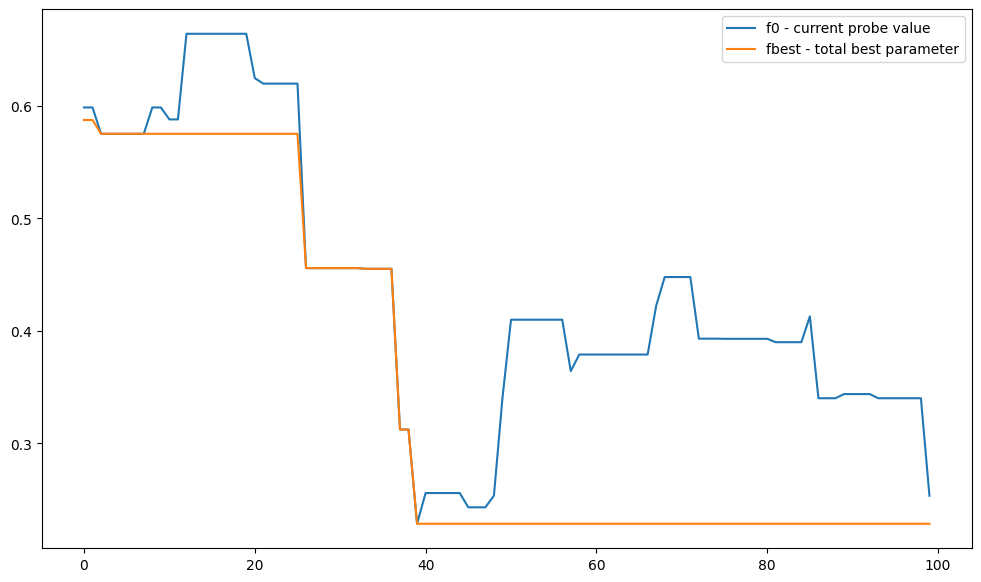

In [50]:
plt.figure(figsize = (12, 7))
plt.plot(optimization_progress['f0'], label = 'f0 - current probe value')
plt.plot(optimization_progress['fbest'], label = 'fbest - total best parameter')
plt.legend()
plt.show()

Select the best hyperparameters, refit to whole training set, and predict test set

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41547D+00    |proj g|=  1.84865D-01

At iterate    5    f=  1.29432D+00    |proj g|=  1.58064D-01


 This problem is unconstrained.



At iterate   10    f=  1.26798D+00    |proj g|=  5.20726D-02

At iterate   15    f=  1.26110D+00    |proj g|=  2.48765D-02

At iterate   20    f=  1.25923D+00    |proj g|=  3.48496D-03

At iterate   25    f=  1.25916D+00    |proj g|=  9.50599D-04

At iterate   30    f=  1.25906D+00    |proj g|=  9.58443D-03

At iterate   35    f=  1.25869D+00    |proj g|=  1.75993D-03

At iterate   40    f=  1.25865D+00    |proj g|=  8.93845D-04

At iterate   45    f=  1.25864D+00    |proj g|=  1.07466D-03

At iterate   50    f=  1.25864D+00    |proj g|=  5.60180D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

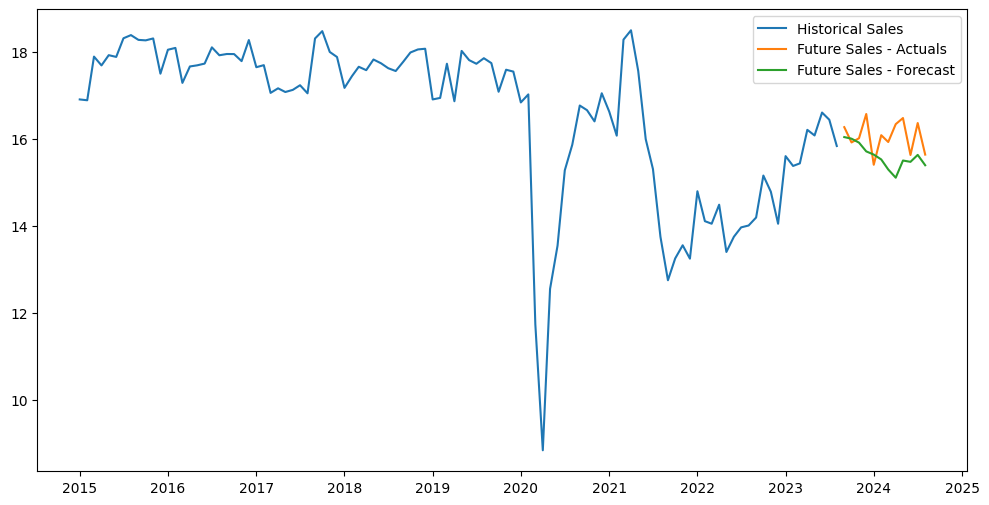

In [51]:
model = SARIMAX(
    endog = df_train['SALES'], 
    exog = df_train['GDP'], 
    order = (xbest['p'], xbest['d'], xbest['q']), # p, d, q order parameters for arima
    trend = [xbest['a0'], xbest['a1']], # A(t) = a0 + a1*t + a2*t^2 ... 
    seasonal_order = (xbest['P'], xbest['D'], xbest['Q'], 12) # P, D, Q seasonal order parameters
).fit()

forecast = model.forecast(steps=df_test.shape[0], exog=df_test['GDP'])

plt.figure(figsize = (12, 6))
plt.plot(df_train['DATE'], df_train['SALES'], label='Historical Sales')
plt.plot(df_test['DATE'], df_test['SALES'], label='Future Sales - Actuals')
plt.plot(df_test['DATE'], forecast, label='Future Sales - Forecast')
plt.legend()
plt.show()